# 1104簇文件生成

In [78]:
import pandas as pd
import os


df = pd.read_csv("updated_encoded_data.csv")

# 创建一个字典，键是簇编号，值是相关的数据行
clusters = {}
for index, row in df.iterrows():
    cluster_ids = eval(row["簇编号"])
    purposes = eval(row["出行目的"])
    for i, cluster_id in enumerate(cluster_ids):
        if cluster_id != -1:  # 跳过-1的簇编号
            if cluster_id not in clusters:
                clusters[cluster_id] = []
            # 由于第一个轨迹点没有出行目的，所以需要将索引 i 调整为 i-1
            clusters[cluster_id].append((row, purposes[i-1]))

# 创建输出文件夹
output_folder = "D:\\house_mix_EM\\出行目的_簇"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# 为每个簇创建一个文件
for cluster_id, data in clusters.items():
    rows, purposes = zip(*data)  # 分离数据行和出行目的
    
    # 创建数据框并删除重复的行
    df_cluster = pd.DataFrame(rows)
    df_cluster.drop_duplicates(inplace=True)
    
    # 如果数据只有一条，跳过不创建文件
    if df_cluster.shape[0] <= 4:
        continue
    
    # 根据数据的条数修改文件名
    filename = f"{purposes[0]}_簇{cluster_id}_数据{df_cluster.shape[0]}条.csv"
    filepath = os.path.join(output_folder, filename)
    
    df_cluster.to_csv(filepath, index=False)

In [139]:
import pandas as pd
import os
import re

# Function to clean file names
def clean_filename(filename):
    return re.sub(r'[<>:"/\\|?*]', '_', filename)

# Function to safely evaluate lists in the dataframe cells
def safe_eval(cell):
    try:
        return eval(cell) if not pd.isnull(cell) else []
    except NameError:
        return []

df = pd.read_csv("updated_encoded_data.csv", encoding='gbk')

clusters = {}
for index, row in df.iterrows():
    cluster_ids = safe_eval(row["簇编号"])
    purposes = safe_eval(row["出行目的"])
    poi_names = safe_eval(row["新附近POI"])
    poi_distances = safe_eval(row["新POI距离"])
    for i, cluster_id in enumerate(cluster_ids):
        if cluster_id != -1:
            if cluster_id not in clusters:
                clusters[cluster_id] = []
            # Check if the index i-1 is within the range of lists before using it
            purpose = purposes[i-1] if i-1 < len(purposes) else '未知'
            poi_name = poi_names[i] if i < len(poi_names) else '未知'
            poi_distance = poi_distances[i] if i < len(poi_distances) else '未知'
            clusters[cluster_id].append((row, purpose, poi_name, poi_distance))

output_folder = "D:\\house_mix_EM\\出行目的_簇_POI"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

for cluster_id, data in clusters.items():
    rows, purposes, poi_names, poi_distances = zip(*data)
    df_cluster = pd.DataFrame(rows)
    df_cluster.drop_duplicates(inplace=True)

    if df_cluster.shape[0] <= 4:
        continue
    
    # Select the first unique POI and distance
    unique_pois = list(dict.fromkeys(poi_names))
    unique_distances = list(dict.fromkeys(poi_distances))

    poi_name = unique_pois[0] if unique_pois else "无POI"
    poi_distance = unique_distances[0] if unique_distances else "无距离"

    # Clean POI name to ensure a valid filename
    clean_poi_name = clean_filename(poi_name)

    filename = f"{purposes[0]}_簇{cluster_id}_POI{clean_poi_name}_距离{poi_distance}_数据{df_cluster.shape[0]}条.csv"
    filepath = os.path.join(output_folder, filename)

    df_cluster.to_csv(filepath, index=False)


<Figure size 1500x1000 with 0 Axes>

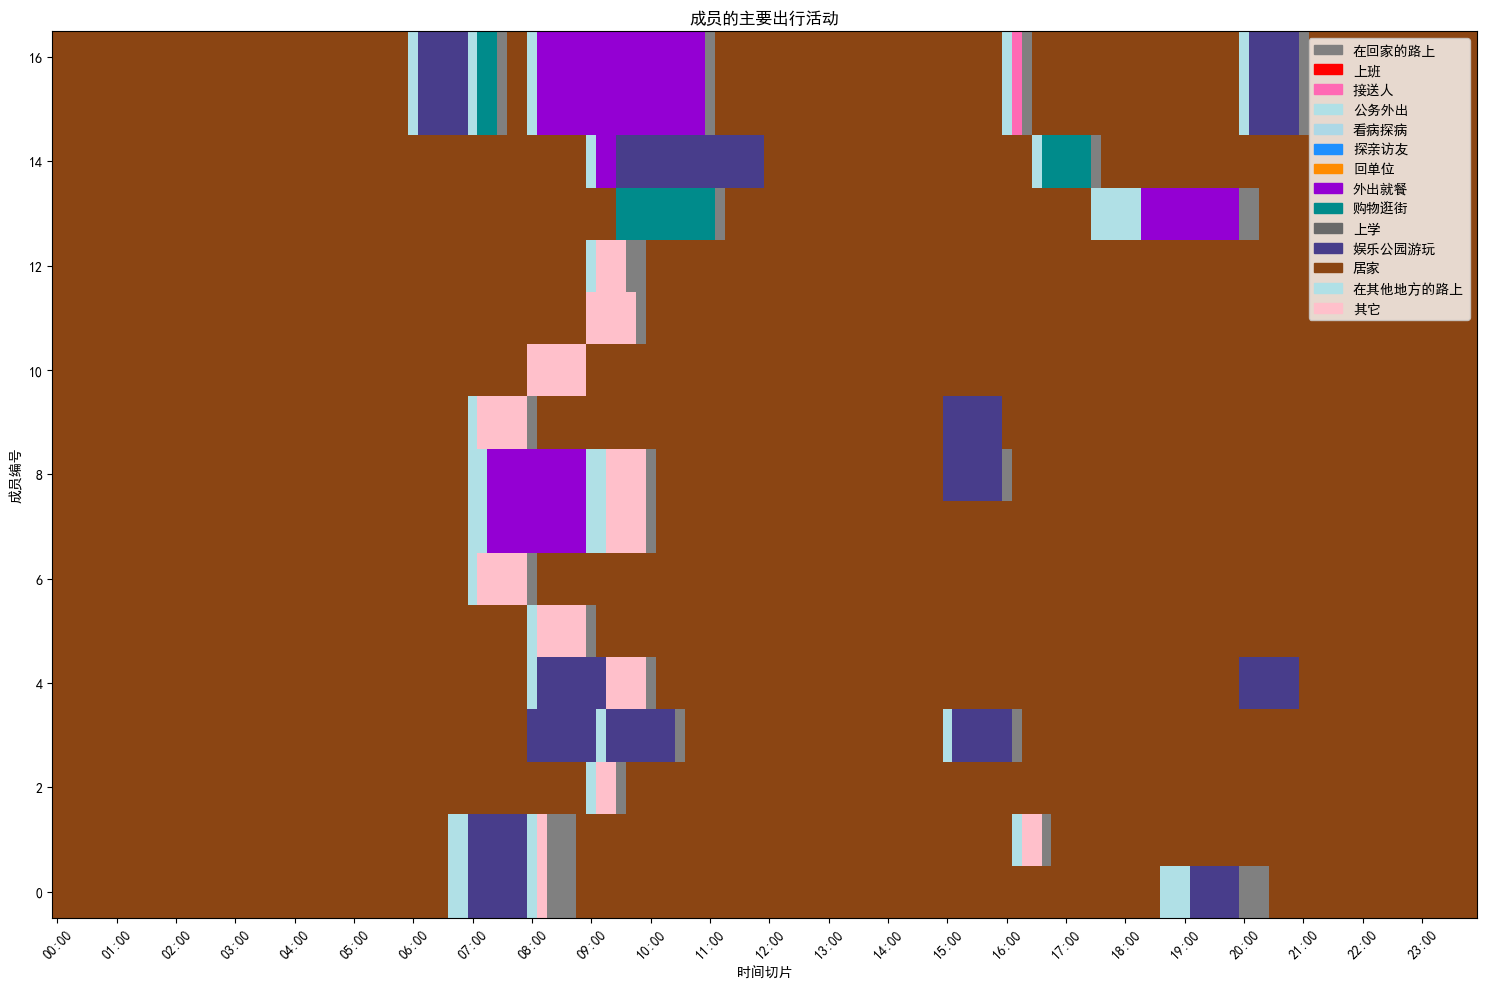

<Figure size 1500x1000 with 0 Axes>

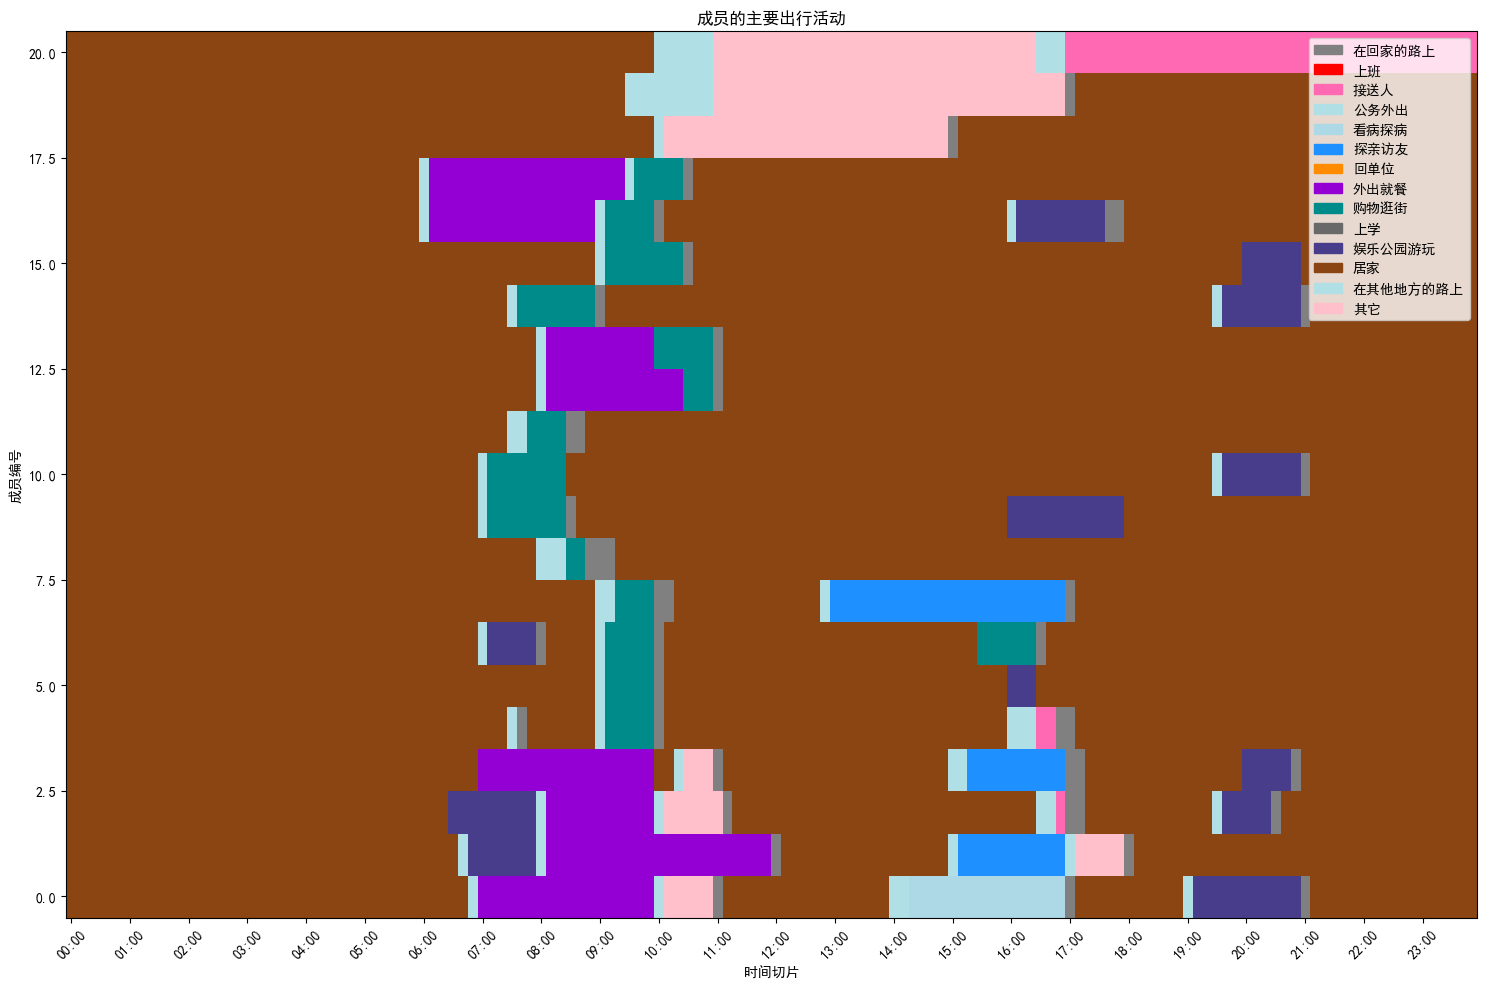

<Figure size 1500x1000 with 0 Axes>

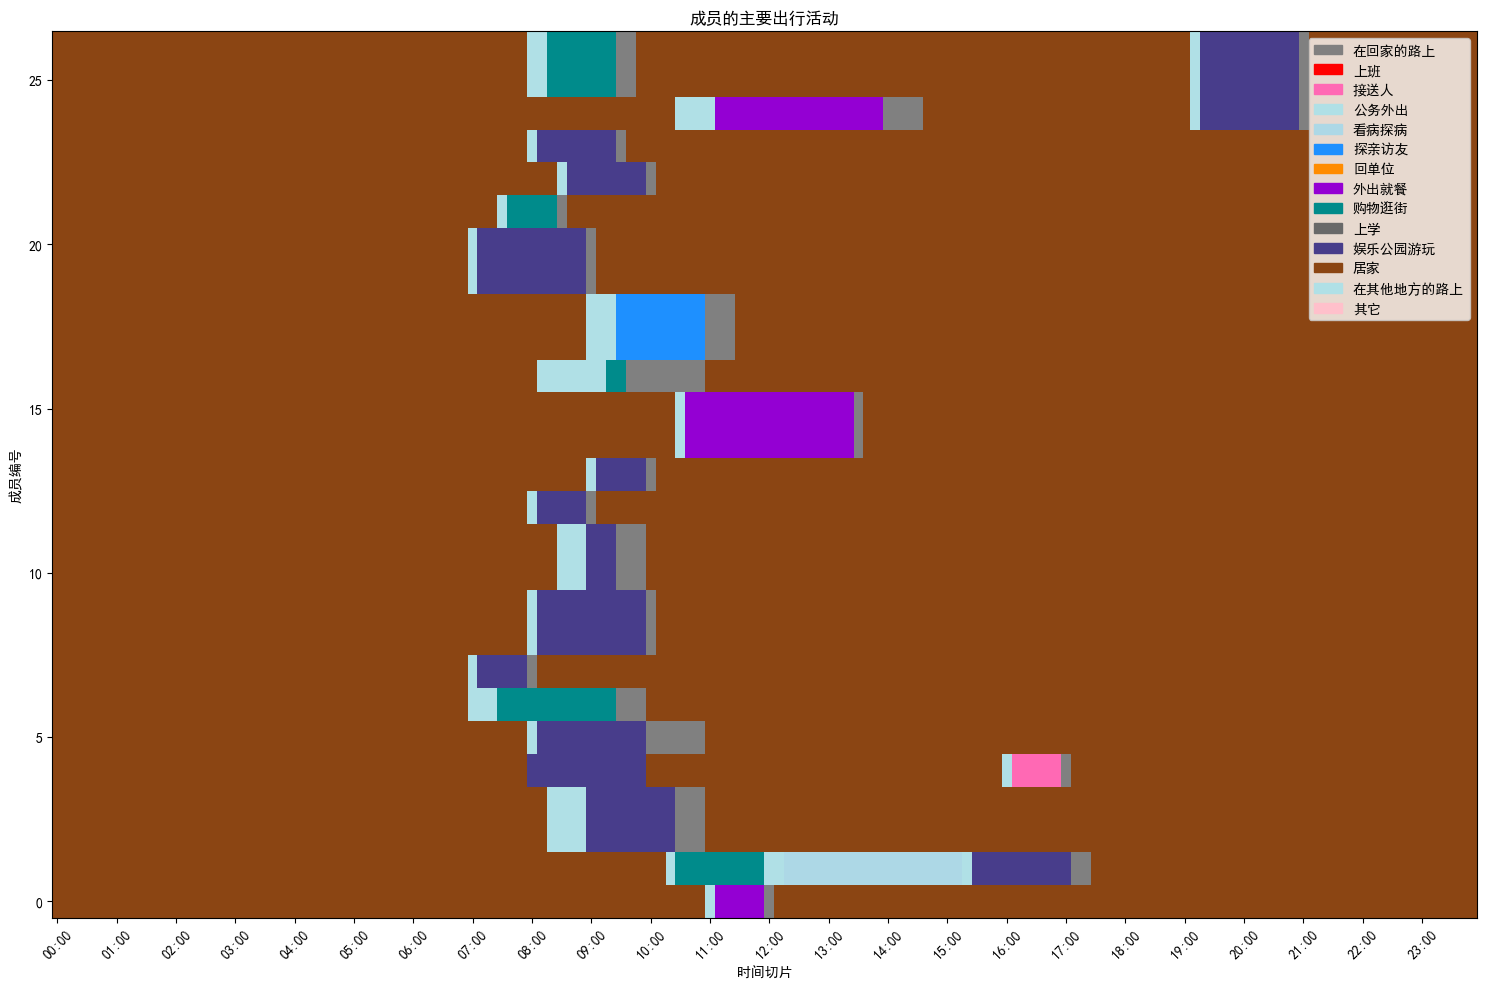

<Figure size 1500x1000 with 0 Axes>

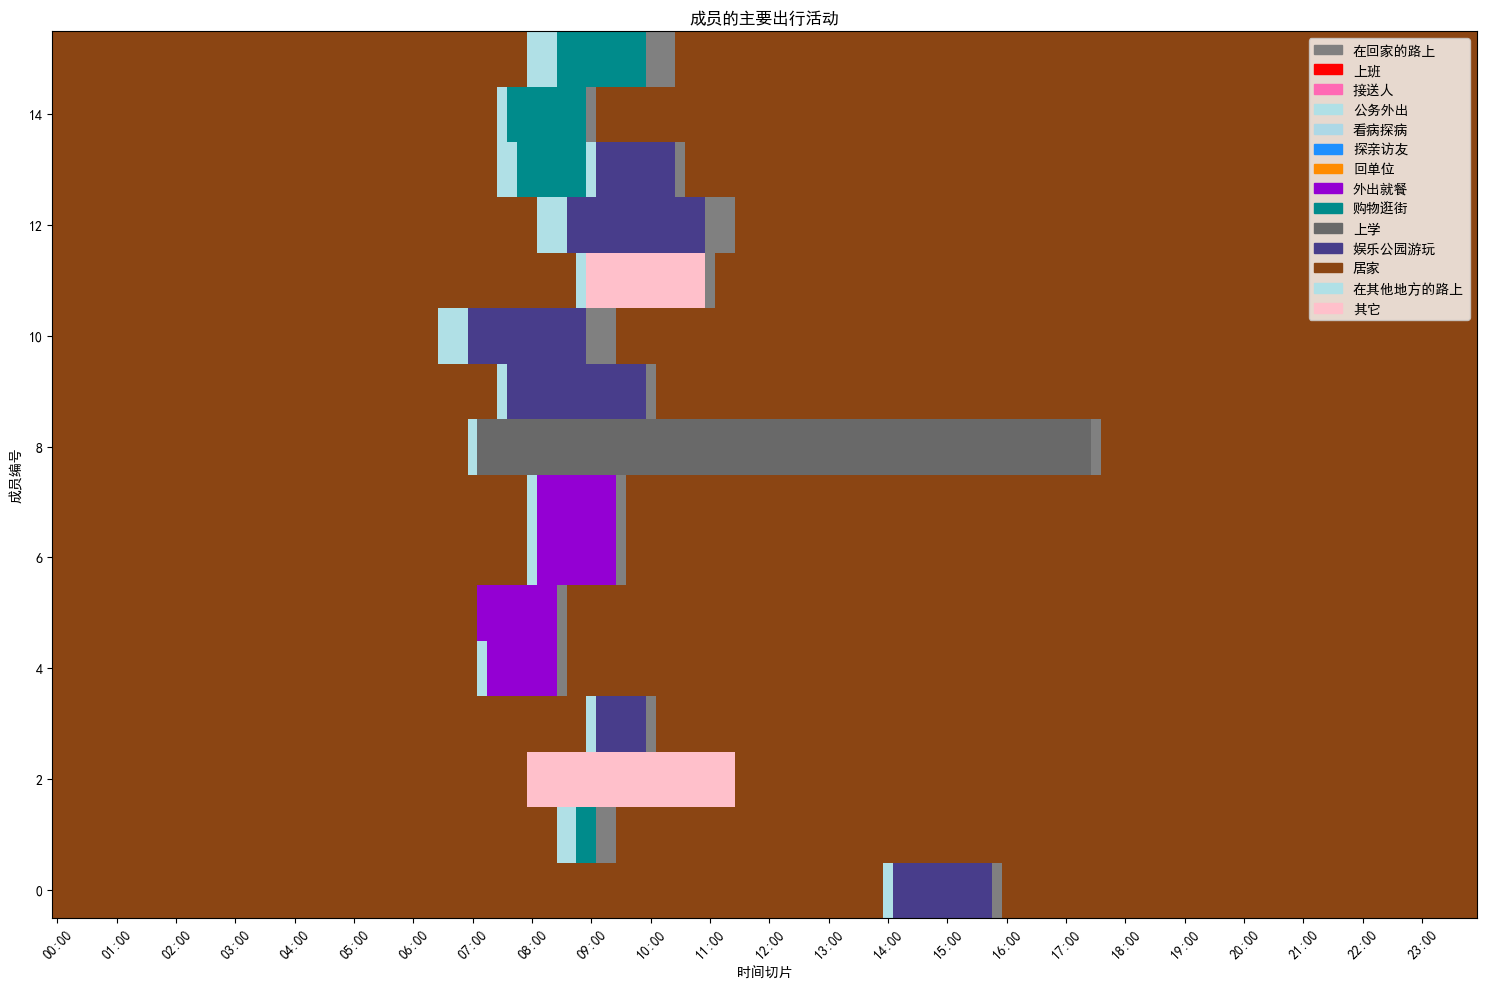

<Figure size 1500x1000 with 0 Axes>

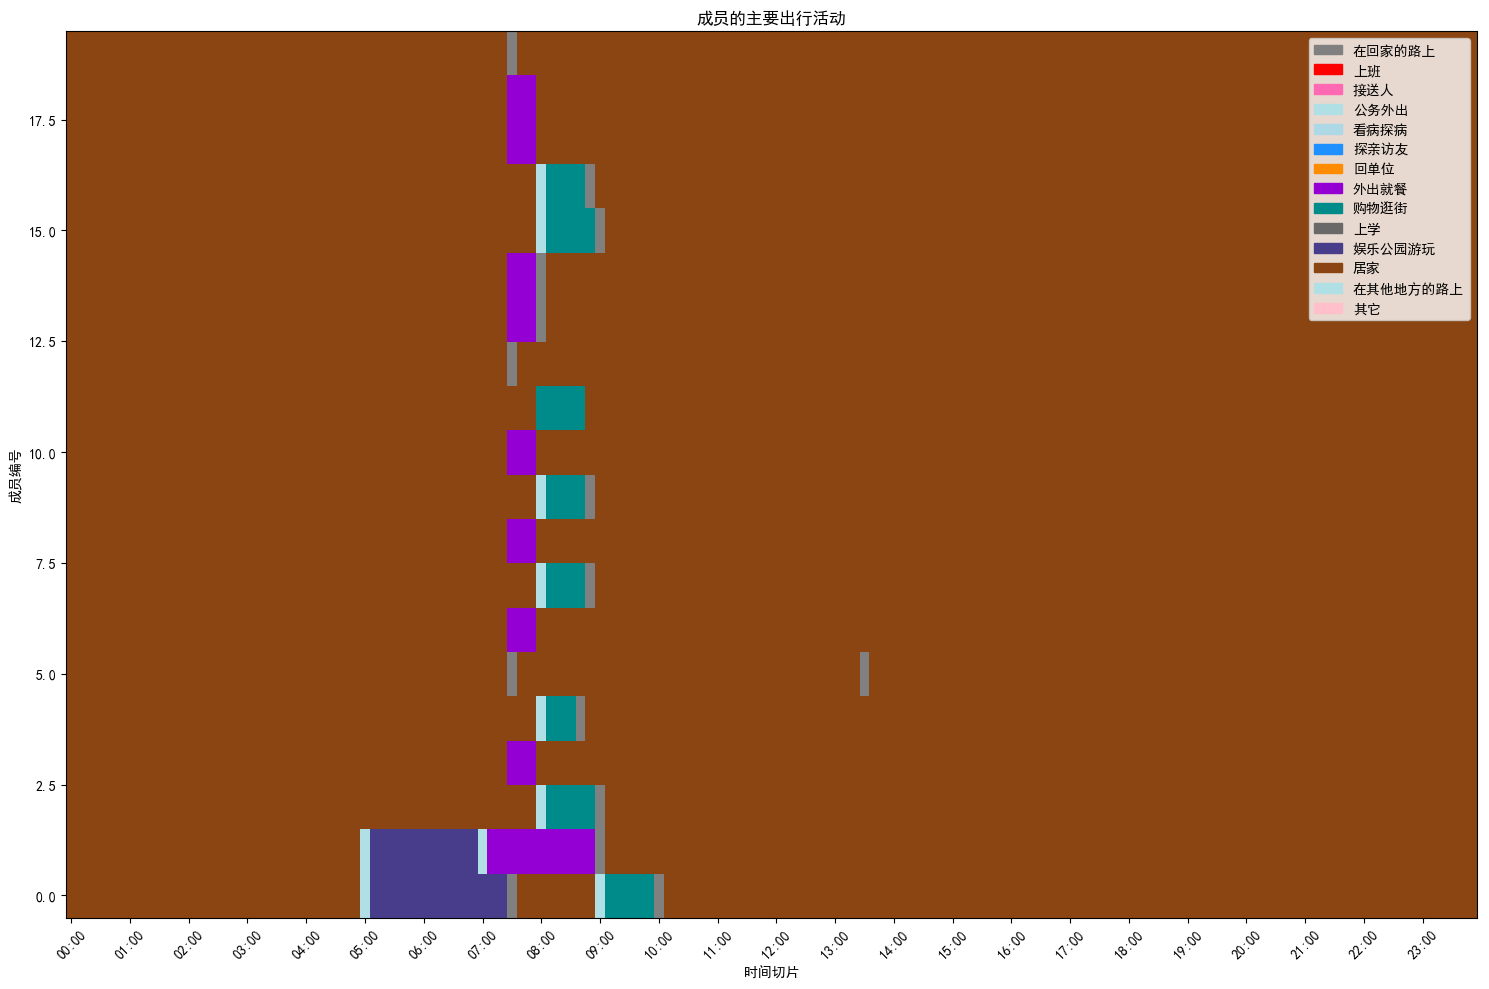

<Figure size 1500x1000 with 0 Axes>

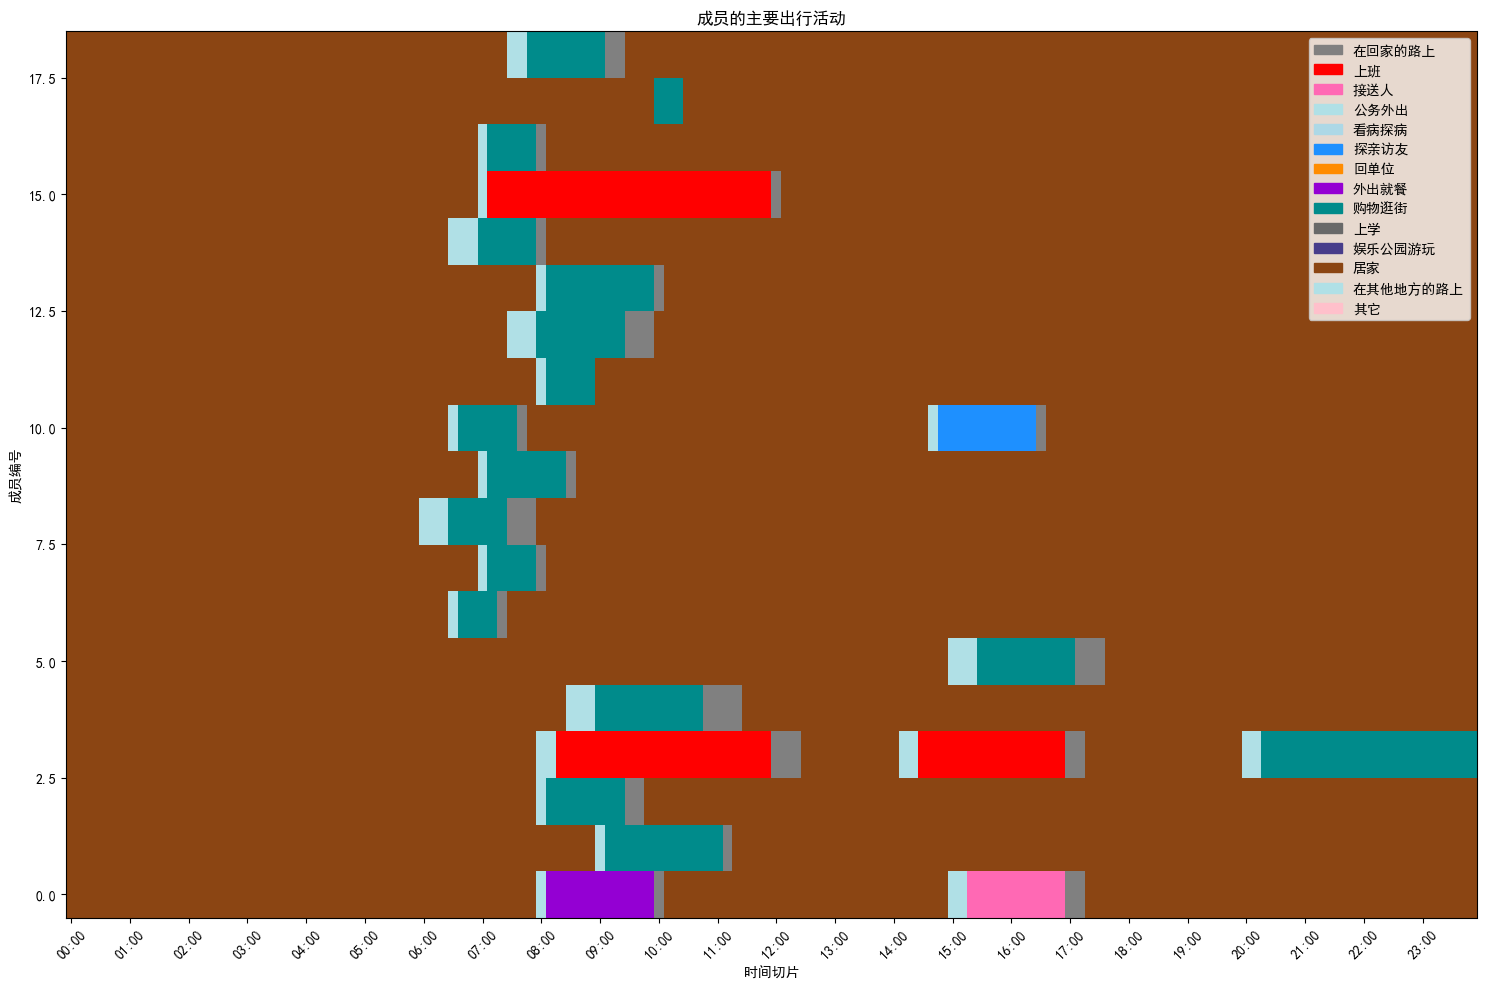

<Figure size 1500x1000 with 0 Axes>

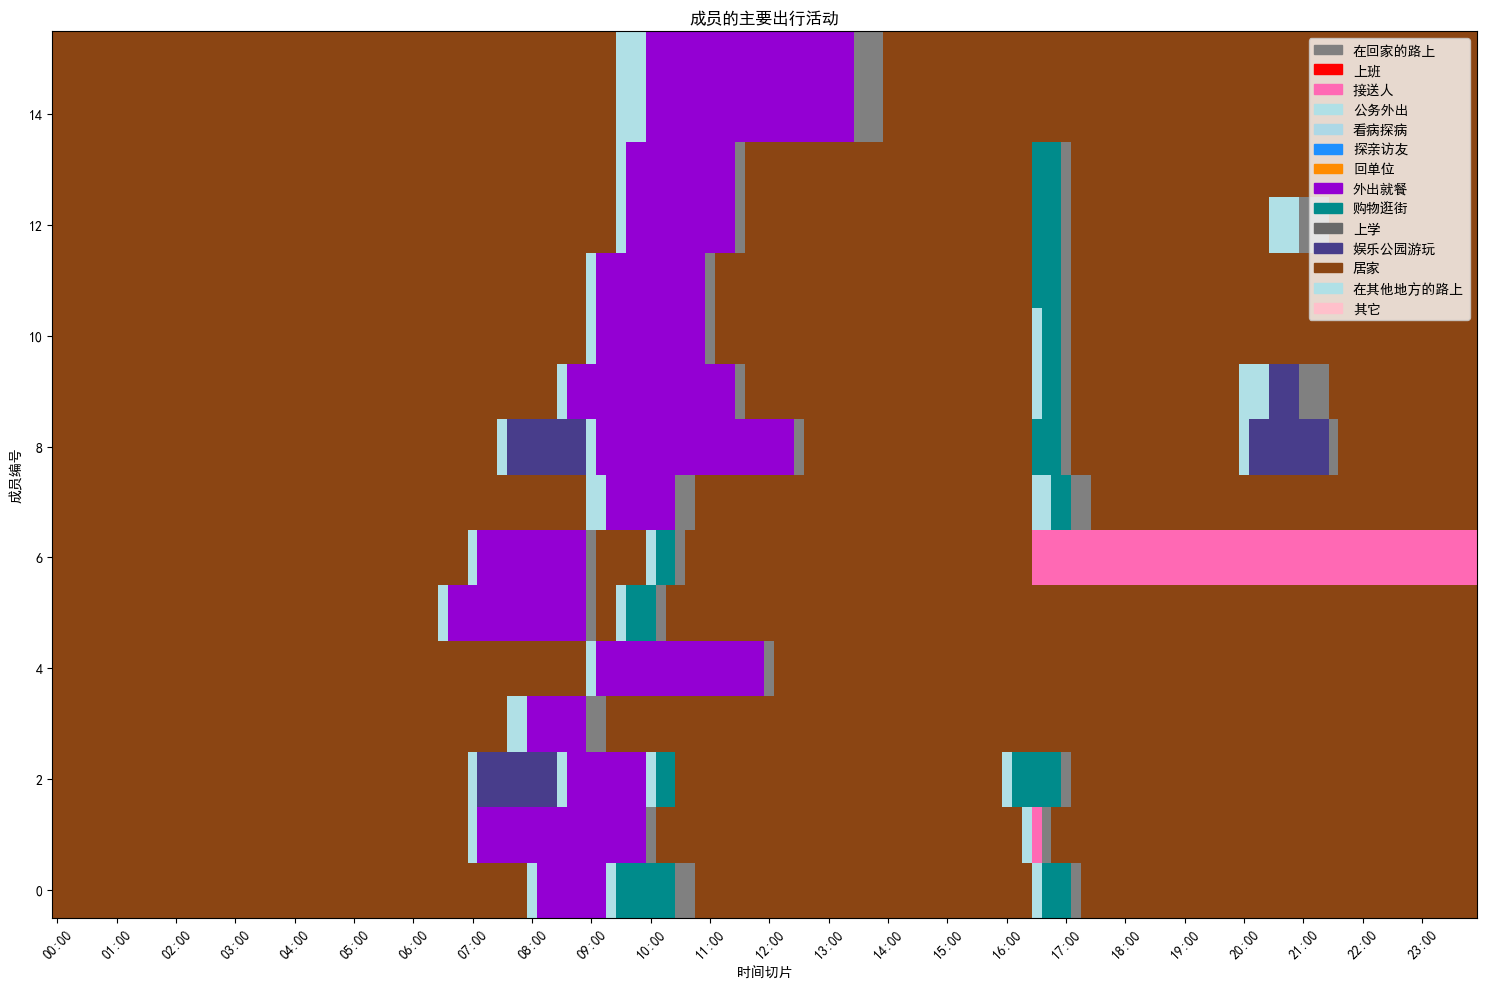

<Figure size 1500x1000 with 0 Axes>

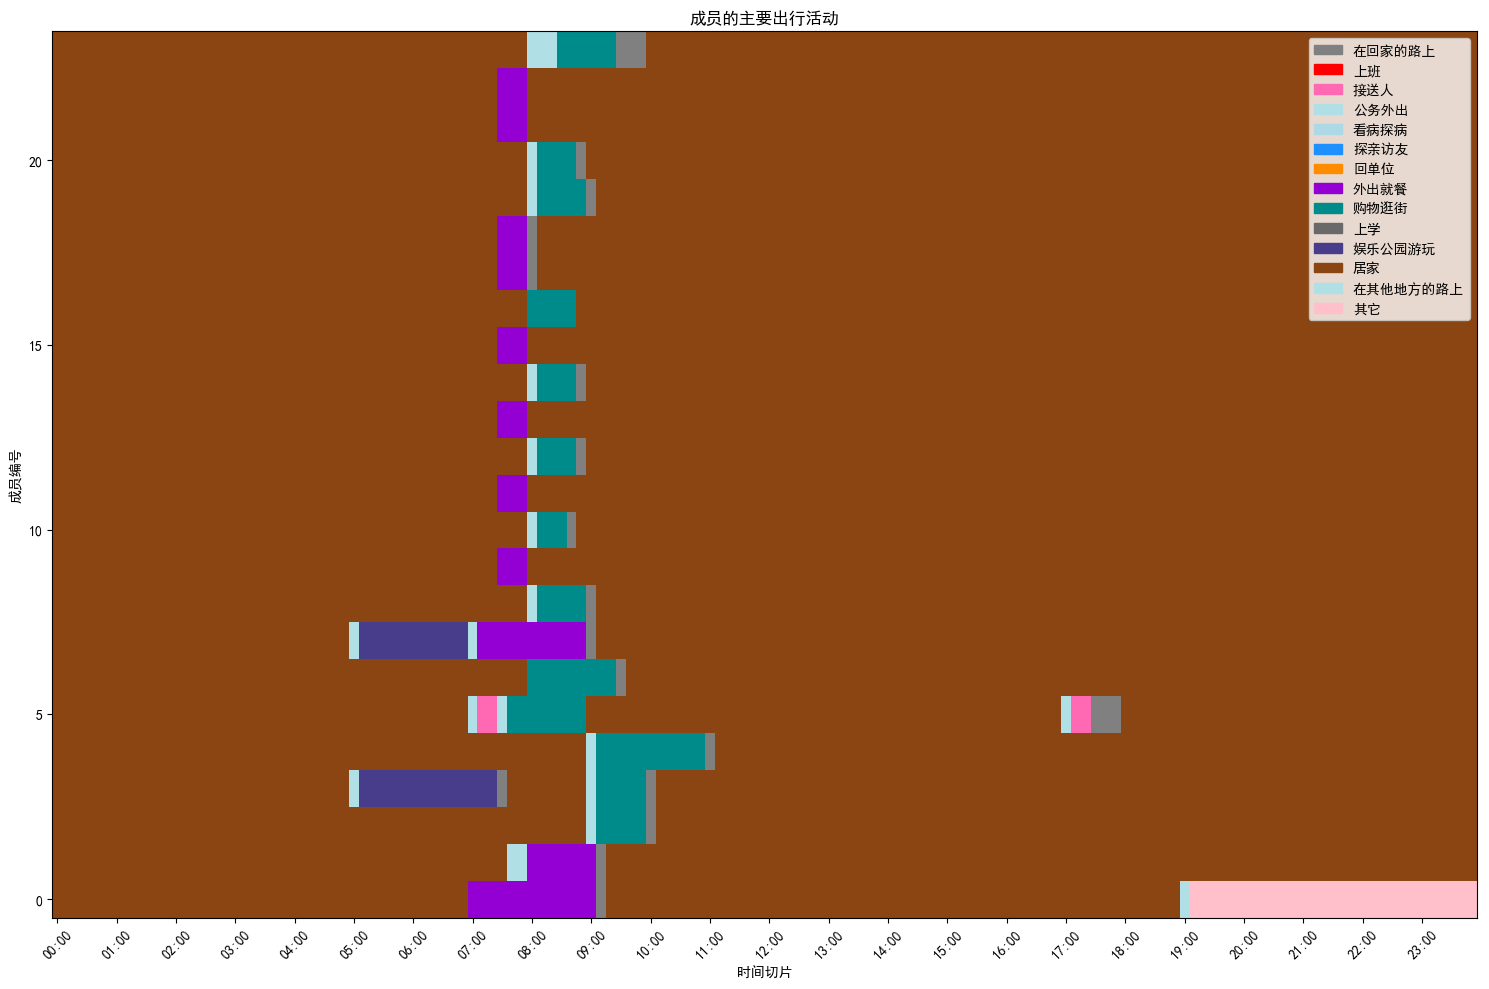

<Figure size 1500x1000 with 0 Axes>

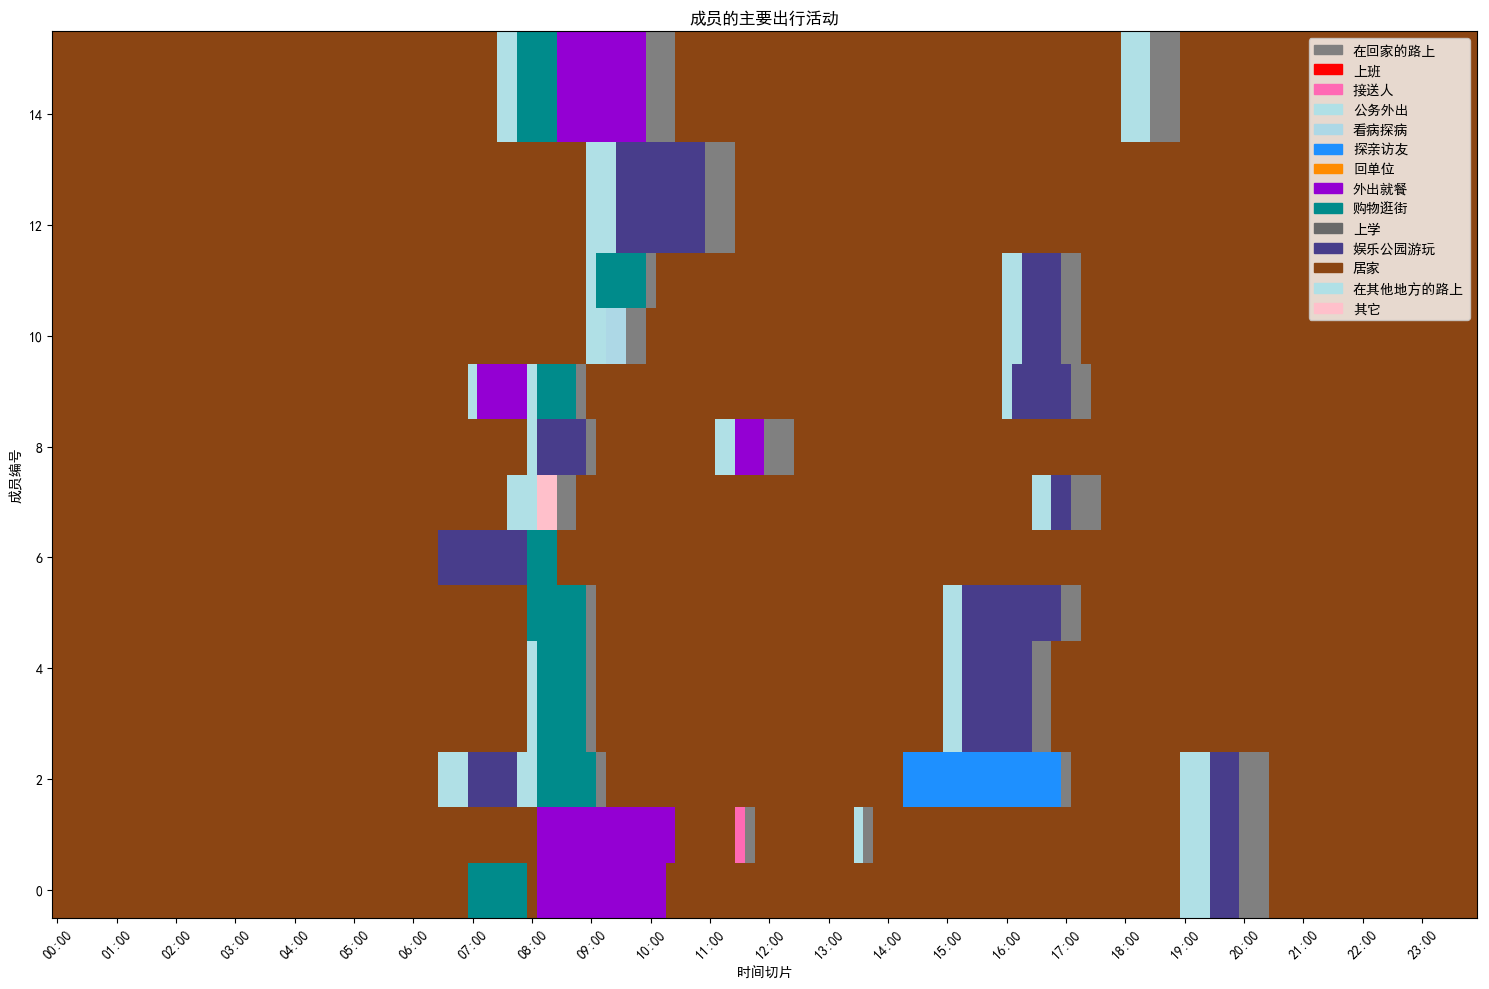

<Figure size 1500x1000 with 0 Axes>

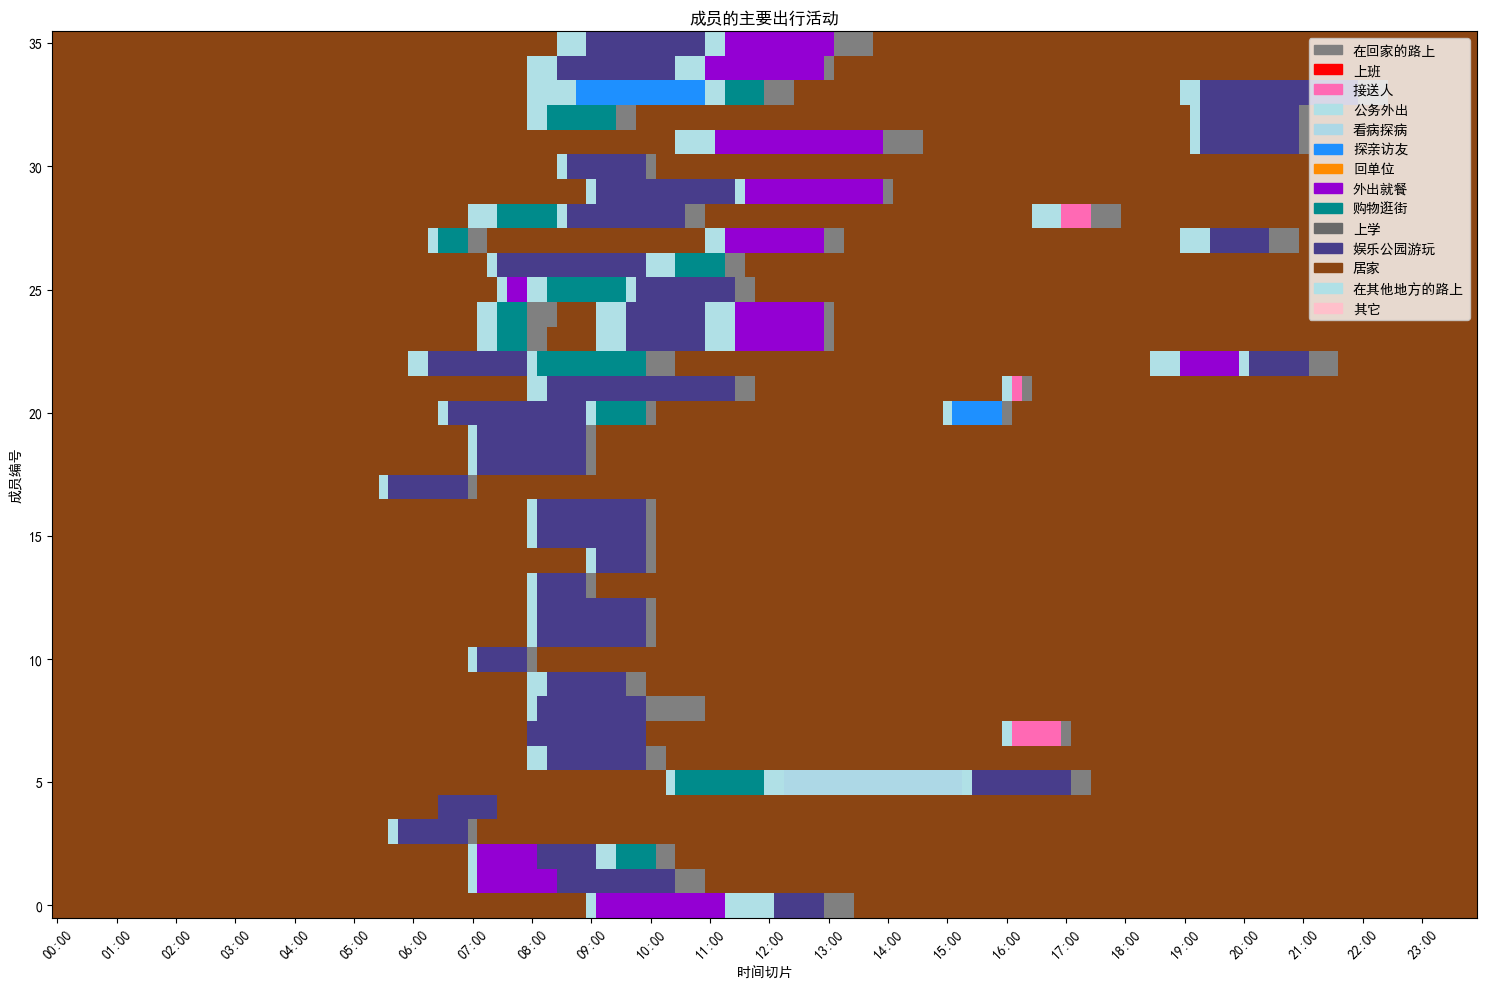

<Figure size 1500x1000 with 0 Axes>

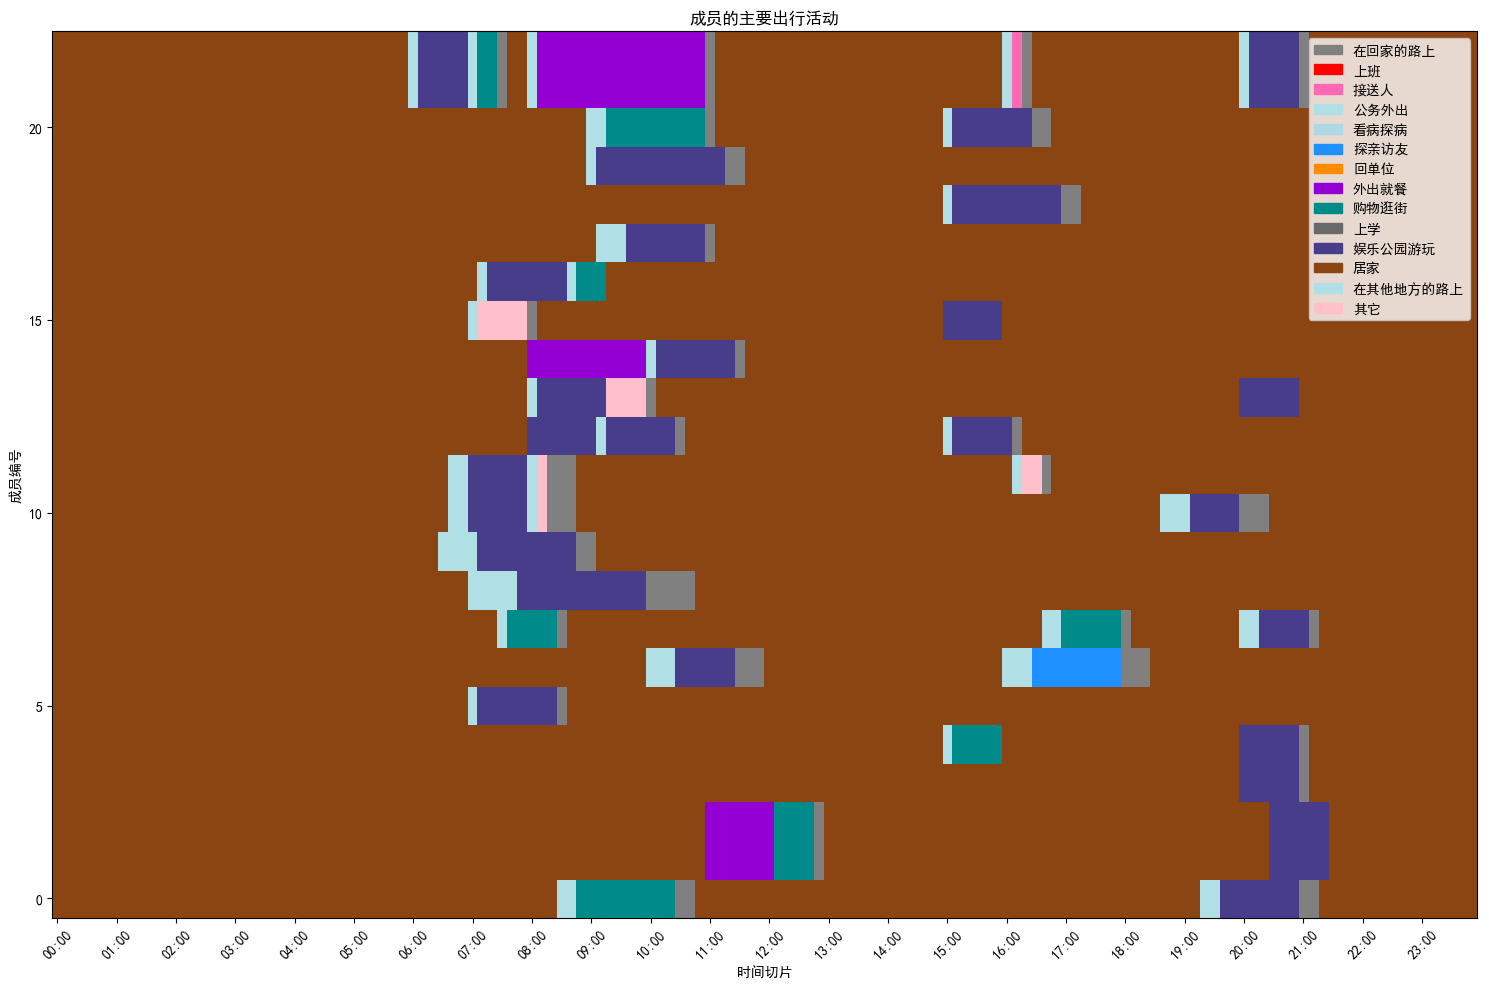

<Figure size 1500x1000 with 0 Axes>

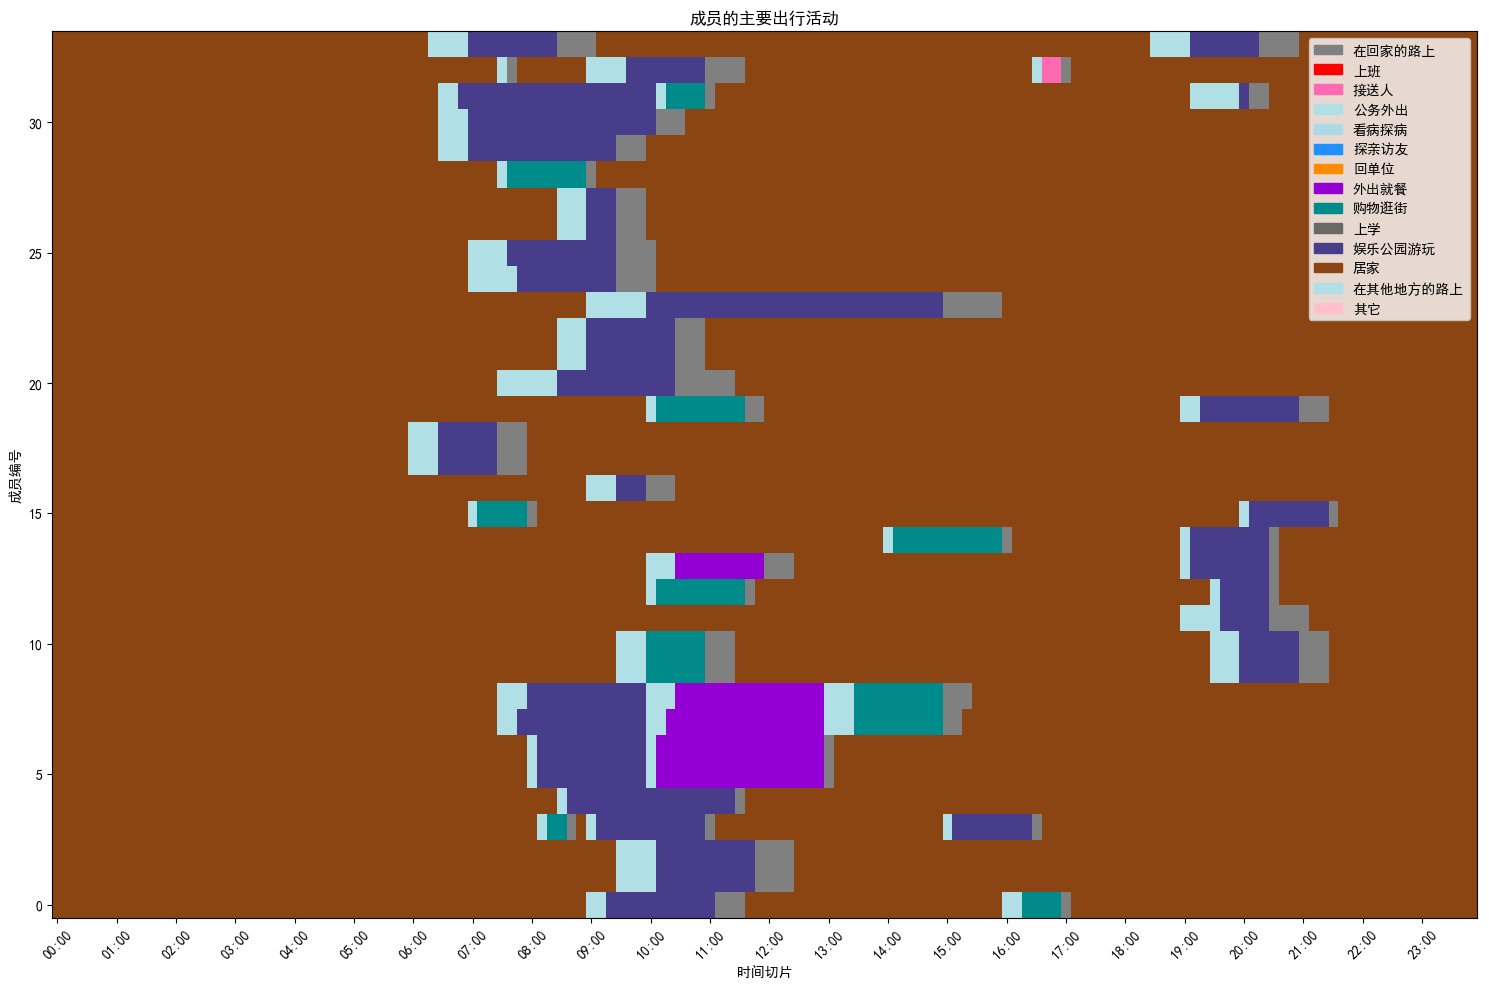

<Figure size 1500x1000 with 0 Axes>

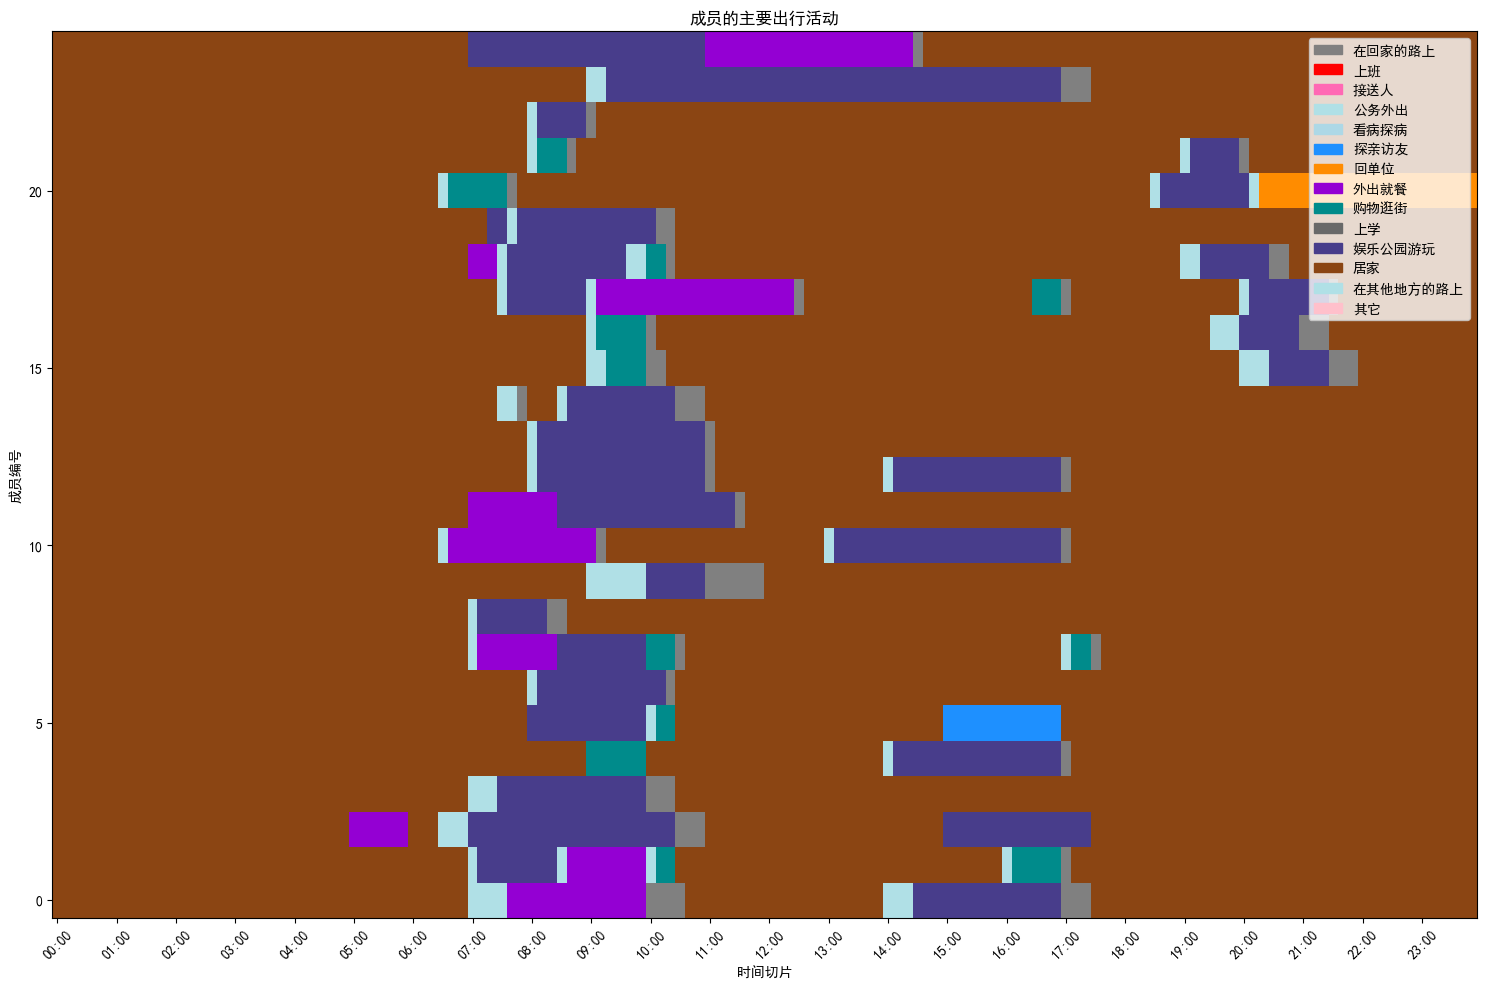

<Figure size 1500x1000 with 0 Axes>

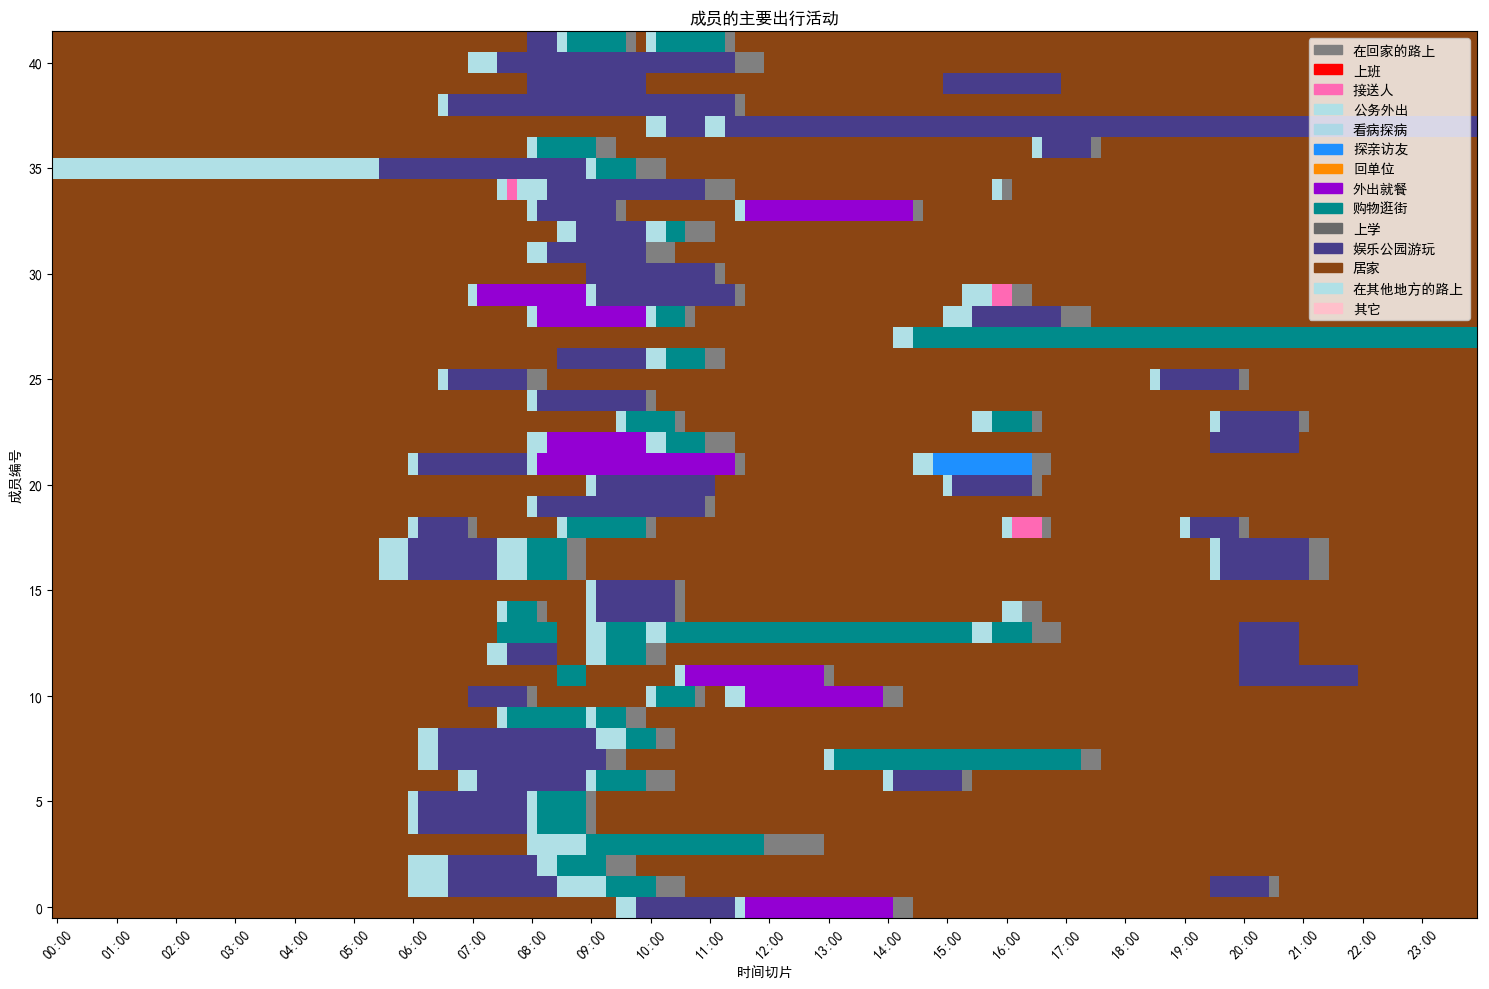

<Figure size 1500x1000 with 0 Axes>

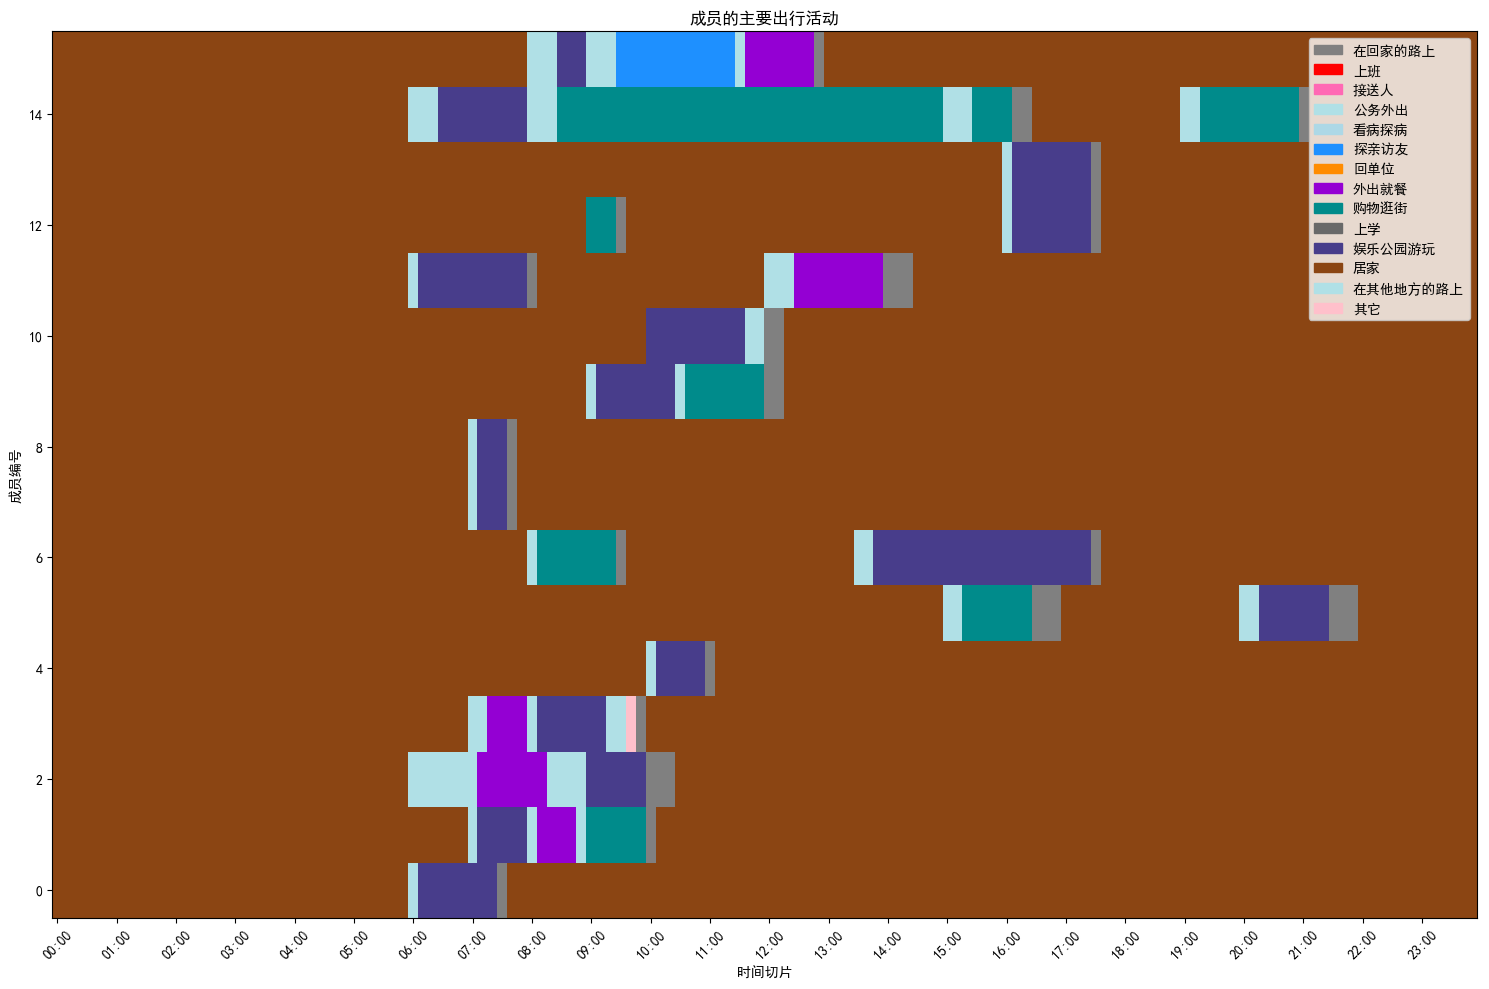

<Figure size 1500x1000 with 0 Axes>

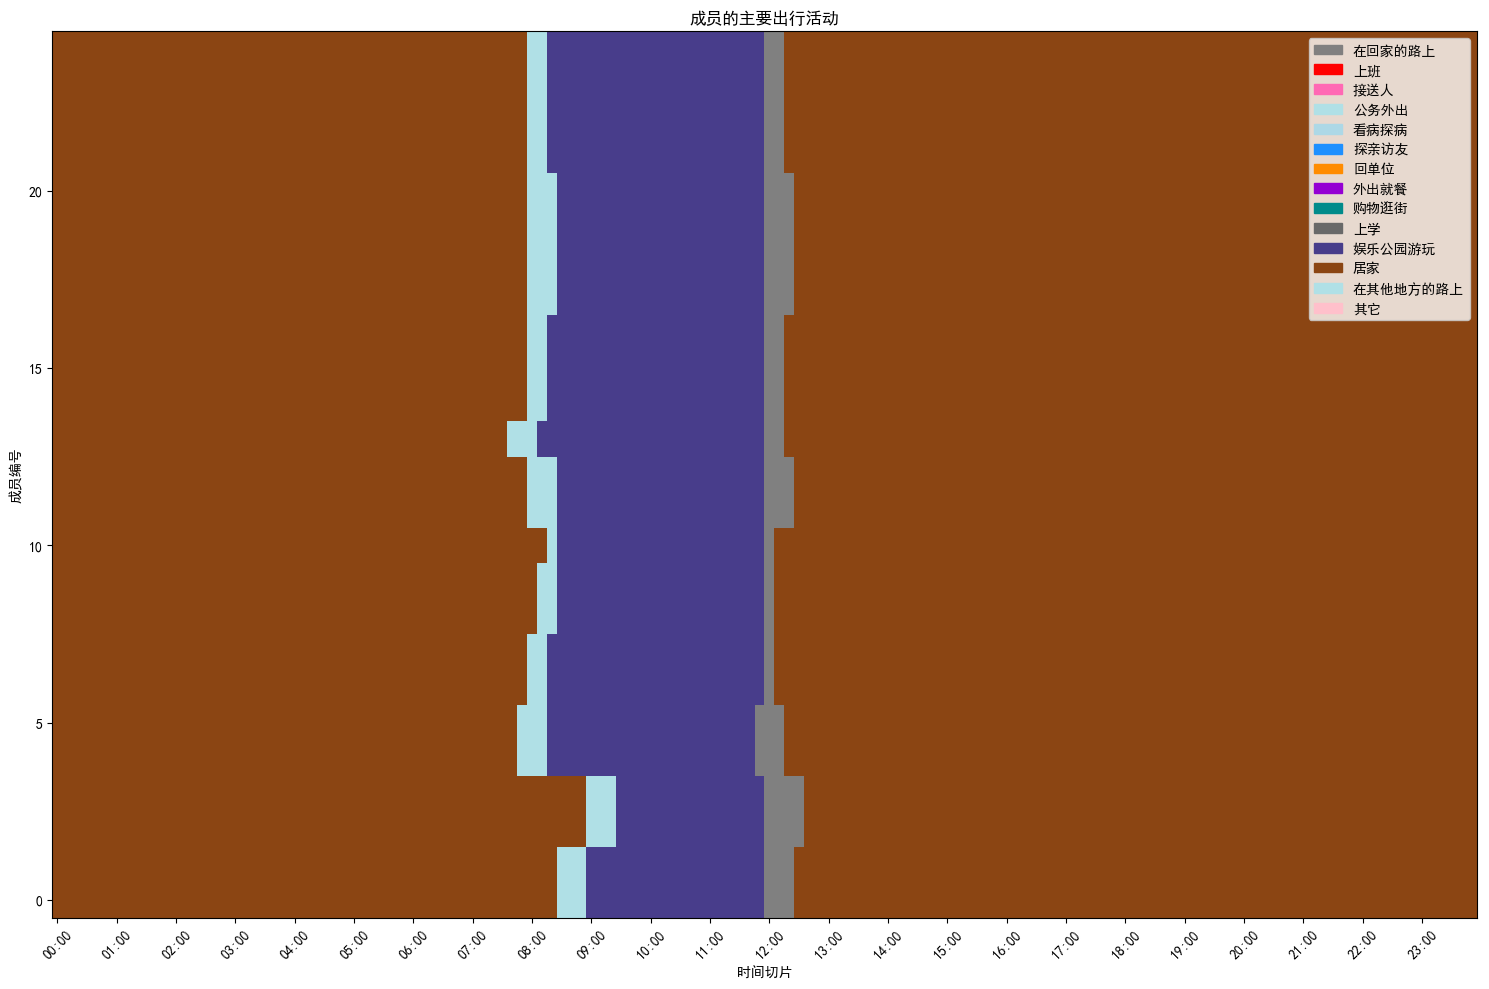

<Figure size 1500x1000 with 0 Axes>

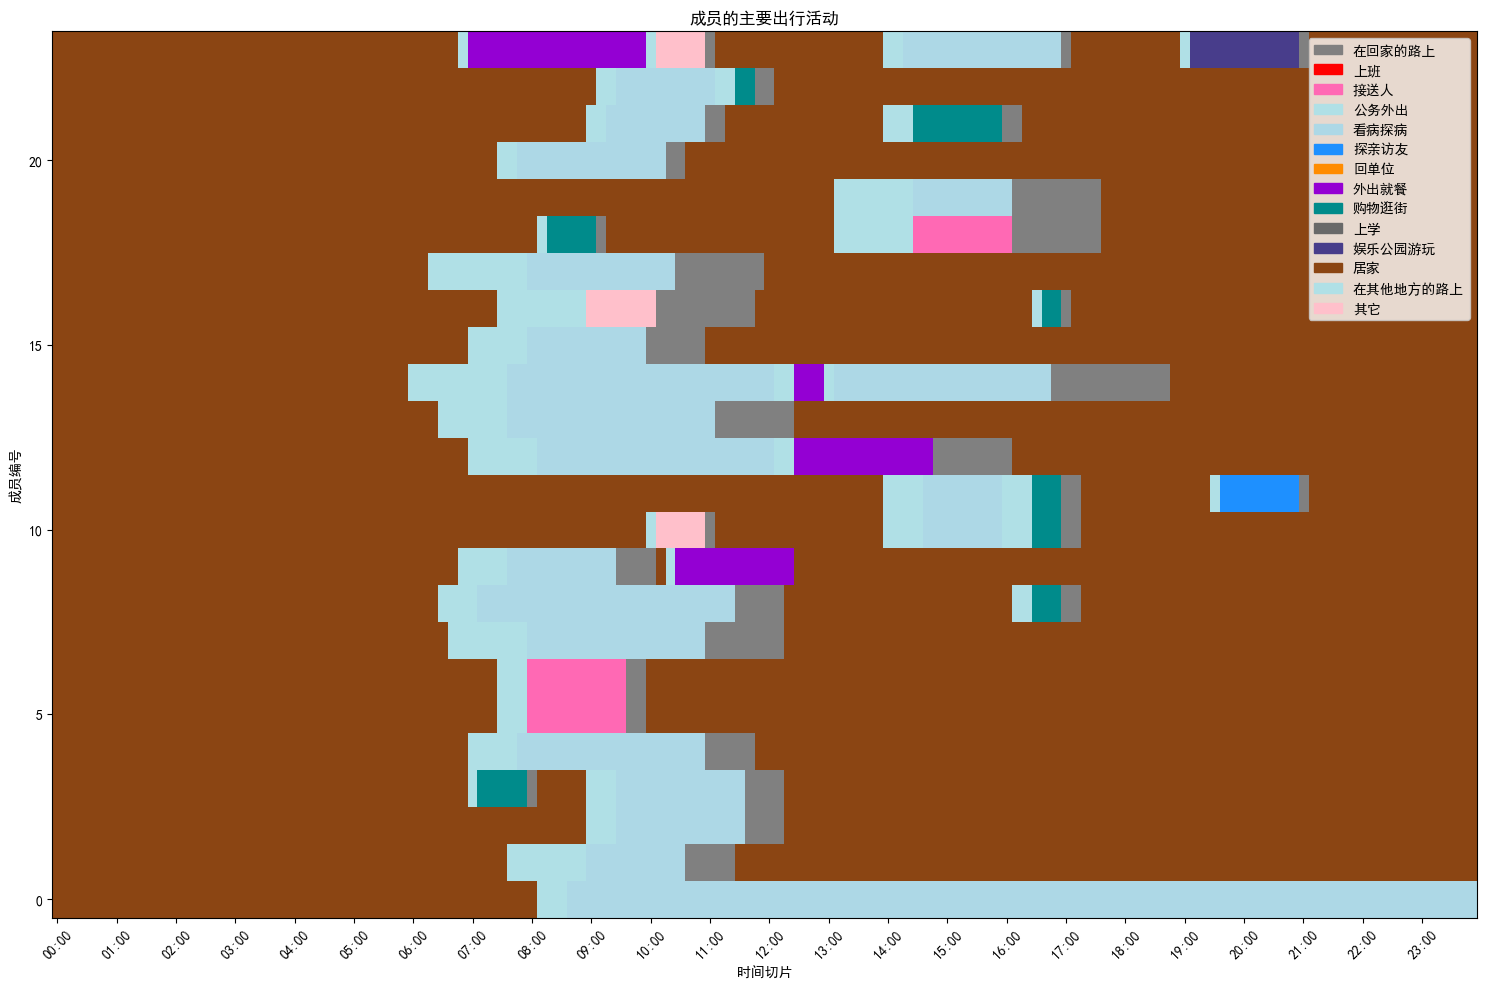

<Figure size 1500x1000 with 0 Axes>

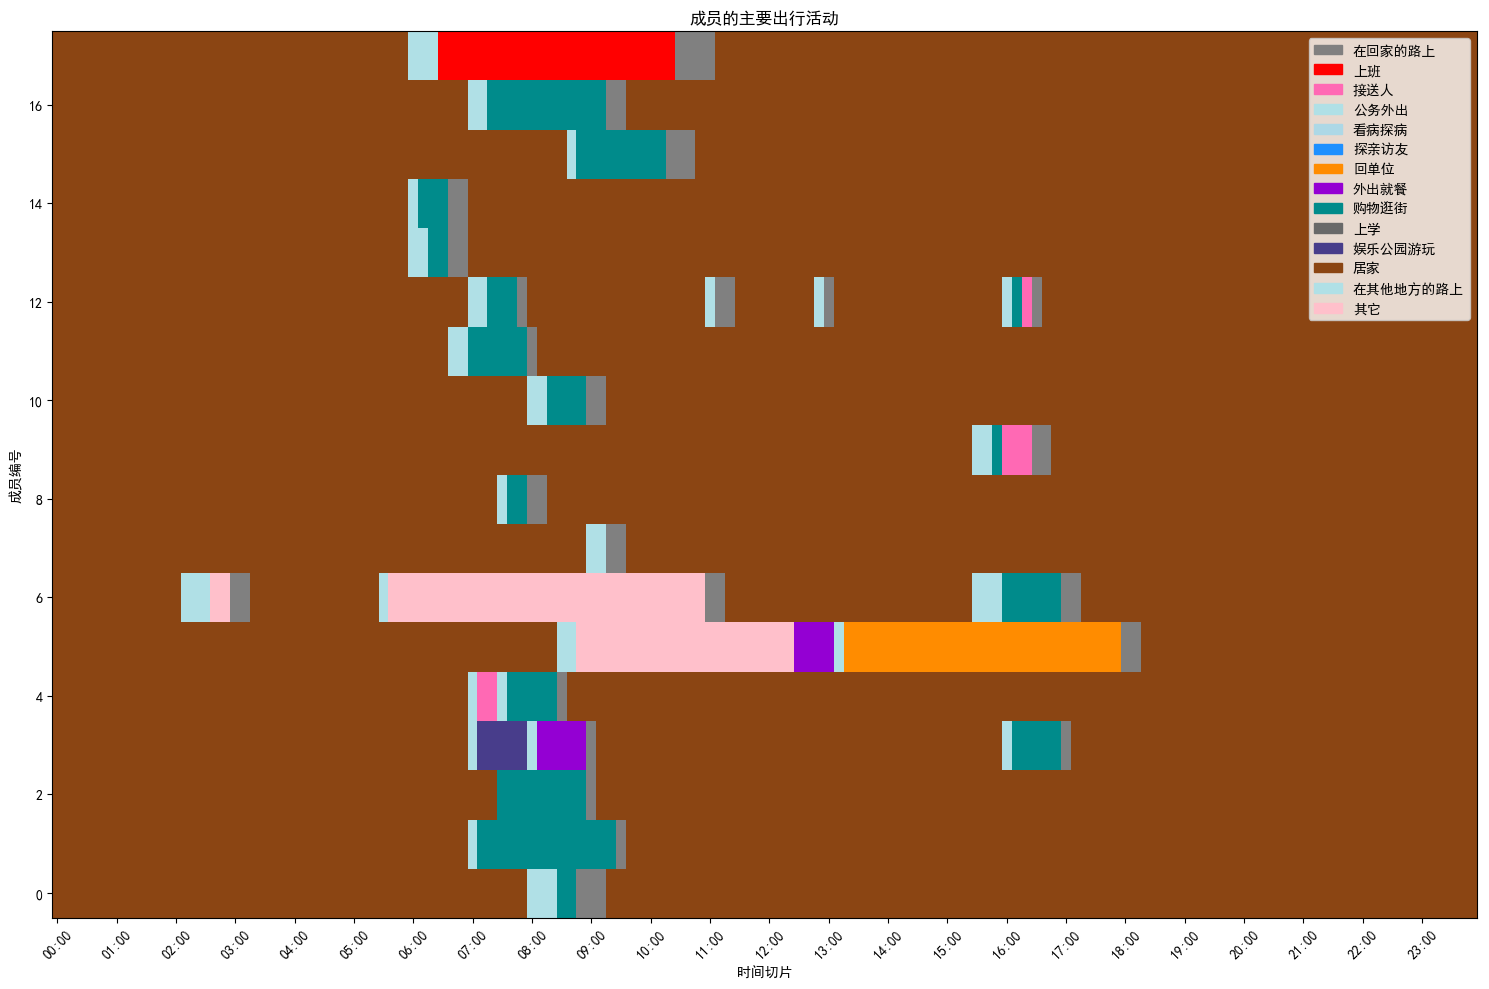

<Figure size 1500x1000 with 0 Axes>

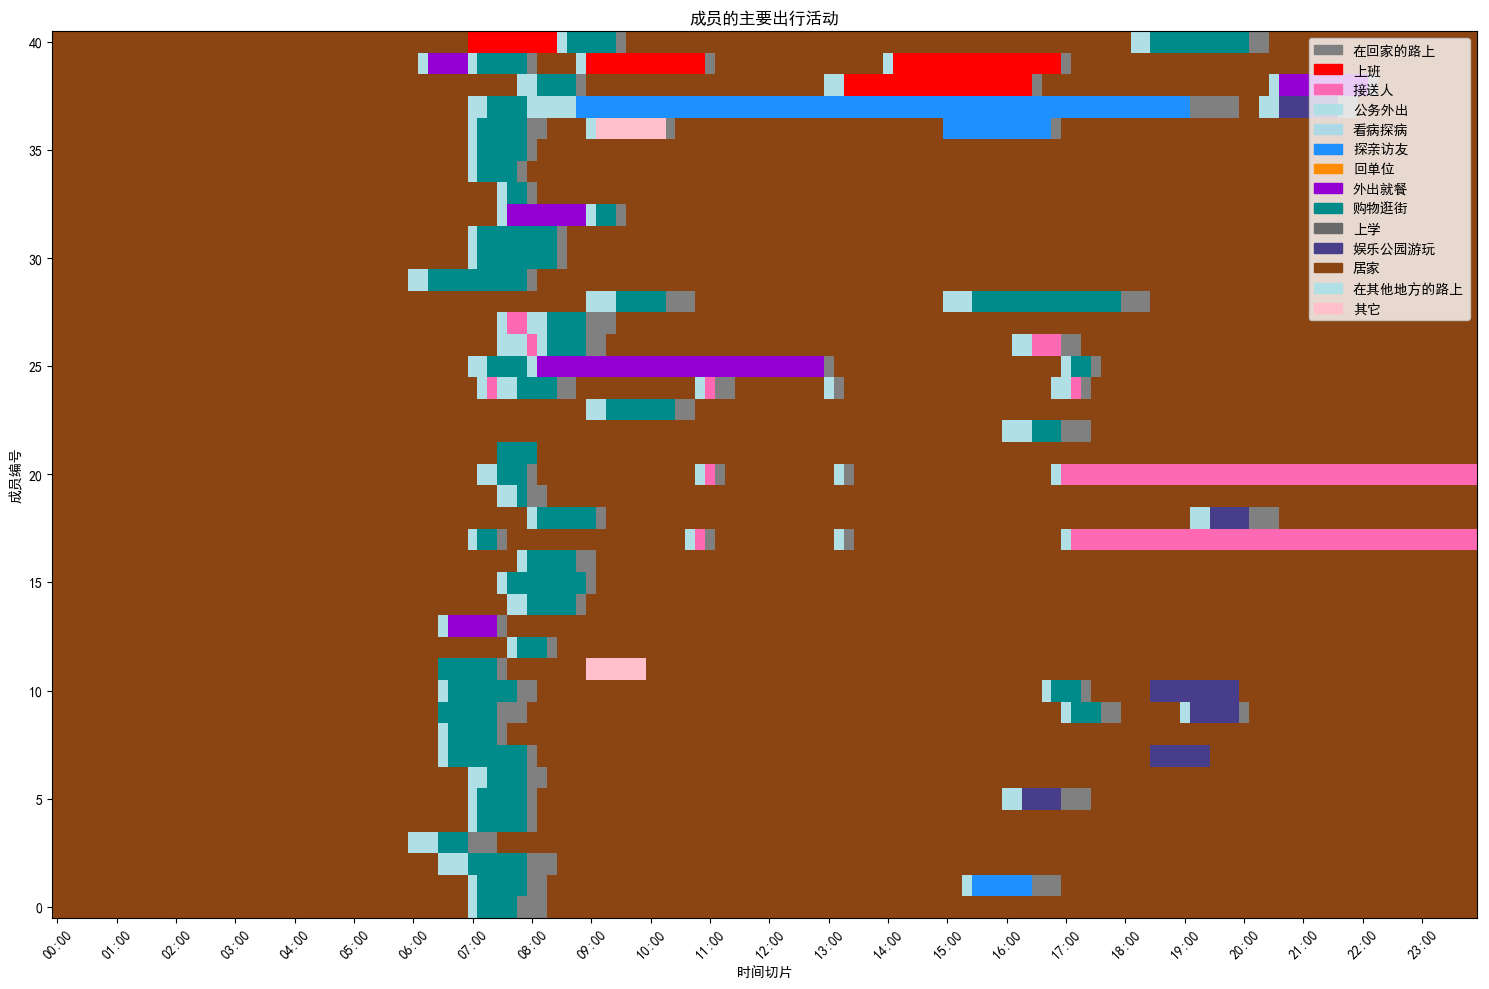

<Figure size 1500x1000 with 0 Axes>

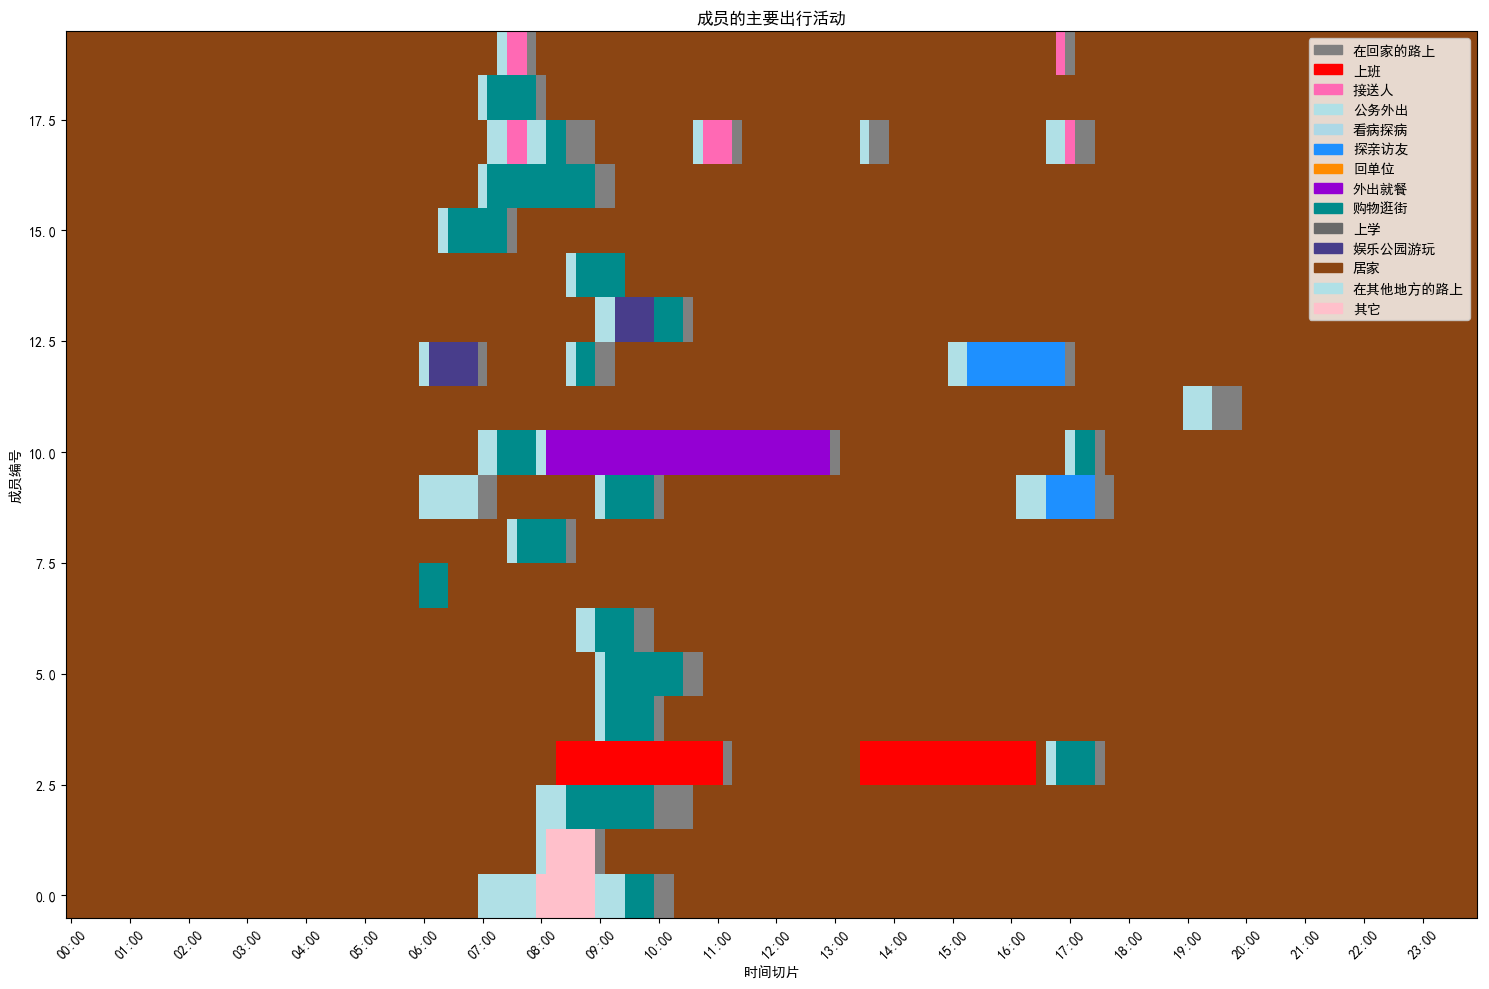

<Figure size 1500x1000 with 0 Axes>

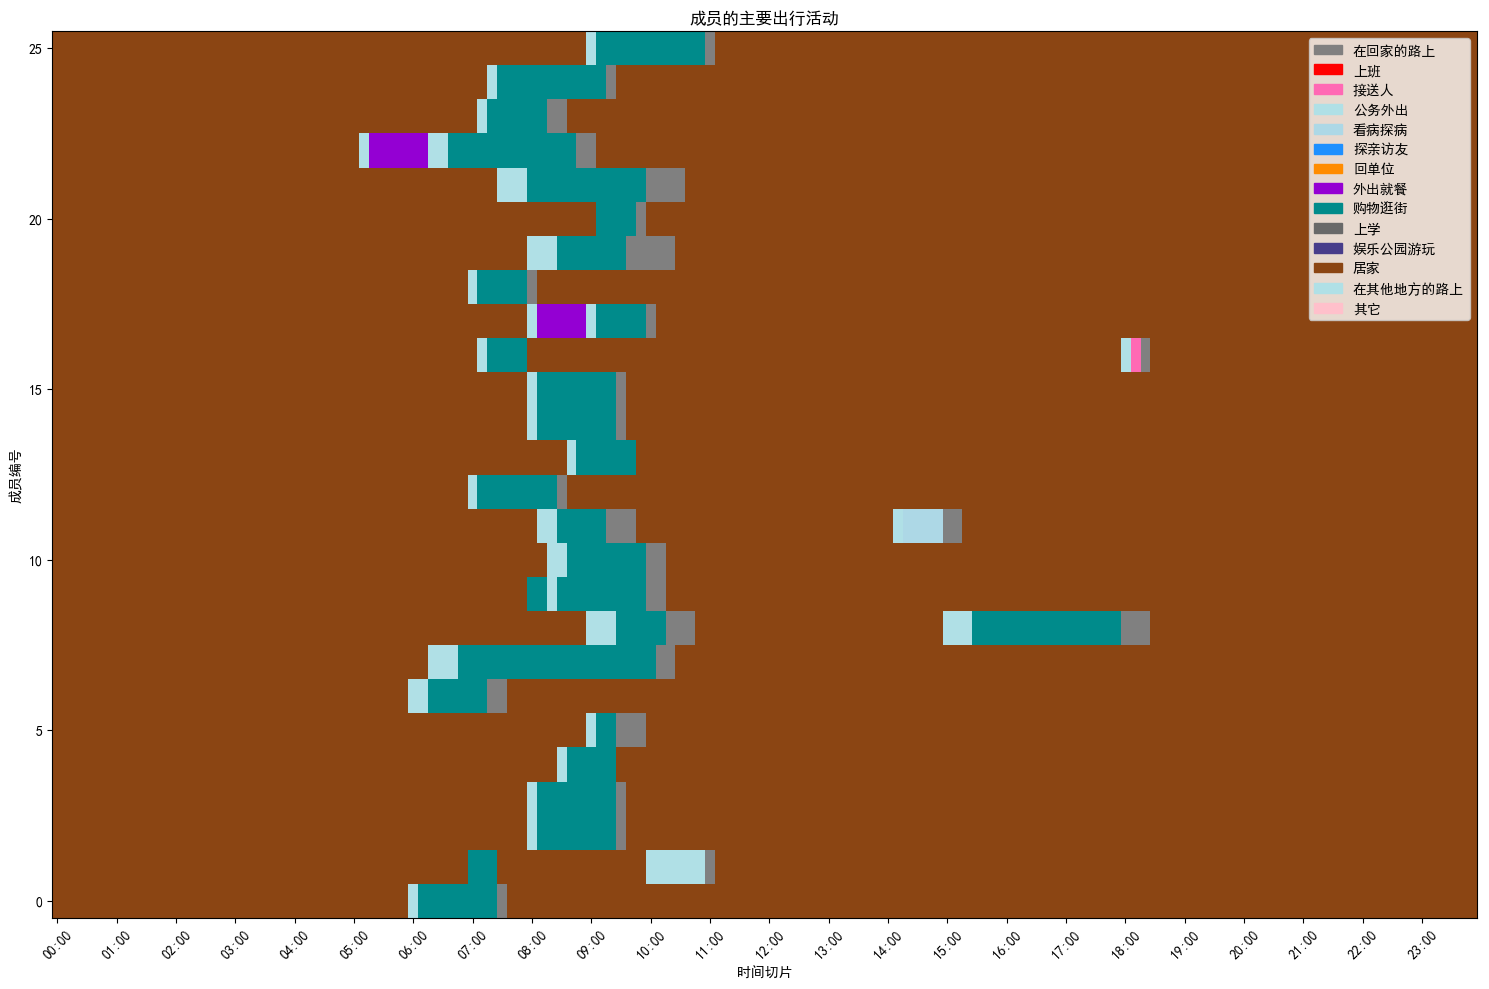

<Figure size 1500x1000 with 0 Axes>

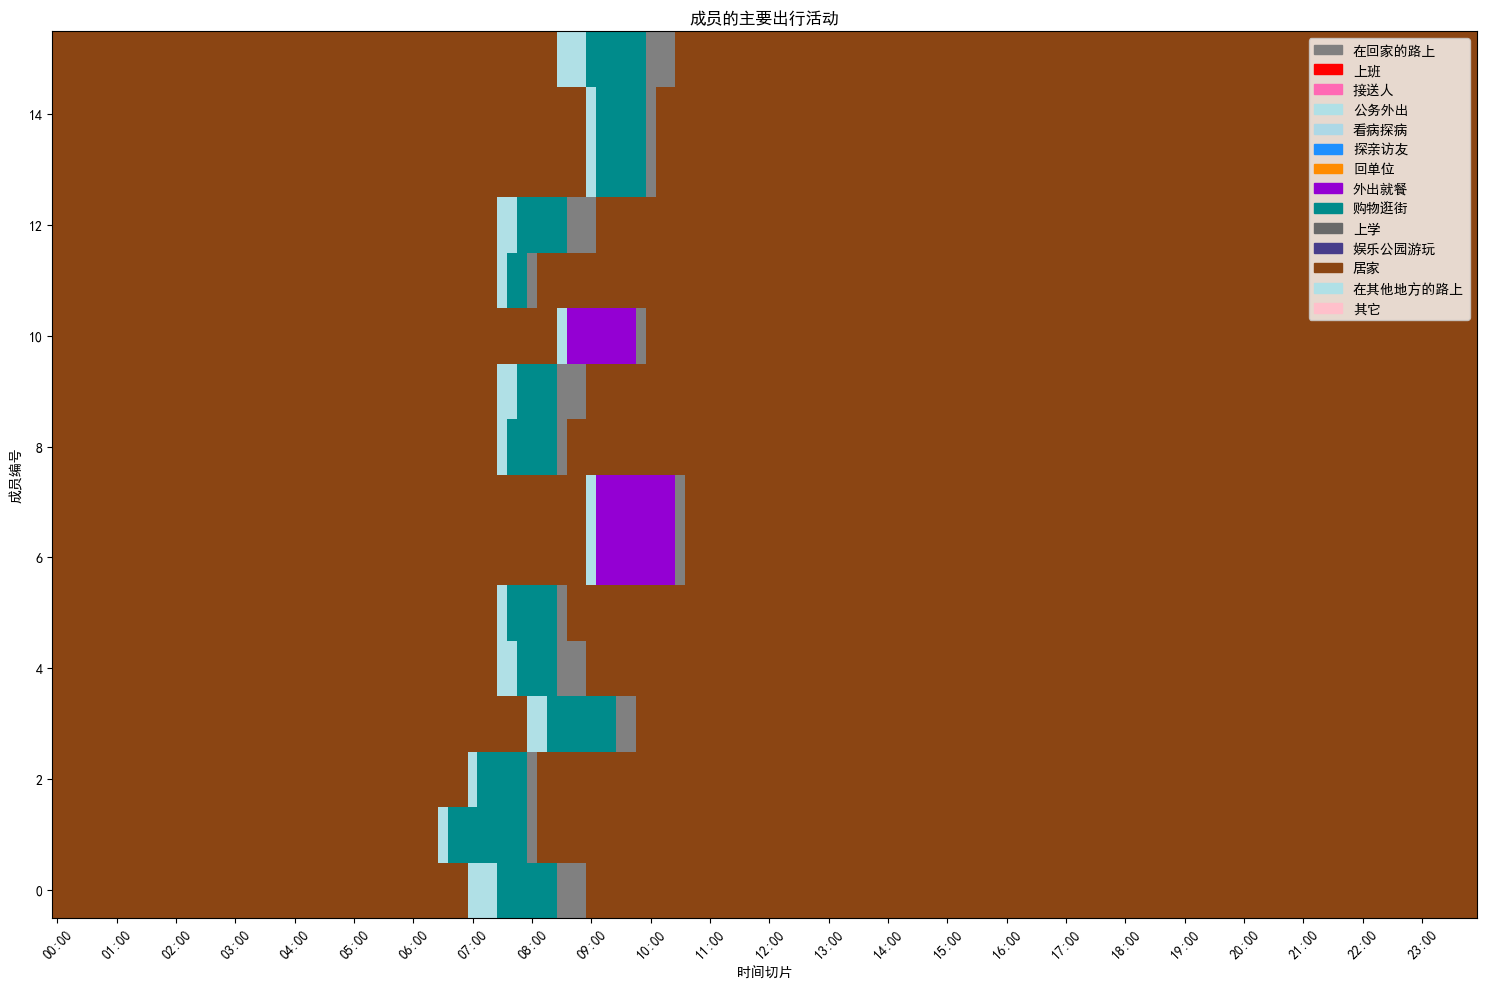

<Figure size 1500x1000 with 0 Axes>

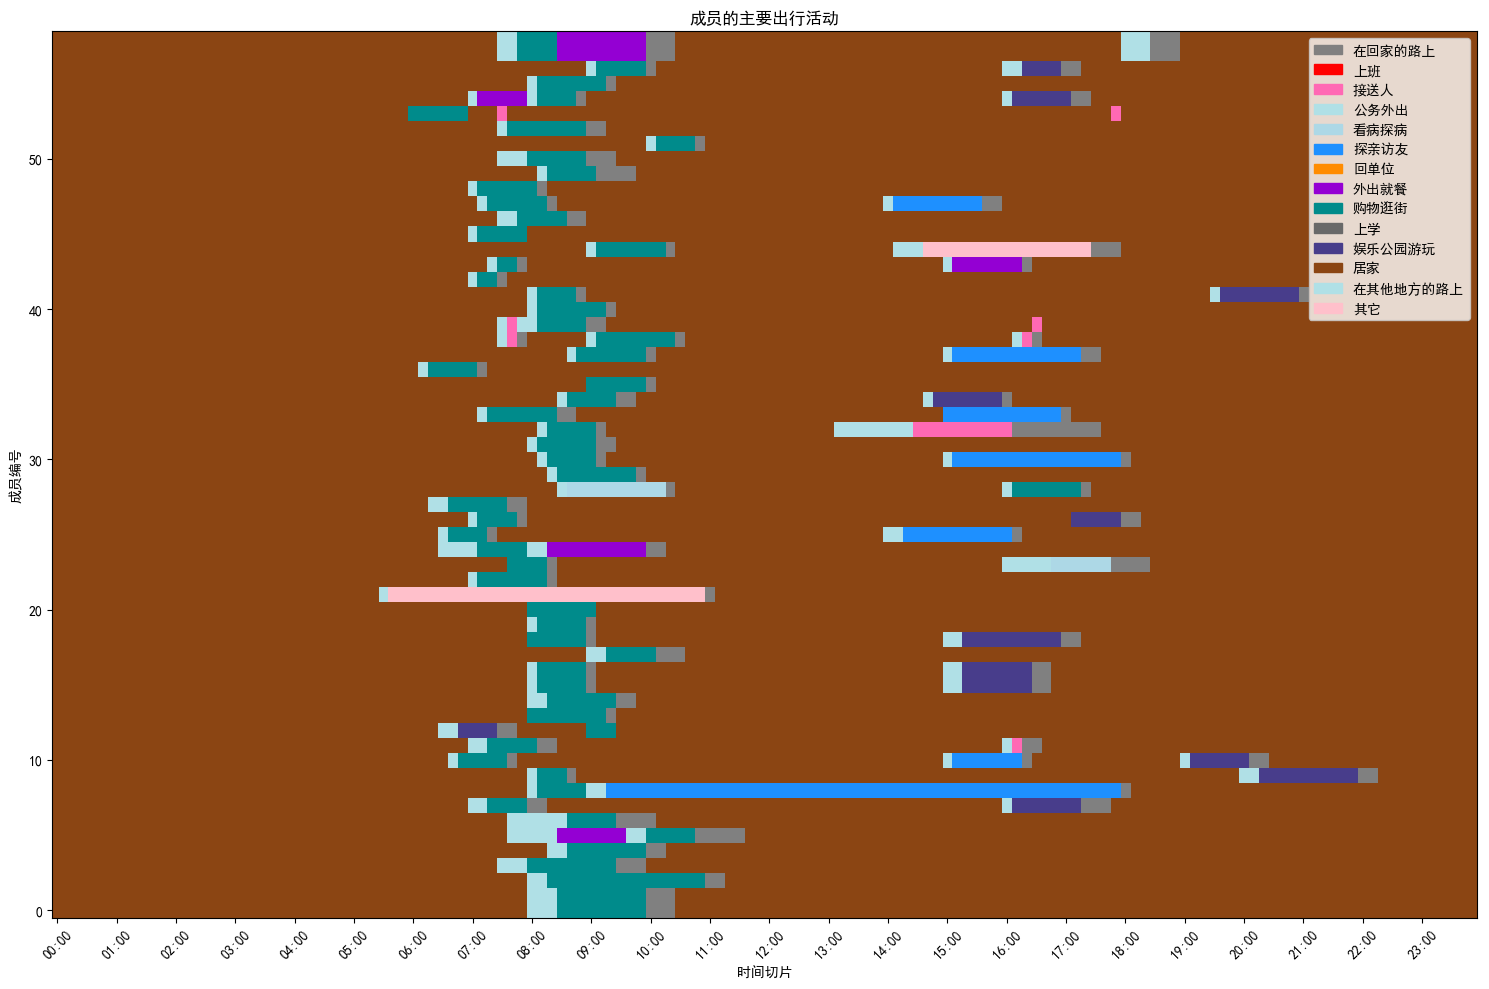

<Figure size 1500x1000 with 0 Axes>

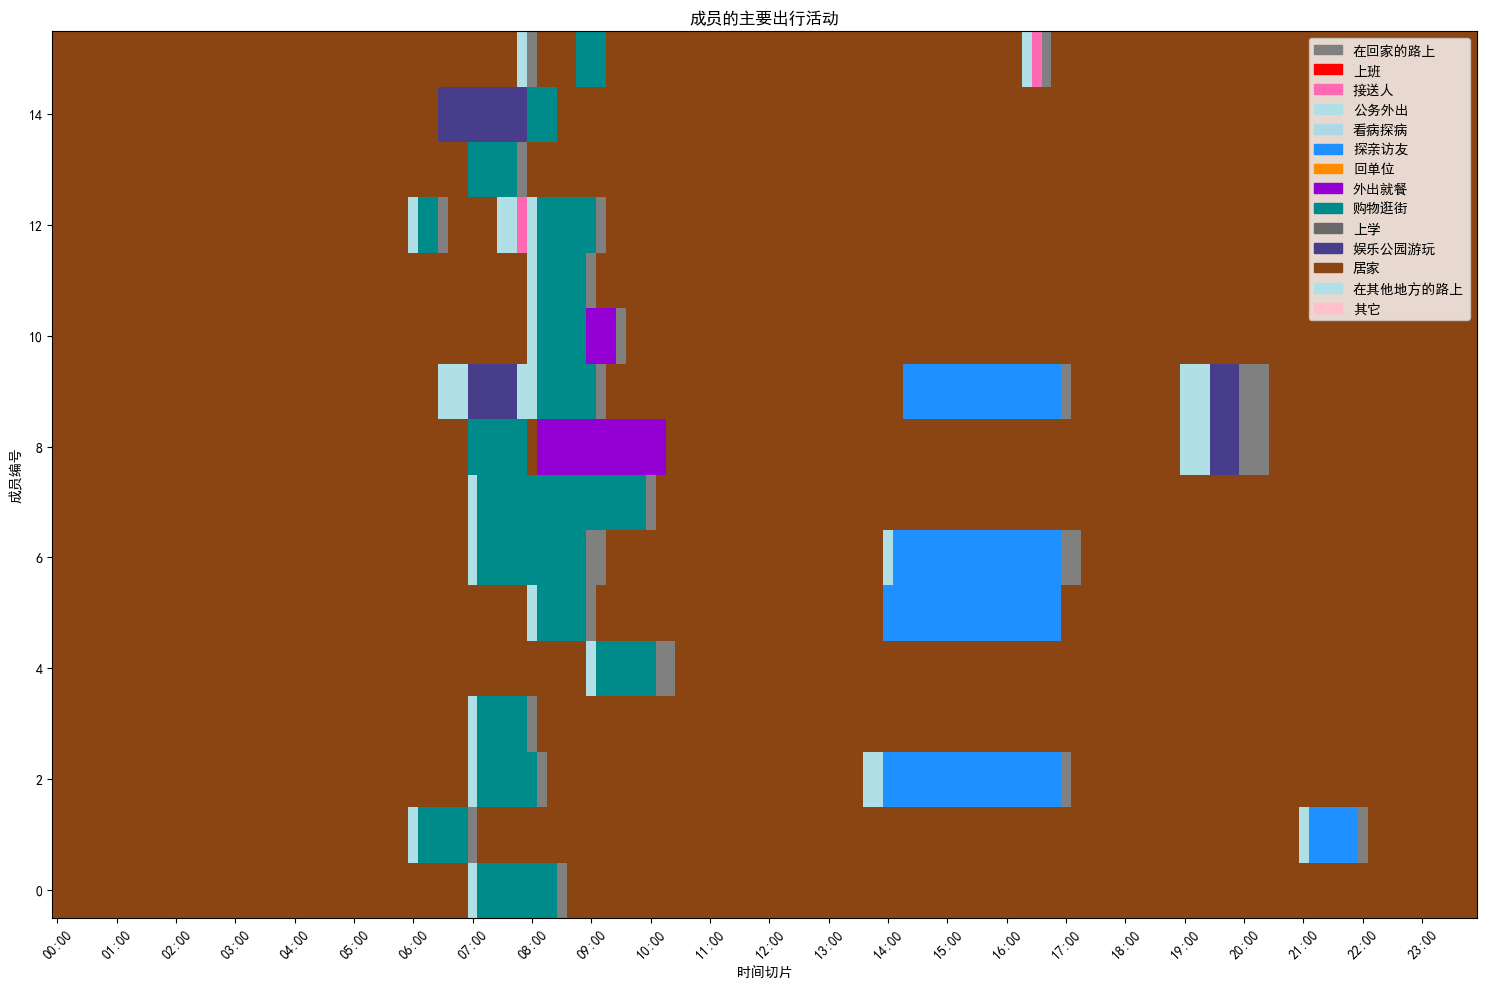

<Figure size 1500x1000 with 0 Axes>

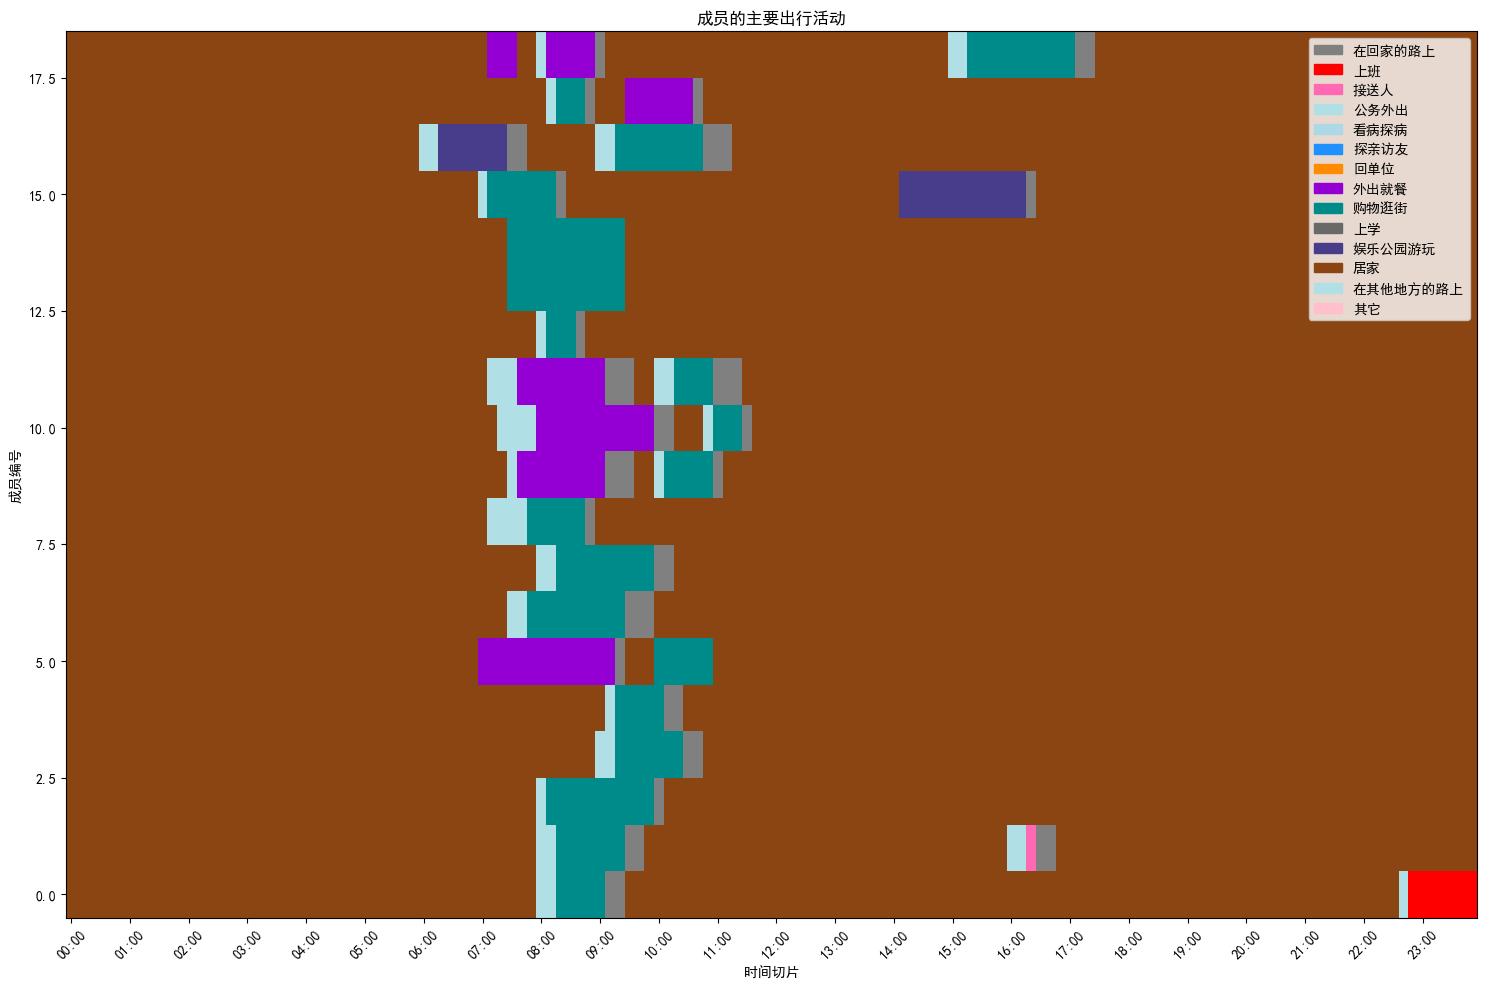

<Figure size 1500x1000 with 0 Axes>

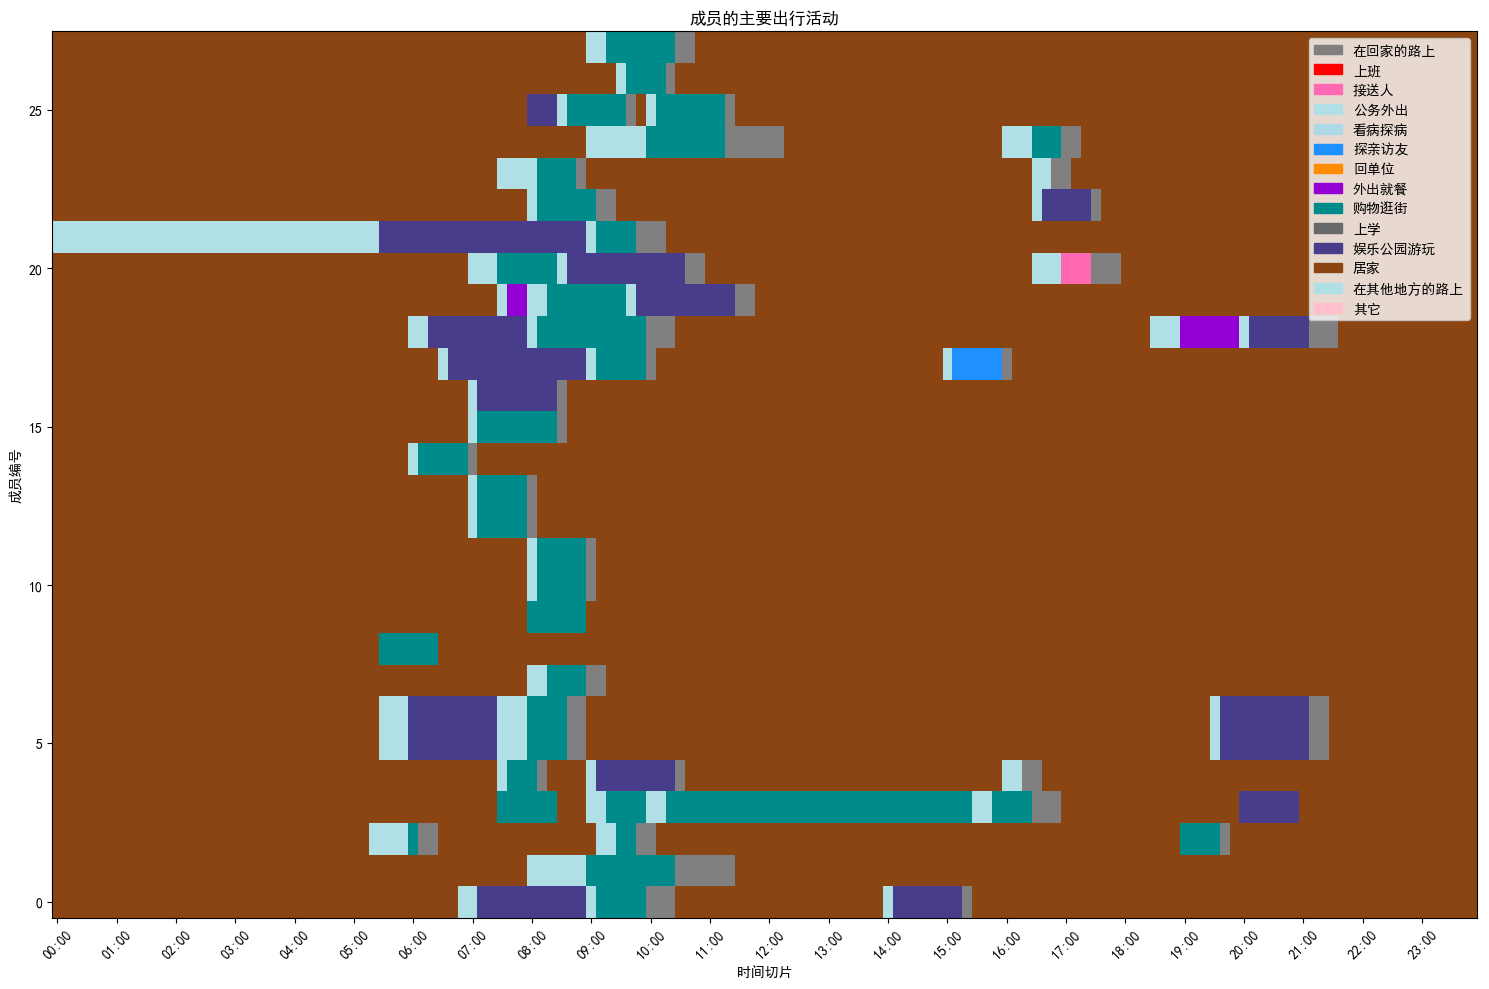

<Figure size 1500x1000 with 0 Axes>

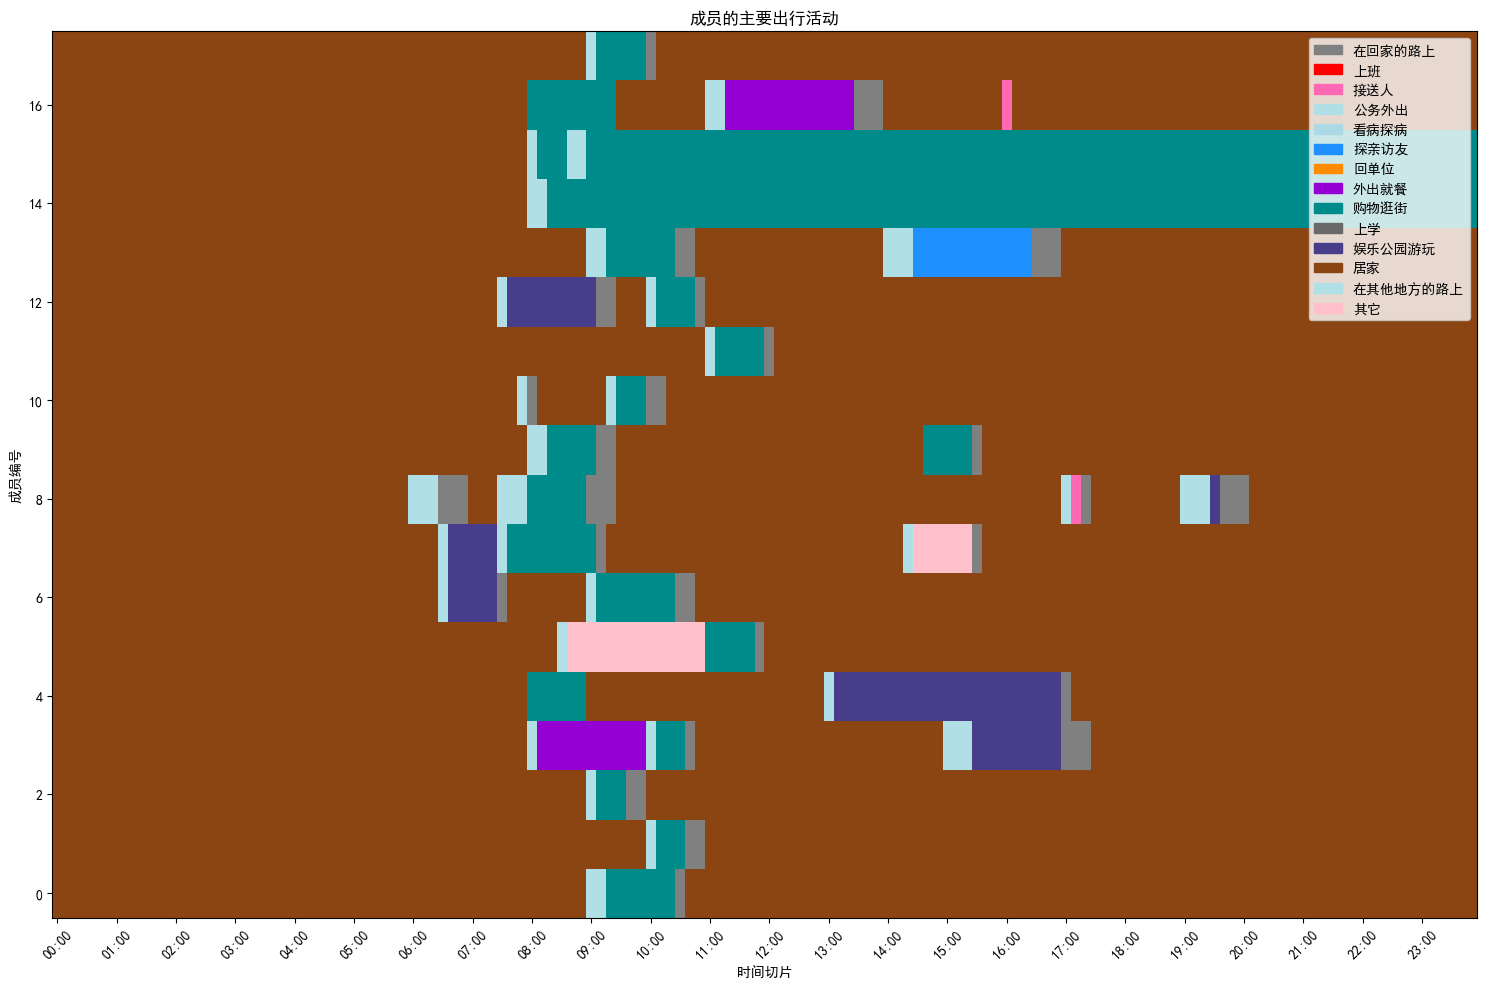

<Figure size 1500x1000 with 0 Axes>

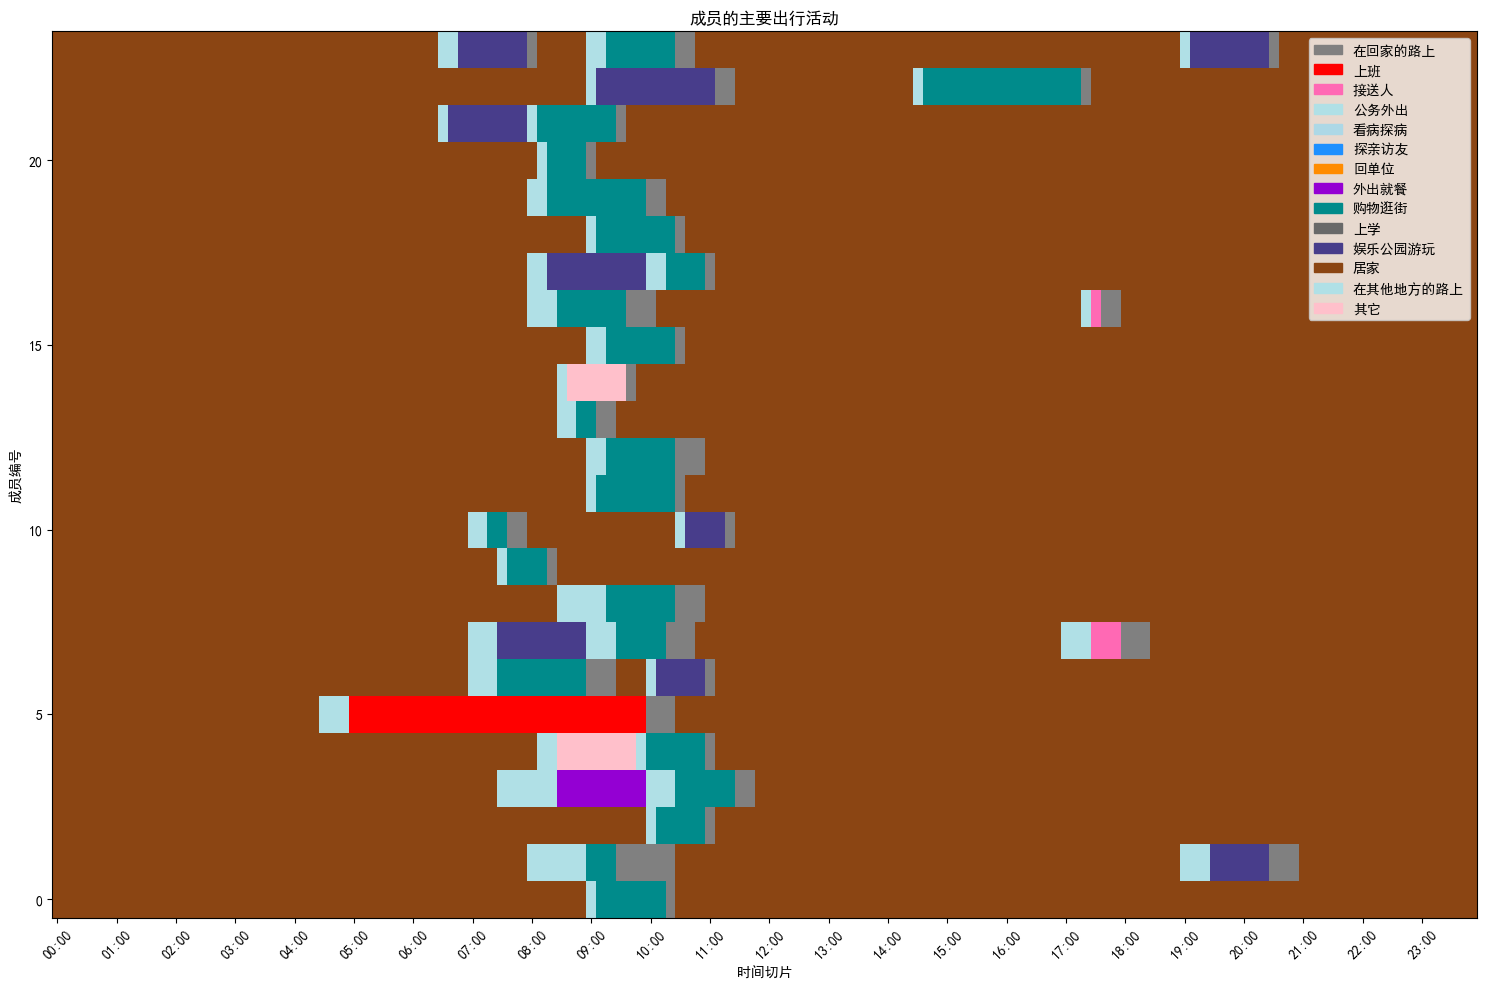

<Figure size 1500x1000 with 0 Axes>

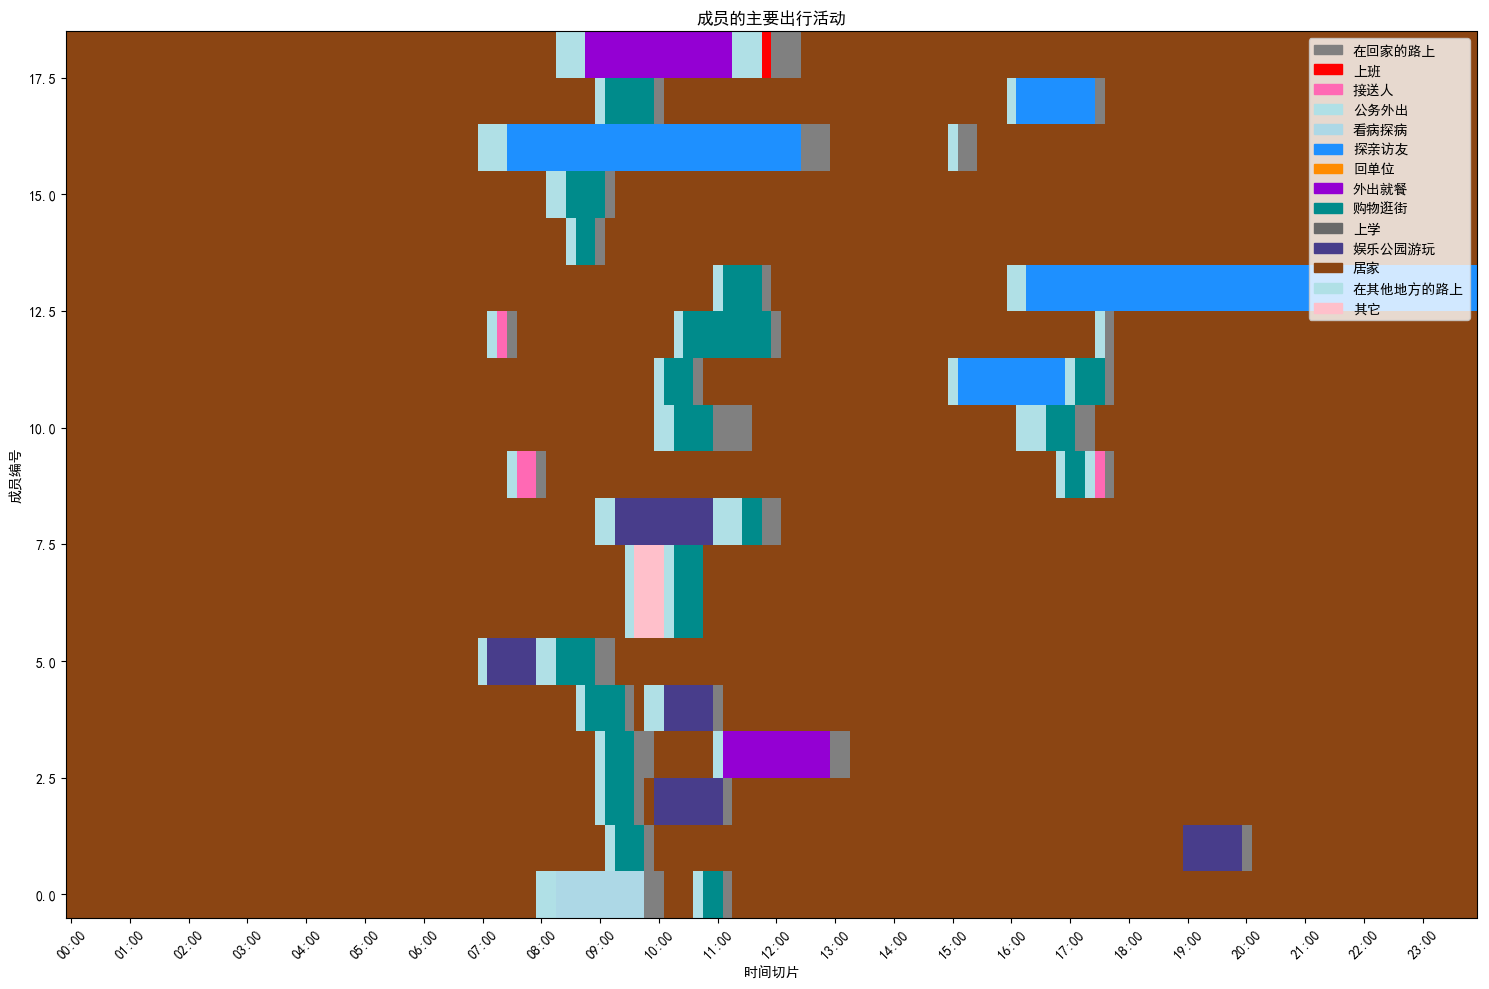

<Figure size 1500x1000 with 0 Axes>

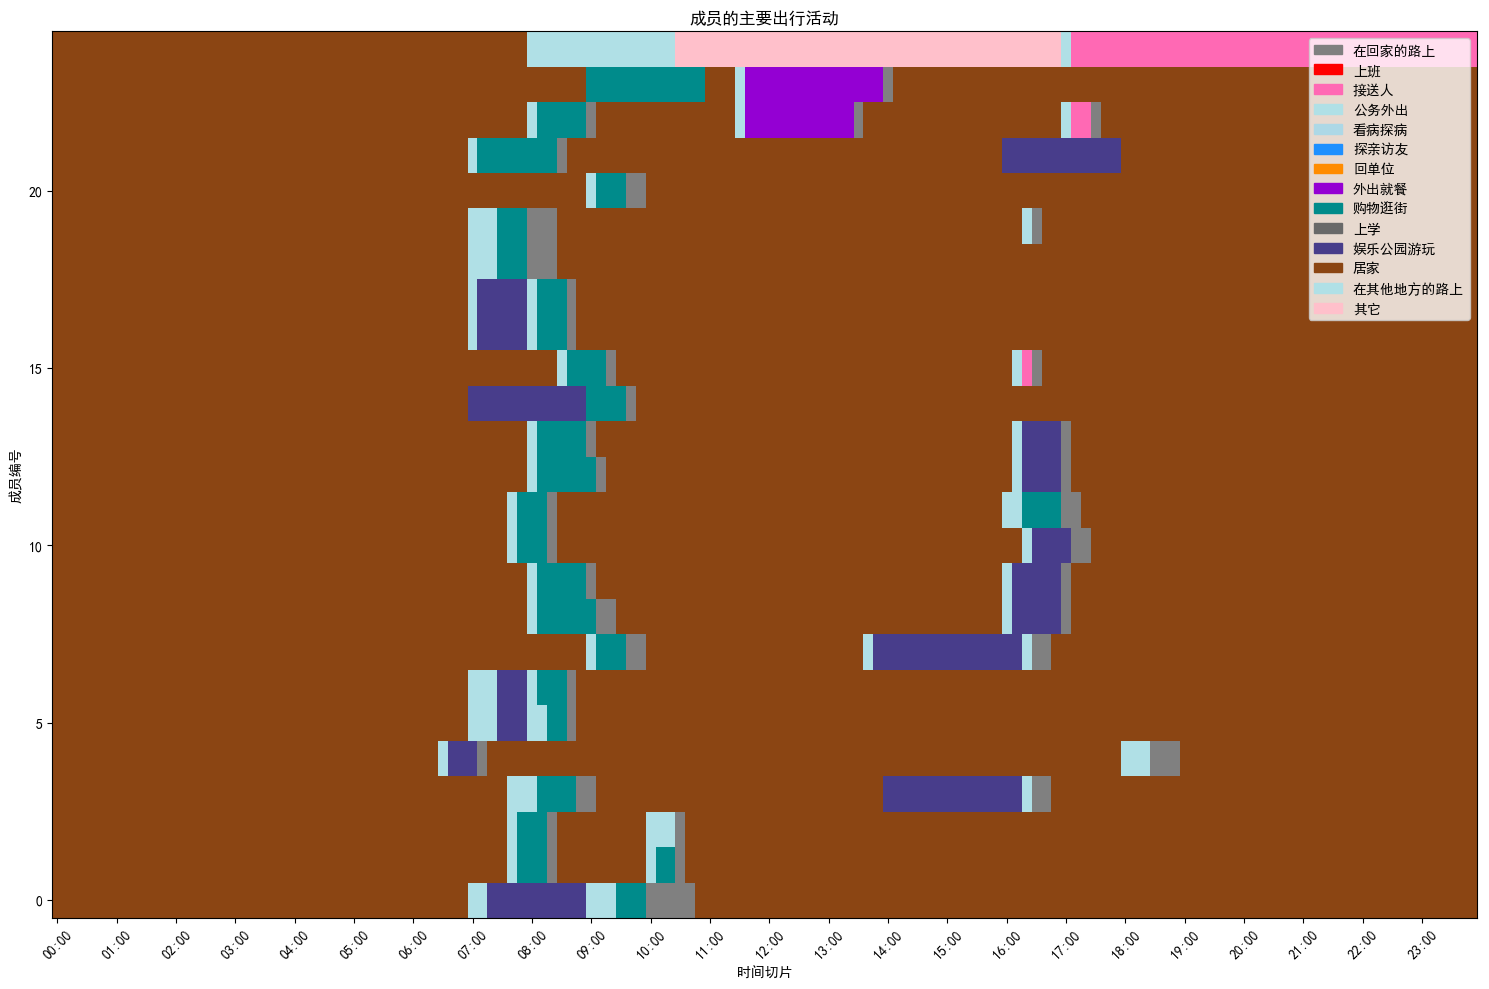

<Figure size 1500x1000 with 0 Axes>

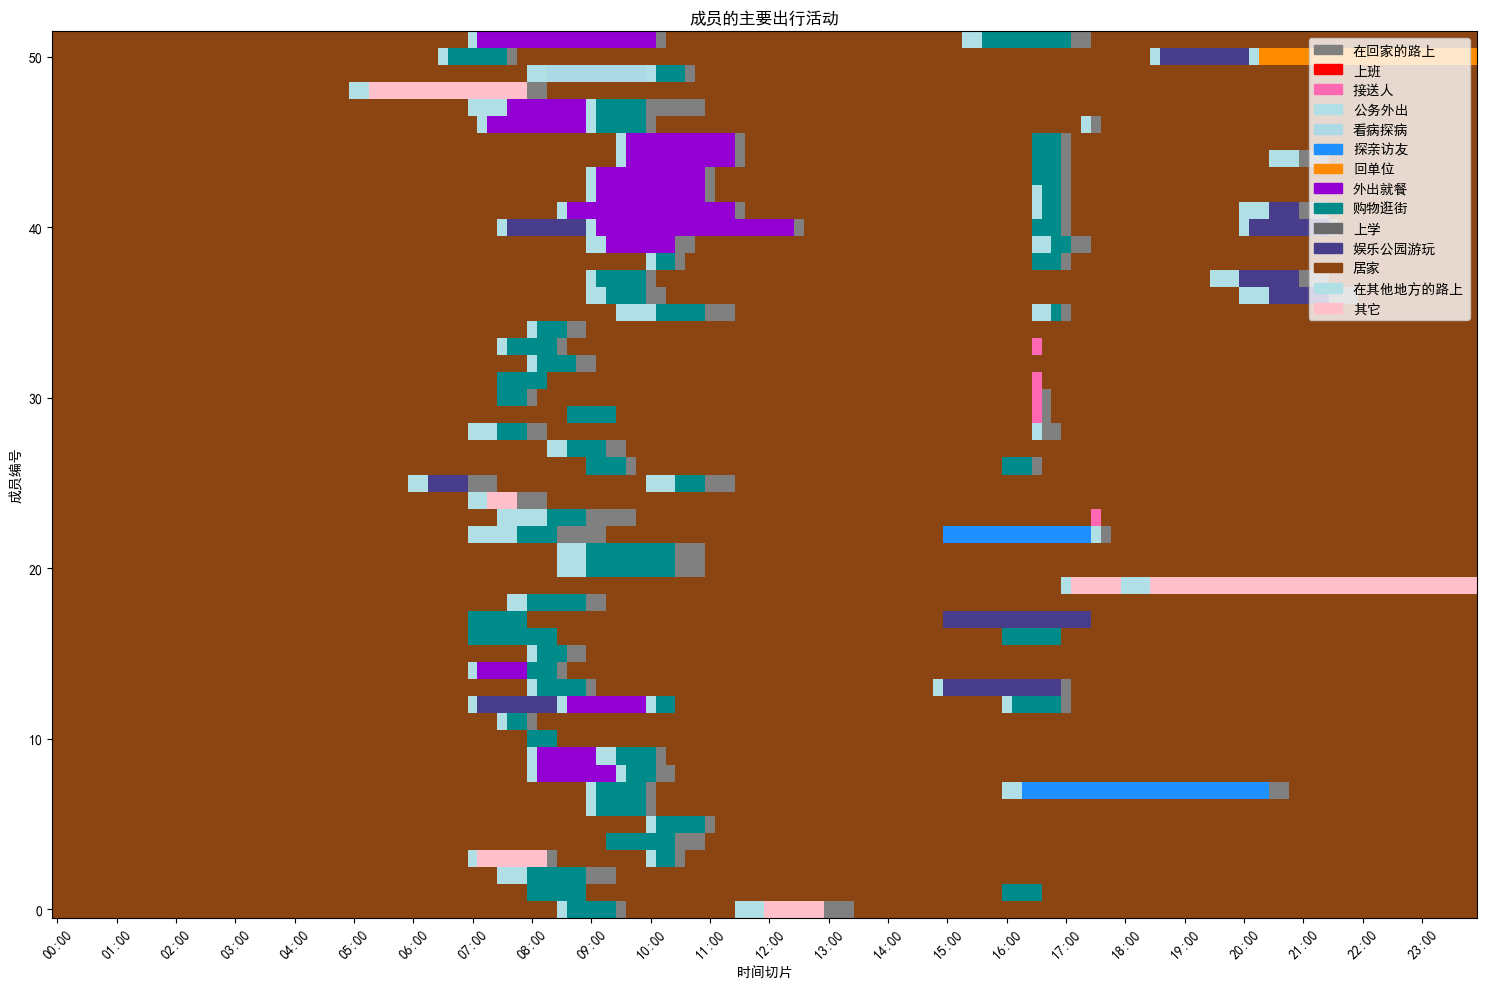

<Figure size 1500x1000 with 0 Axes>

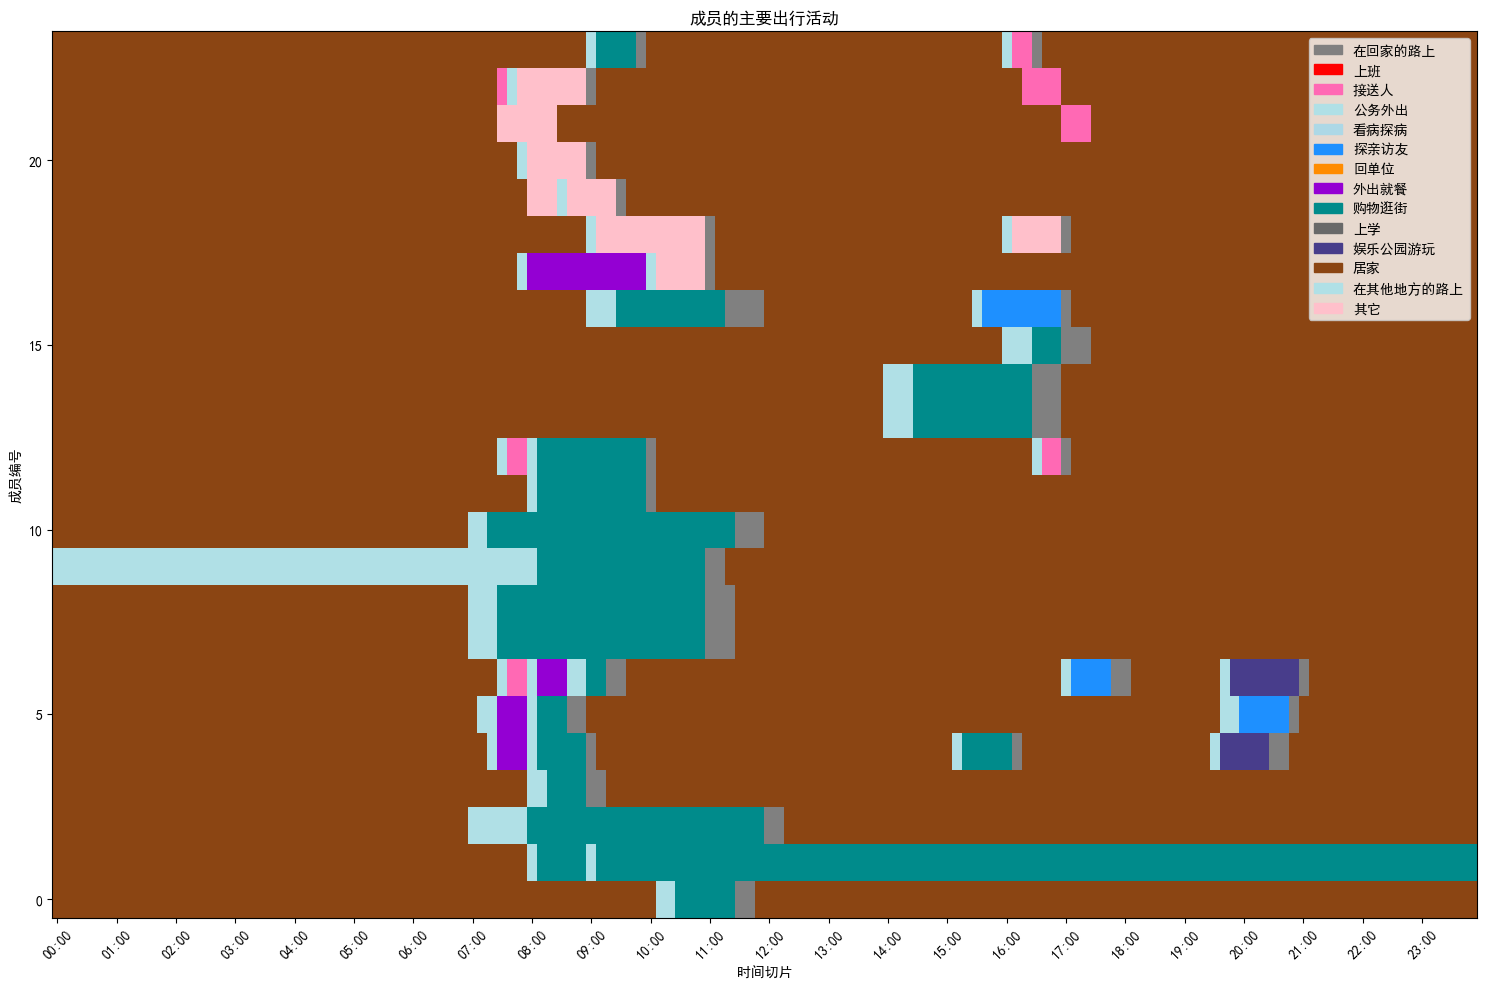

<Figure size 1500x1000 with 0 Axes>

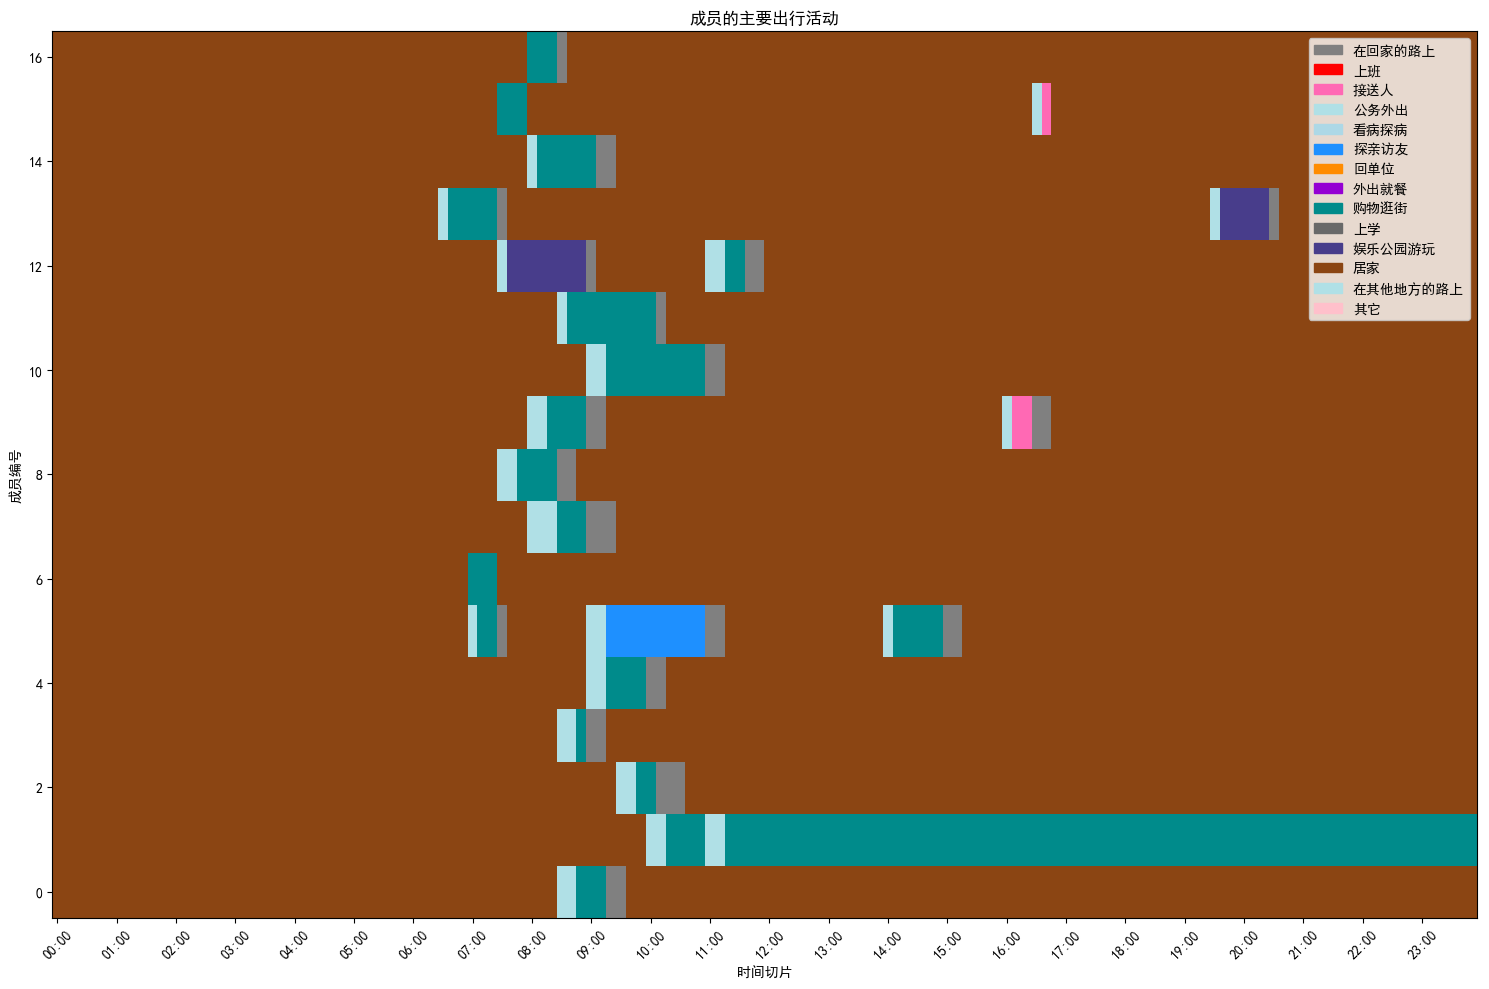

<Figure size 1500x1000 with 0 Axes>

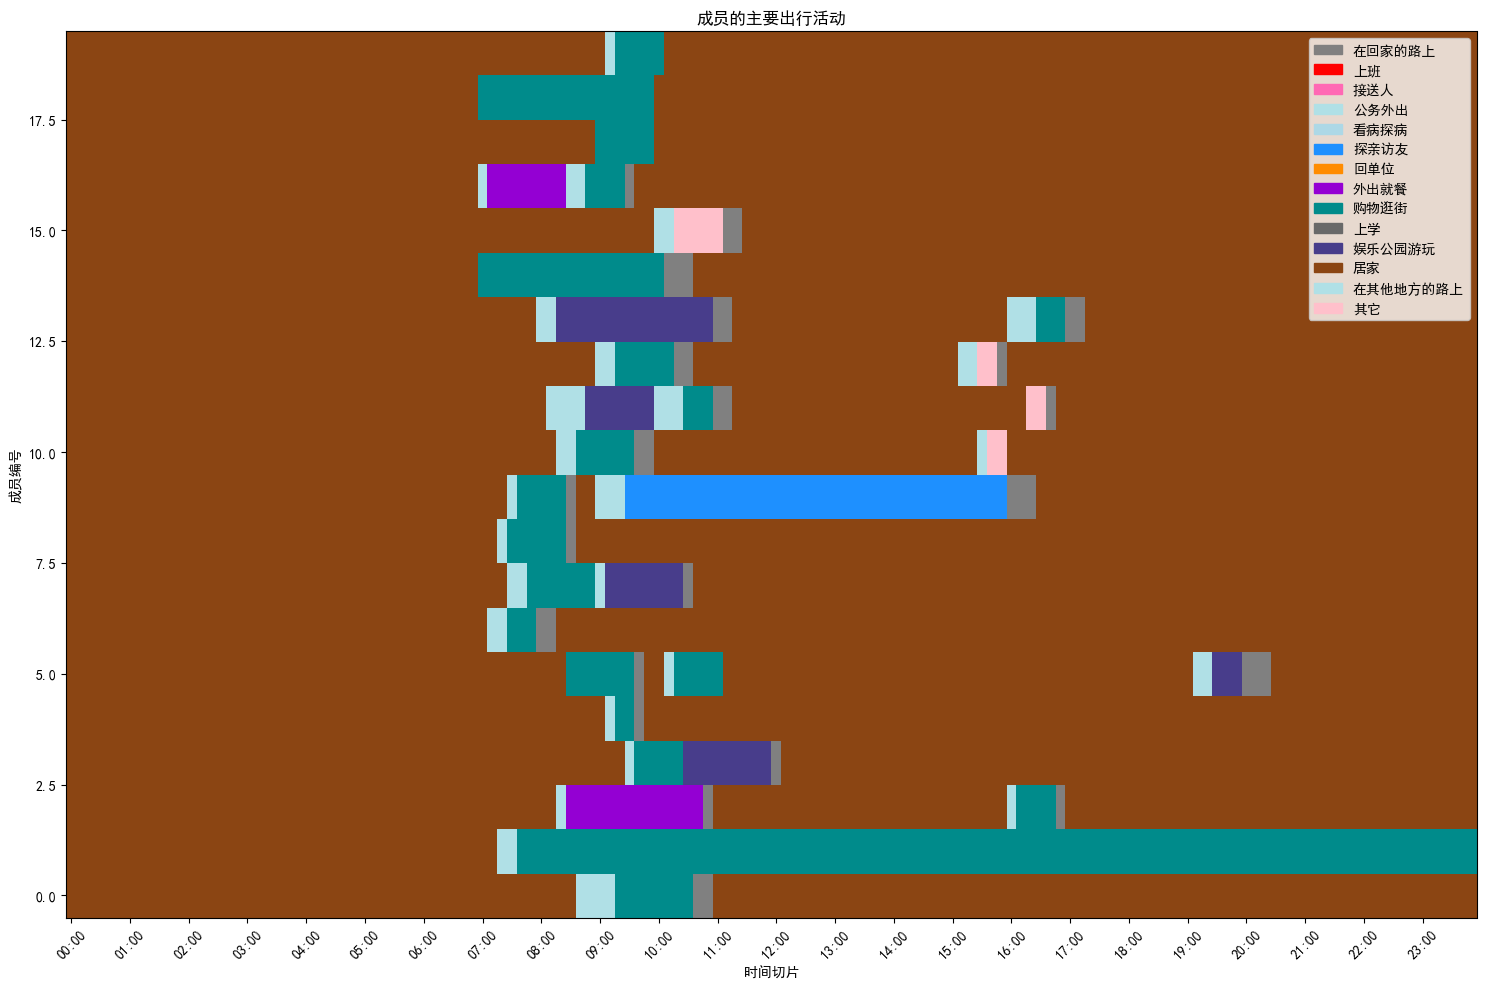

<Figure size 1500x1000 with 0 Axes>

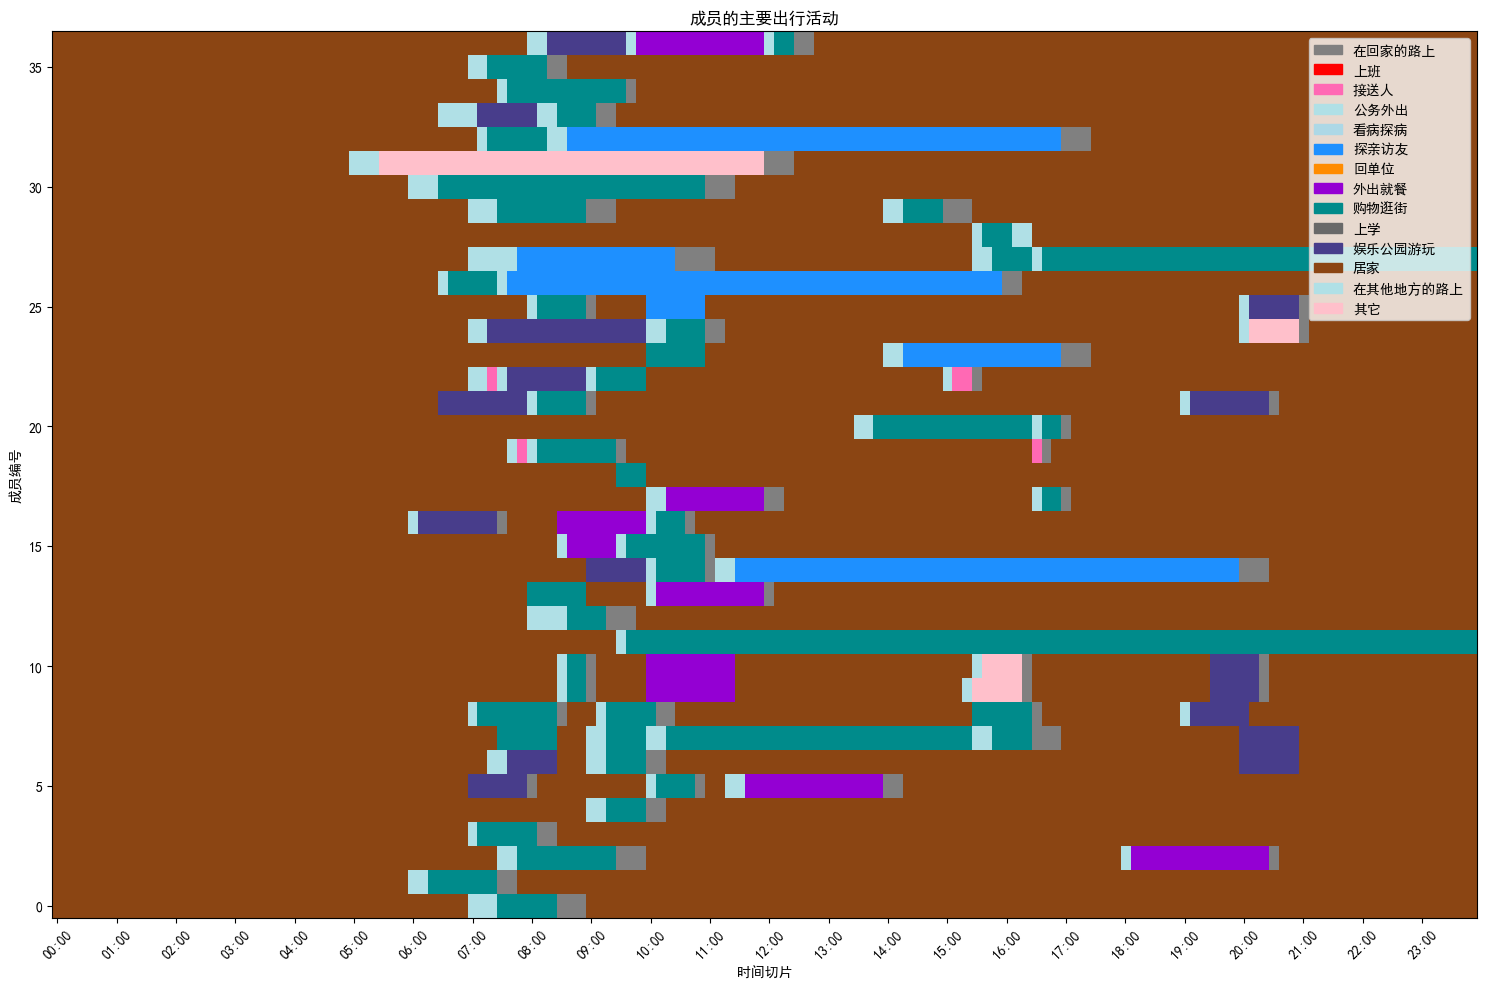

<Figure size 1500x1000 with 0 Axes>

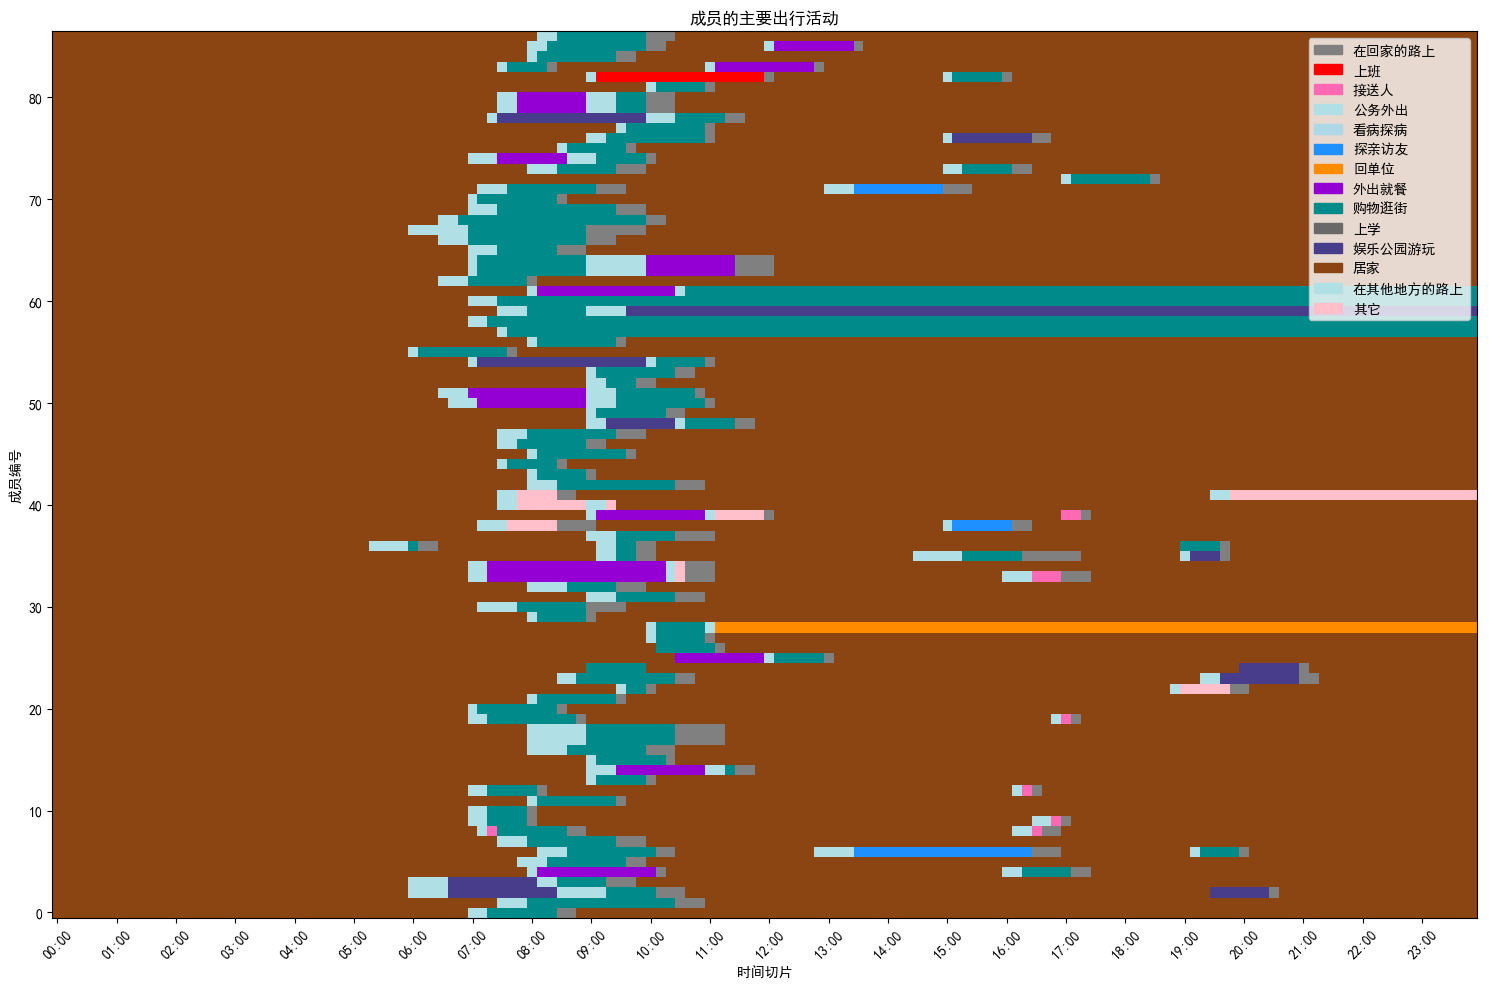

<Figure size 1500x1000 with 0 Axes>

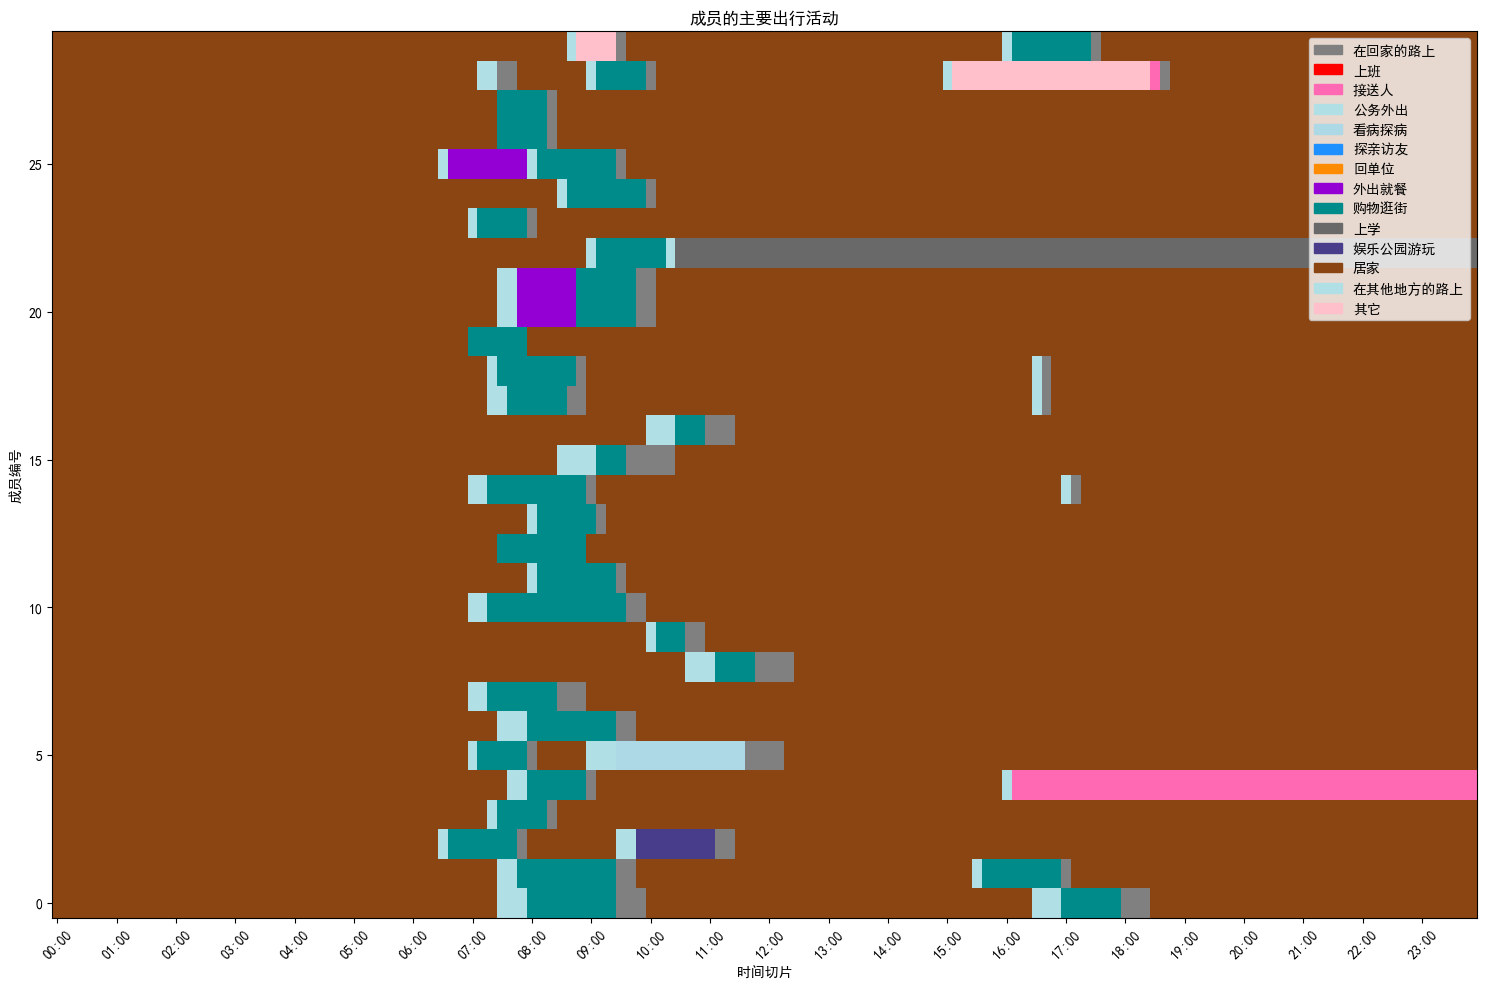

<Figure size 1500x1000 with 0 Axes>

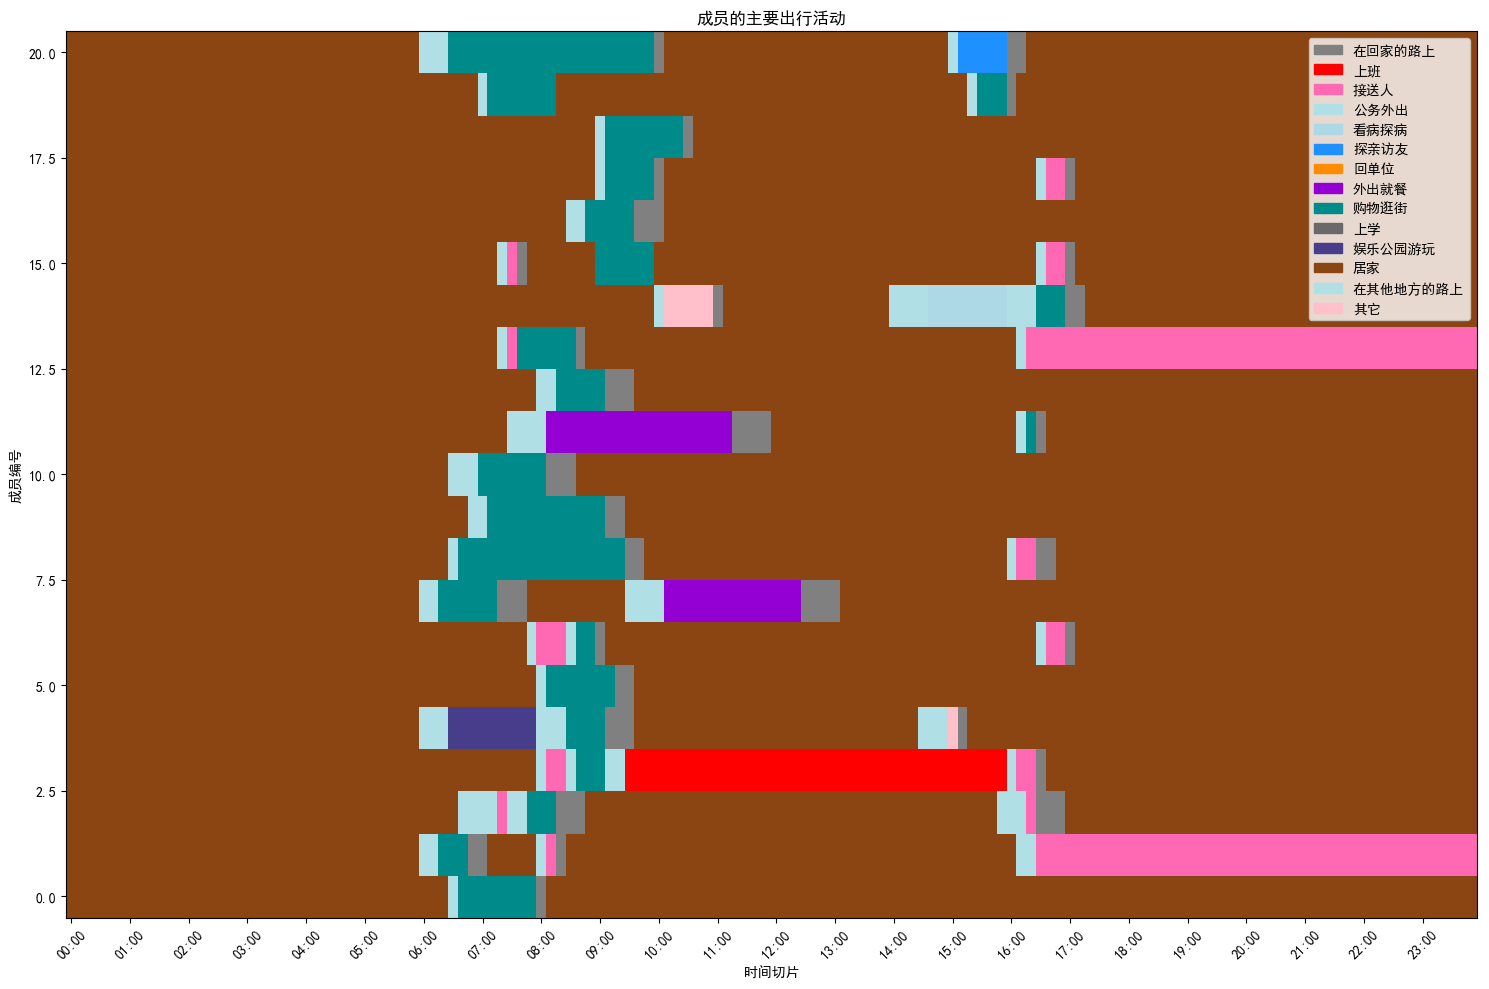

<Figure size 1500x1000 with 0 Axes>

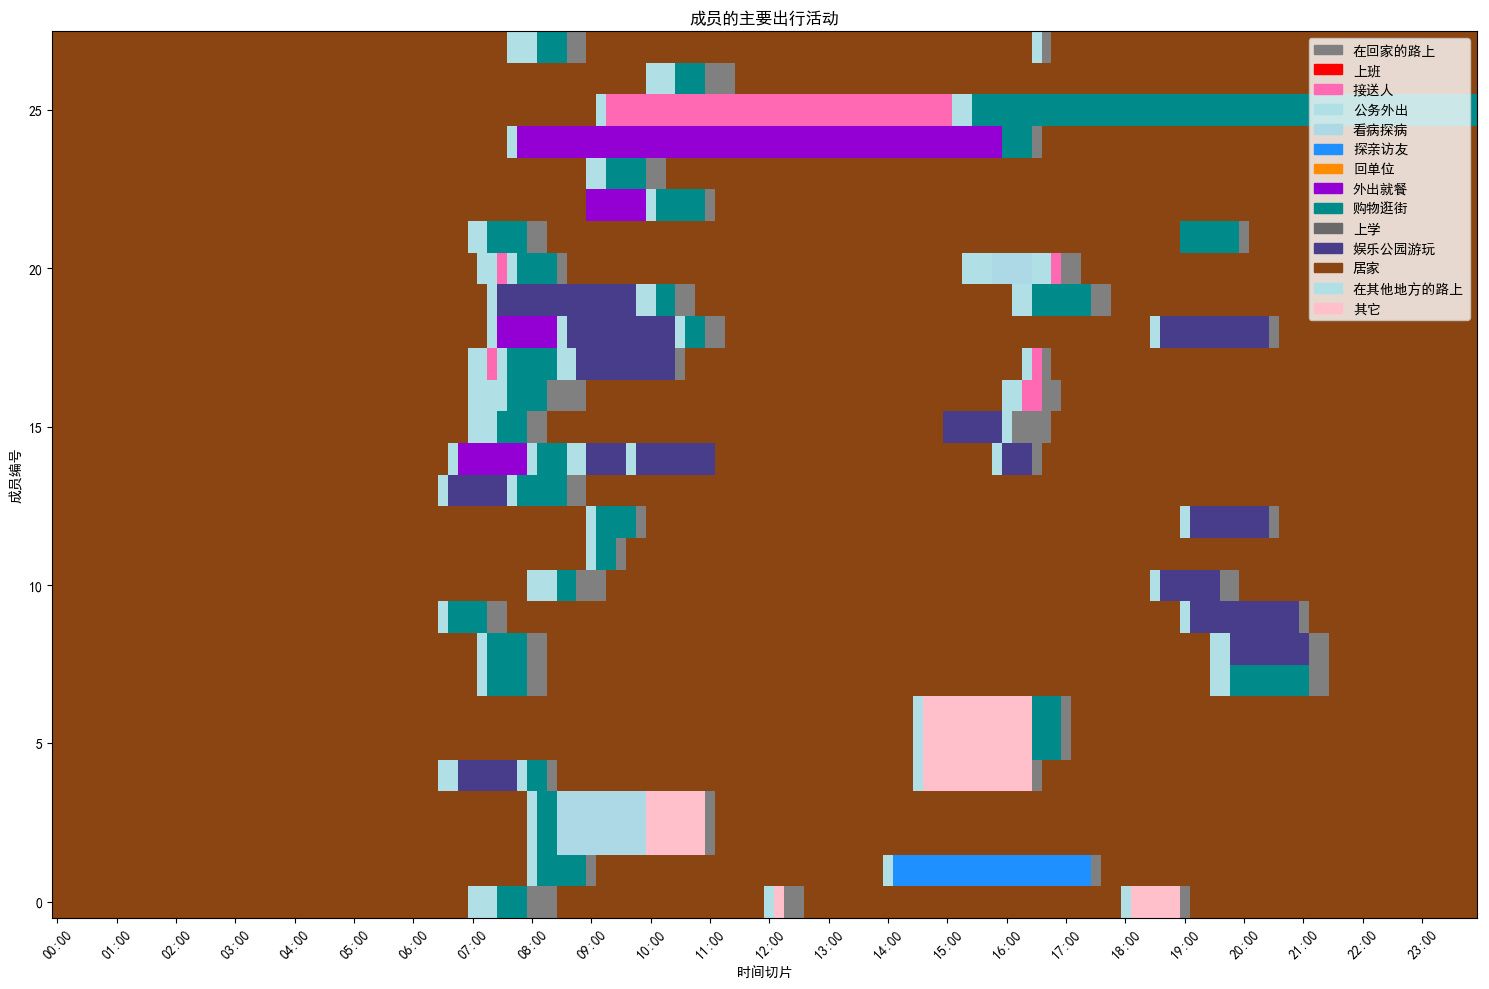

<Figure size 1500x1000 with 0 Axes>

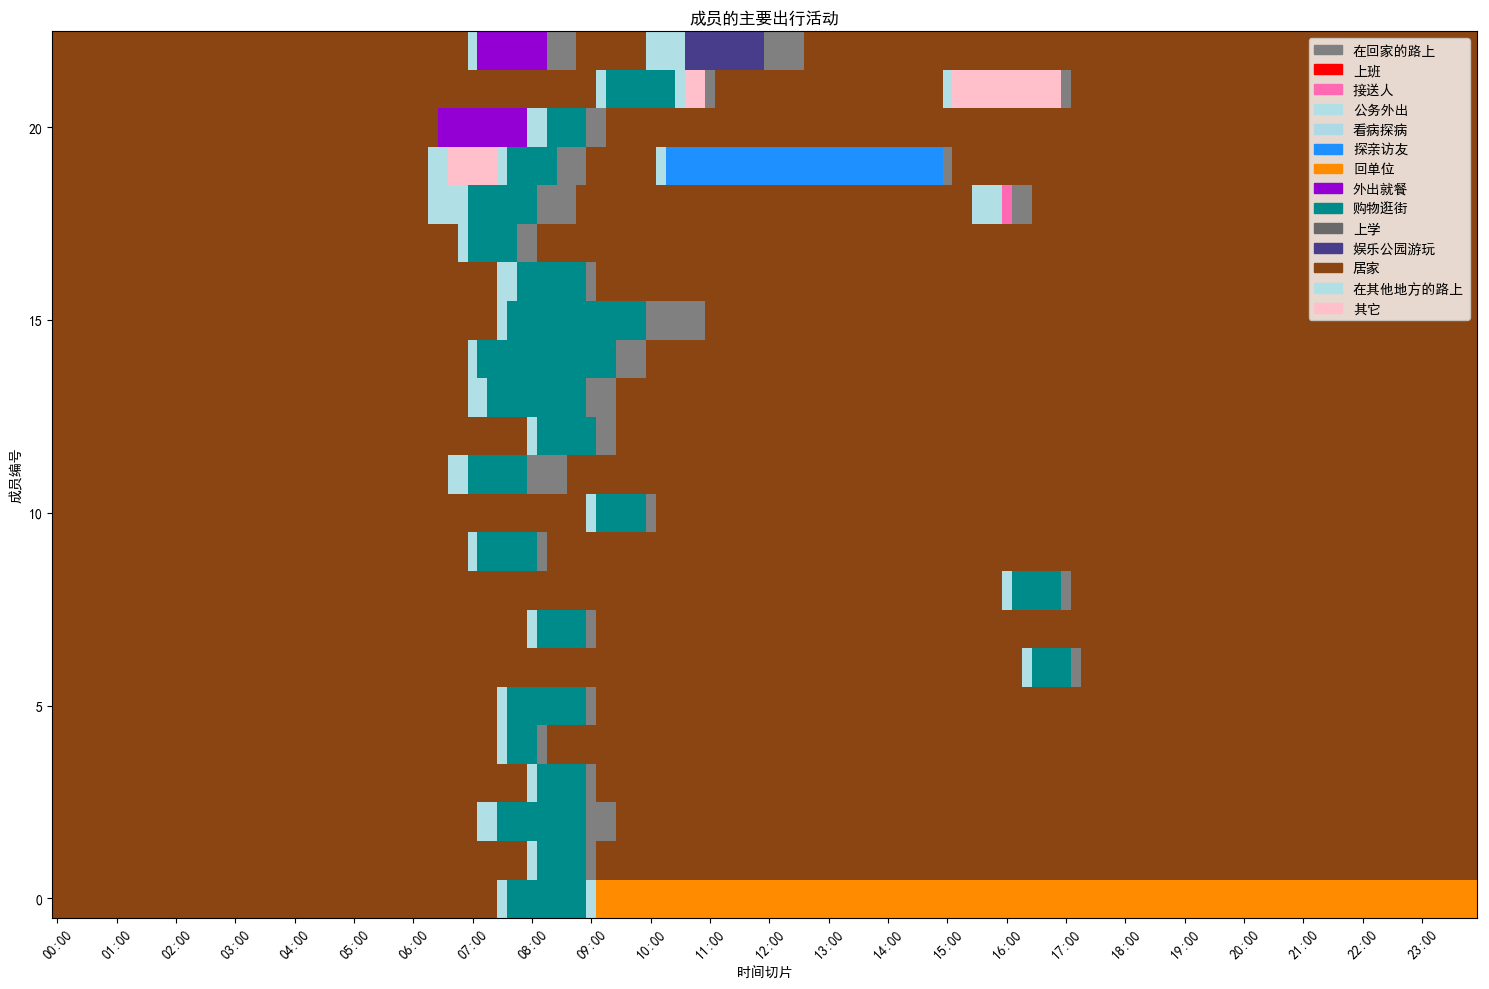

<Figure size 1500x1000 with 0 Axes>

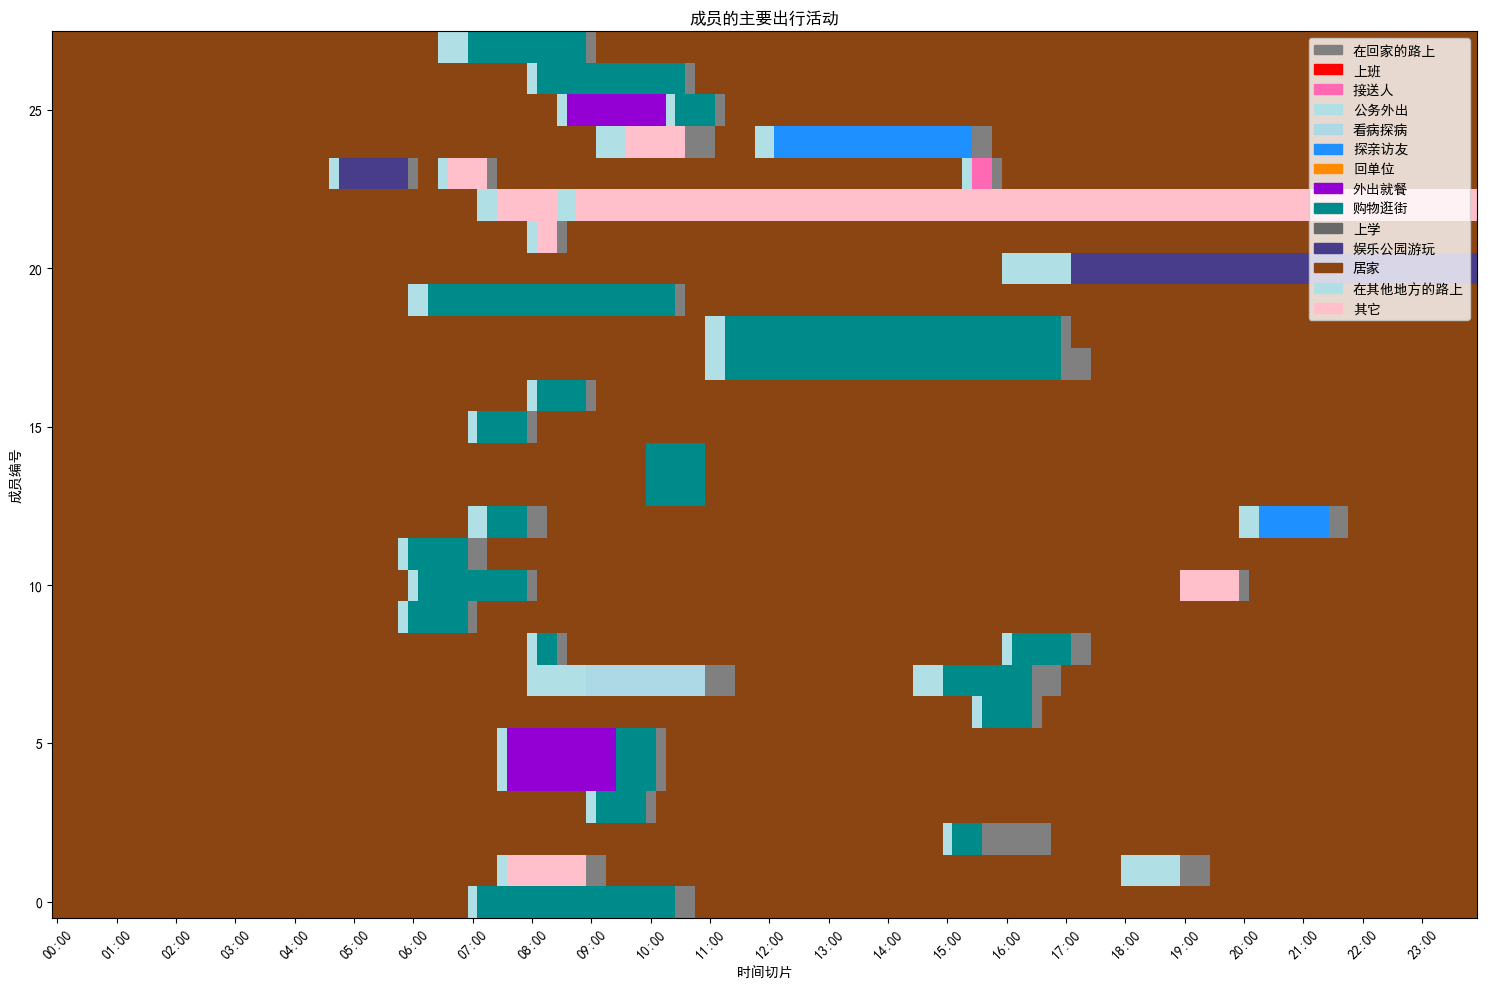

In [33]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.colors

# 列出指定目录中的所有文件
directory_path = "D:\\house_mix_EM\\出行目的_簇"
all_files = [os.path.join(directory_path, file) for file in os.listdir(directory_path) if file.endswith('.csv')]

# 对于目录中的每个文件进行转换
for file_path in all_files:
    
    # 读取CSV文件
    df = pd.read_csv(file_path)
    
    def time_to_minutes(time_str):
        h, m, s = map(int, time_str.split(':'))
        return h * 60 + m + s / 60

    def assign_activity_type(start_time, end_time, activity, time_slices):
        start_minutes = time_to_minutes(start_time)
        end_minutes = time_to_minutes(end_time)

        # 根据活动进行分类
        if "的路上" in activity and activity != "在回家的路上":
            activity = "在其他地方的路上"
#         elif activity in ["上班", "公务外出", "上学", "回单位"]:
#             activity = "工作活动"
#         elif activity in ["外出就餐", "购物逛街"]:
#             activity = "购物活动"

        start_slice_index = int(start_minutes // 10)
        end_slice_index = int(end_minutes // 10)

        start_slice_index = min(max(start_slice_index, 0), 24*6 - 1)
        end_slice_index = min(max(end_slice_index, 0), 24*6 - 1)

        for i in range(start_slice_index, end_slice_index+1):  
            time_slices[i] = activity

        return time_slices

    # 初始化一个存储所有成员的主要活动的列表
    all_members_activities = []


    # 遍历DataFrame的每一行
    for index, row in df.iterrows():
        travel_times = eval(row['出行时间'])
        purposes = eval(row['出行目的'])

        time_slices = ['居家'] * (24*6)

        for i, (start_time, end_time) in enumerate(travel_times):
            activity_on_the_way = "在" + purposes[i] + "的路上"
            time_slices = assign_activity_type(start_time, end_time, activity_on_the_way, time_slices)

            if i < len(travel_times) - 1:
                next_activity_start_time = end_time
                next_activity_end_time = travel_times[i + 1][0]
                activity_at_location = purposes[i] if purposes[i] != "回家" else "居家"
                time_slices = assign_activity_type(next_activity_start_time, next_activity_end_time, activity_at_location, time_slices)
            else:
                next_activity_start_time = end_time
                next_activity_end_time = '23:59:59'
                activity_at_location = purposes[i] if purposes[i] != "回家" else "居家"
                time_slices = assign_activity_type(next_activity_start_time, next_activity_end_time, activity_at_location, time_slices)

        all_members_activities.append(time_slices)
#         print(time_slices)


#         activity_char_map = {
#         '在其他地方的路上': 'A',     # gray
#         '工作活动': 'B',            # red
#         '购物活动': 'C',            # hotpink
#         '在回家的路上': 'D',        # powderblue
#         '居家': 'E',                # lightblue
#         # 其他未改变的活动和颜色可以继续保留或按需更新
#         '接送人': 'F',              # dodgerblue
#         '看病探病': 'G',            # darkorange
#         '探亲访友': 'H',             # darkviolet
#     #     '回单位': '#8B4513',               # saddlebrown
#     #     '上学': '#483D8B',                # darkslateblue
#         '娱乐公园游玩': 'I',         # darkcyan
#         '其它': 'J'                 # dimgray
#     }
    
    # 合并所有在路上
    activity_char_map = {
        '在回家的路上': 'A',           # gold
        '上班': 'B',             # red
        '接送人': 'C',            # dodgerblue
        '公务外出': 'D',        # darkgreen
        '看病探病': 'E',          # darkorange
        '探亲访友': 'F',           # darkviolet
        '回单位': 'G',            # saddlebrown
        '外出就餐': 'H',          # hotpink
        '购物逛街': 'I',          # darkgoldenrod
        '上学': 'J',             # darkslateblue
        '娱乐公园游玩': 'K',       # darkcyan
        '居家': 'L',              # lightblue
        '在其他地方的路上': 'M',
        '其它': 'N'           # dimgray
        
    }



    all_members_activity_strings = []

    for member_activities in all_members_activities:
        member_string = ' '.join([activity_char_map.get(activity, 'X') for activity in member_activities])
        all_members_activity_strings.append(member_string)

#     print(all_members_activity_strings)
    
    directory_path_trans = "D:\\house_mix_EM\\出行目的_簇_转换"

    # 保存转换后的文件到同一目录，但是更改文件后缀为'_converted.txt'
    output_path = os.path.join(directory_path_trans, os.path.basename(file_path).replace('.csv', '_converted.txt'))
    with open(output_path, 'w') as f:
        for activity_string in all_members_activity_strings:
            f.write(activity_string + '\n')
            
            
      # 开始绘图
    plt.figure(figsize=(15,10))

    # 创建一个颜色映射字典。这取决于您的出行目的，您可能需要根据您的数据调整它。

#     activity_color_map = {
#         '在其他地方的路上': '#808080',     # gray
#         '工作活动': '#FF0000',            # red
#         '购物活动': '#FF69B4',            # hotpink
#         '在回家的路上': '#B0E0E6',        # powderblue
#         '居家': '#ADD8E6',                # lightblue
#         # 其他未改变的活动和颜色可以继续保留或按需更新
#         '接送人': '#1E90FF',              # dodgerblue
#         '看病探病': '#FF8C00',            # darkorange
#         '探亲访友': '#9400D3',             # darkviolet
#     #     '回单位': '#8B4513',               # saddlebrown
#     #     '上学': '#483D8B',                # darkslateblue
#         '娱乐公园游玩': '#008B8B',         # darkcyan
#         '其它': '#696969'                 # dimgray
#     }
    
    activity_color_map = {
        '在回家的路上': '#808080',           # gold
        '上班': '#FF0000',             # red
        '接送人': '#FF69B4',            # dodgerblue
        '公务外出': '#B0E0E6',        # darkgreen
        '看病探病': '#ADD8E6',          # darkorange
        '探亲访友': '#1E90FF',           # darkviolet
        '回单位': '#FF8C00',            # saddlebrown
        '外出就餐': '#9400D3',          # hotpink
        '购物逛街': '#008B8B',          # darkgoldenrod
        '上学': '#696969',             # darkslateblue
        '娱乐公园游玩': '#483D8B',       # darkcyan
        '居家': '#8B4513',              # lightblue
        '在其他地方的路上': '#B0E0E6',
        '其它': '#FFC0CB'           # dimgray
        
    }



    # 绘图部分
    time_slices_labels = [f"{str(i).zfill(2)}:00" for i in range(24) for _ in range(6)]  # 生成时间标签，每5分钟一个


    # 为了使用imshow，我们需要将所有的活动转换为一个二维数组
    activity_array = []

    for member_activities in all_members_activities:
        member_colors = []
        for activity in member_activities:
            color = activity_color_map.get(activity, '#FFFFFF')  # 使用默认颜色'white'如果活动为空或不在映射中
            member_colors.append(color)
        activity_array.append(member_colors)

    # 将颜色代码转换为RGB
    activity_array_rgb = [list(map(lambda x: matplotlib.colors.hex2color(x), row)) for row in activity_array]

    # 开始绘图
    plt.figure(figsize=(15,10))

    plt.imshow(activity_array_rgb, aspect='auto')

    # 设置matplotlib字体为支持中文的字体
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用SimHei字体
    plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号            

    # plt.yticks(range(len(all_members_activities)), range(1, len(all_members_activities)+1))
    plt.xticks(range(0, 24*6, 6), time_slices_labels[::6], rotation=45)  # 修改这里从24*4到24*12，并调整间隔
    plt.xlabel('时间切片')
    plt.ylabel('成员编号')
    plt.title('成员的主要出行活动')
    plt.tight_layout()
    plt.gca().invert_yaxis()  # 从下到上是逐渐增大的成员编号
    # 添加颜色对应的图例
    patches = [plt.Rectangle((0,0),1,1, color=activity_color_map[activity]) for activity in activity_color_map]
    labels = [activity for activity in activity_color_map]
    plt.legend(patches, labels, loc='best')
    plt.show()

# 计算距离

In [36]:
import pandas as pd
import math

def haversine_distance(point1, point2):
    """计算两个经纬度点之间的距离（单位：米）"""
    R = 6371000  # 地球的半径，单位是米
    lat1, lon1 = math.radians(point1[1]), math.radians(point1[0])
    lat2, lon2 = math.radians(point2[1]), math.radians(point2[0])
    
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    
    return R * c

# 从CSV文件中读取数据
data_file = 'encoded_data_ceshi.csv'  # 请替换为您的csv文件名
df = pd.read_csv(data_file)

# 将字符串转换回Python数据结构
df['轨迹'] = df['轨迹'].apply(lambda x: eval(x))

# 计算与家的距离并存储结果
results = {}
for index, data in df.iterrows():
    member_id = data['成员编号']
    home_location = data['轨迹'][0]  # 获取轨迹中的第一个点作为家的位置
    distances_from_home = [haversine_distance(point, home_location) for point in data['轨迹']]
    results[member_id] = distances_from_home

# 将结果添加到DataFrame并保存到CSV
df['家的距离'] = df['成员编号'].map(results).apply(lambda x: str(x))
df.to_csv('distances_from_home.csv', index=False)  # 请替换为您想要的输出文件名
        

In [72]:
%matplotlib qt

In [36]:
%matplotlib inline

# 每个人的家之间的距离热图

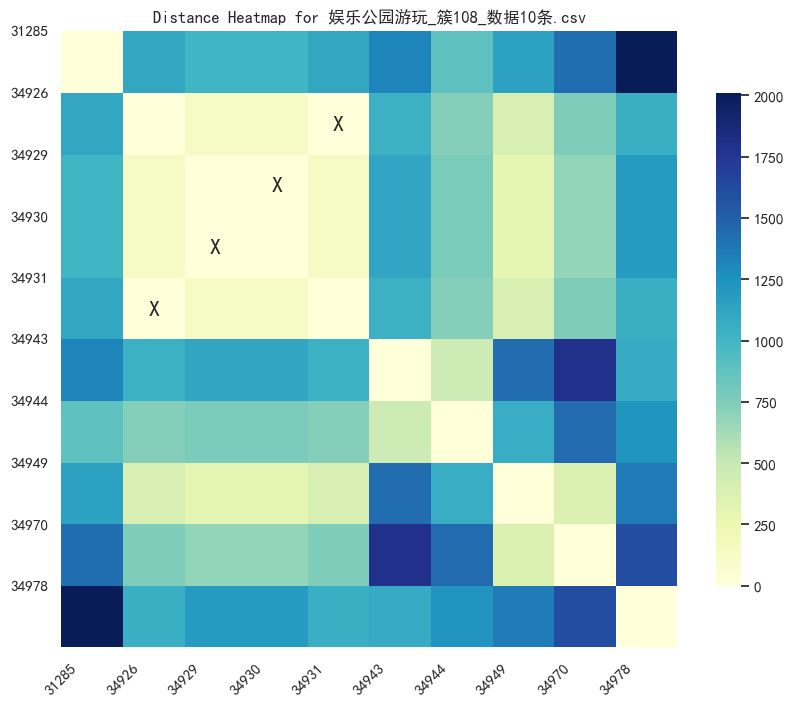

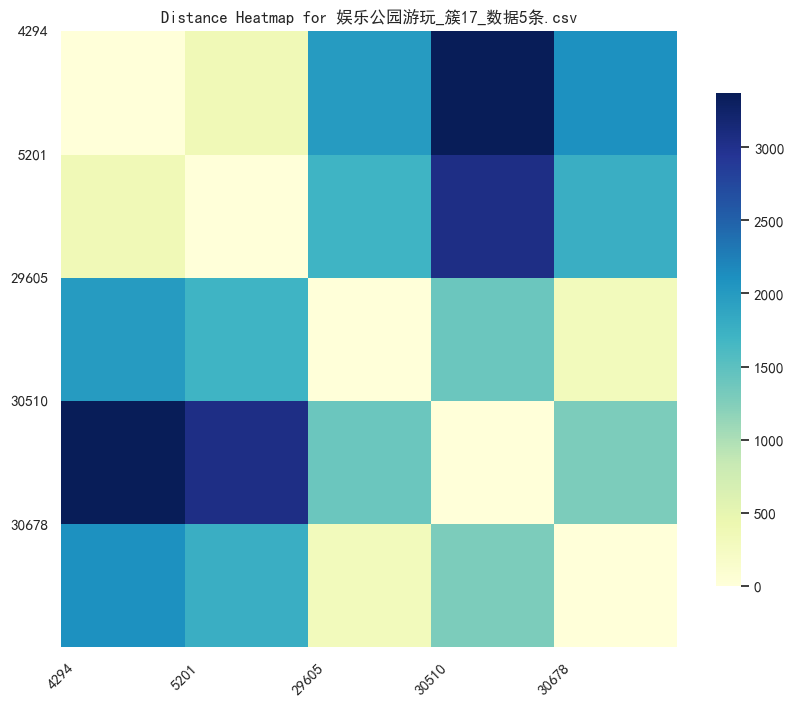

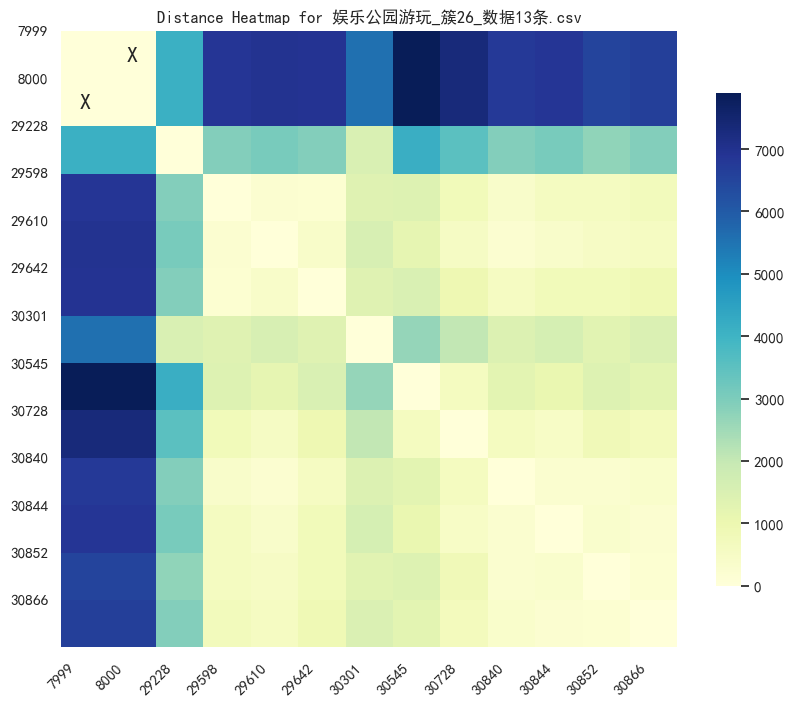

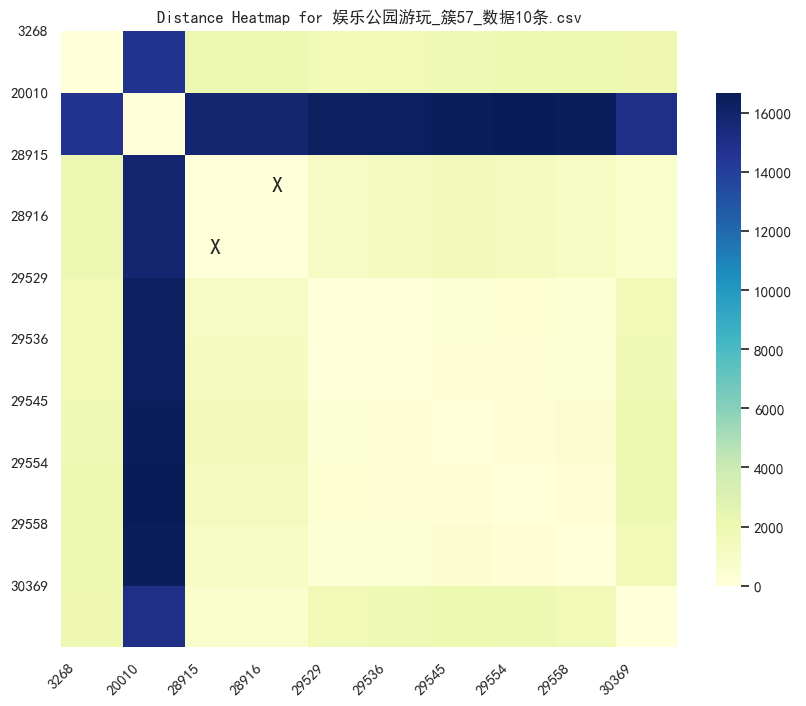

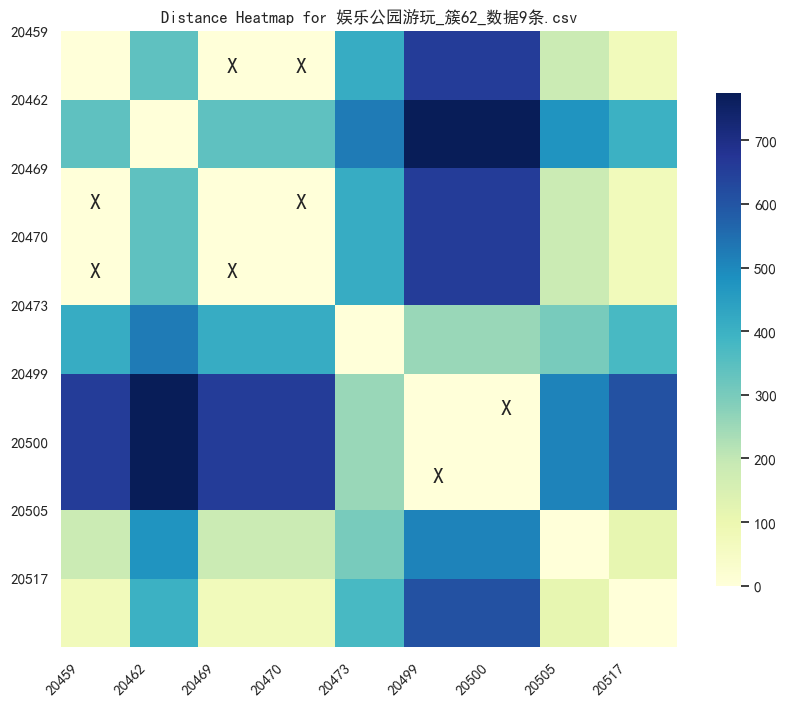

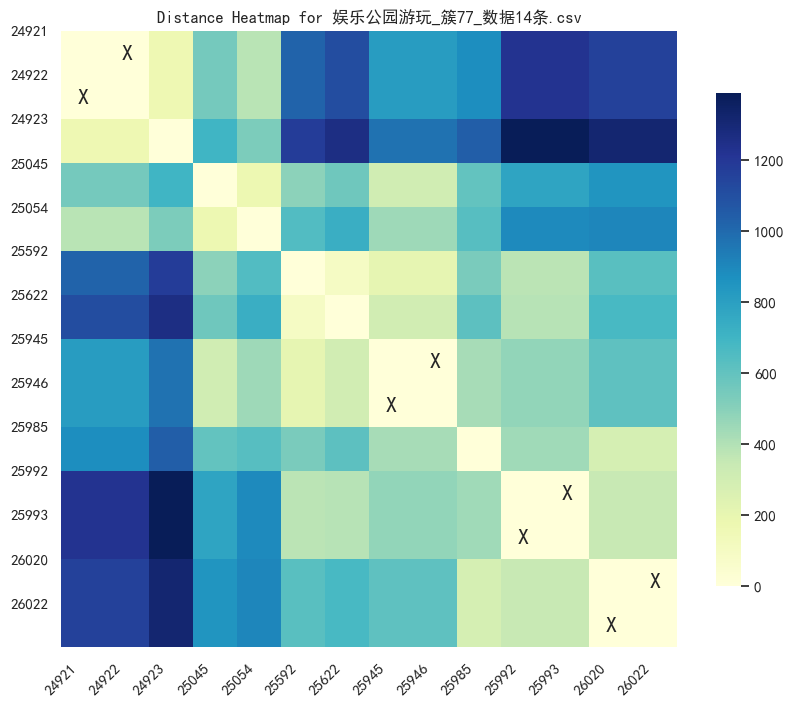

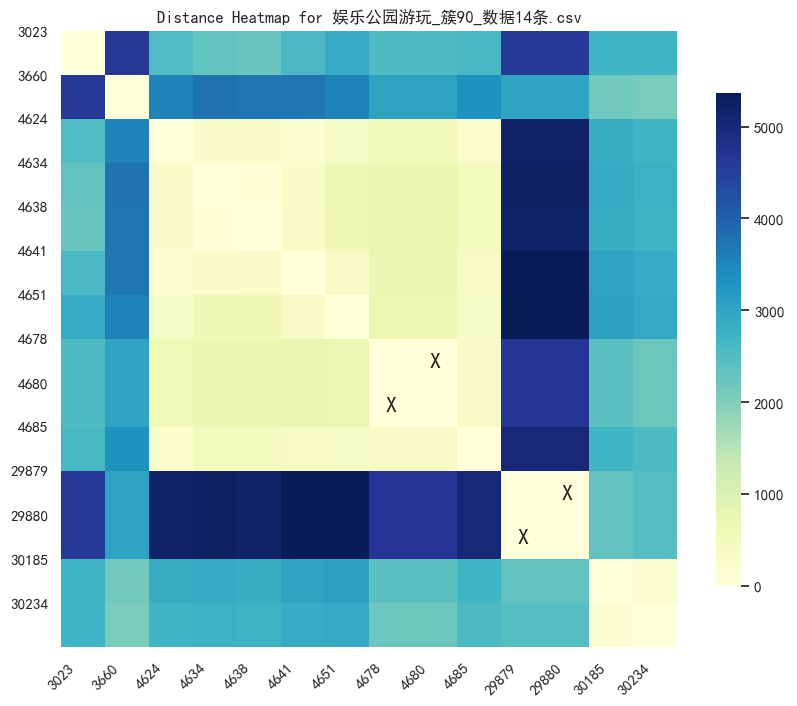

In [62]:
import os
import pandas as pd
from geopy.distance import geodesic
import matplotlib.pyplot as plt
import seaborn as sns

def process_csv(filename):
    data = pd.read_csv(filename)
    homes = []
    member_ids = []

    for idx, row in data.iterrows():
        purposes = eval(row['出行目的'])
        coordinates = parse_location(row['新轨迹'])
        member_id = row['成员编号']
        
        # 获取第一个点的用地类型
        first_point_land_use = eval(row['用地类型'])[0]
        
        # 如果第一个点的用地类型是居住，将其视为家的点
        if first_point_land_use == '居住':
            homes.append(coordinates[0])
            member_ids.append(member_id)

    num_homes = len(homes)
    distance_matrix = [[0] * num_homes for _ in range(num_homes)]

    for i in range(num_homes):
        for j in range(i+1, num_homes):
            distance = geodesic((homes[i][1], homes[i][0]), (homes[j][1], homes[j][0])).meters
            distance_matrix[i][j] = distance
            distance_matrix[j][i] = distance

    # 设置绘图风格
    sns.set(style="white")
    plt.figure(figsize=(10, 8))

    # 创建一个带有注释和特殊标识的热图
    sns.heatmap(distance_matrix, cmap="YlGnBu", square=True, annot=False, cbar_kws={"shrink": 0.8})

    # 添加特殊标识
    for i in range(num_homes):
        for j in range(num_homes):
            if i != j and distance_matrix[i][j] == 0:
                plt.text(j + 0.5, i + 0.5, 'X', fontsize=16, ha='center', va='center')

    # 标记成员编号
    plt.xticks(range(num_homes), member_ids, rotation=45)
    plt.yticks(range(num_homes), member_ids, rotation=0)
    # 设置matplotlib字体为支持中文的字体
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用SimHei字体
    plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
    plt.title(f"Distance Heatmap for {os.path.basename(filename)}")
    plt.show()

directory = "D:\\house_mix_EM\\测试"
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        full_path = os.path.join(directory, filename)
        process_csv(full_path)


# 轨迹线绘图二维。

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import ast  # 用于将字符串解析成列表
import numpy as np  # 用于更好的颜色分配

# 读取CSV文件
df = pd.read_csv("D:\house_mix_EM\出行目的_簇\娱乐公园游玩_簇747_数据8条.csv")

# 准备成员颜色映射
num_unique_members = df['成员编号'].nunique()
member_colors = plt.cm.rainbow(np.linspace(0, 1, num_unique_members))
member_color_map = {member: color for member, color in zip(df['成员编号'].unique(), member_colors)}

# 准备出行目的形状映射
purposes = set()
df['出行目的'].apply(lambda x: purposes.update(ast.literal_eval(x)))
# 假设第一个点没有出行目的，我们添加一个"无"选项
purposes.add("无")
purpose_shape_map = {purpose: shape for purpose, shape in zip(purposes, ['o', 's', '^', '>', '<', 'v', 'd', 'p', 'h', 'x', '.'])}
# 'o' - 圆圈
# 's' - 正方形
# '^' - 向上的三角形
# '>' - 向右的三角形
# '<' - 向左的三角形
# 'v' - 向下的三角形
# 'd' - 菱形
# 'p' - 五角星
# 'h' - 六边形
# 'x' - 叉号
# '.' - 点（像素）
# 初始化图和轴
fig, ax = plt.subplots()

# 遍历每个成员的数据
for member, group in df.groupby('成员编号'):
    member_color = member_color_map[member]
    for index, row in group.iterrows():
        trajectory = parse_location(row['轨迹'])  # 使用自定义的解析函数
        purposes = ['无'] + ast.literal_eval(row['出行目的']) # 假设第一个点没有出行目的，添加"无"
        times = [('无', '无')] + ast.literal_eval(row['出行时间']) # 第一个点没有时间，使用"无"标记

        for i, (point, time) in enumerate(zip(trajectory, times)):
            # 绘制出行目的点
            purpose = purposes[i] 
            shape = purpose_shape_map.get(purpose, 'o')  # 默认形状
            ax.plot(point[0], point[1], shape, markersize=12, color=member_color, label=purpose if index == 0 and i > 0 else "")

            # 添加时间标签，除非是第一个点
            start_time, end_time = time
            if start_time != '无':
                ax.text(point[0], point[1], f' {start_time}', ha='right', va='center', fontsize=10)
            if end_time != '无':
                ax.text(point[0], point[1], f'{end_time} ', ha='left', va='center', fontsize=10)

            # 绘制轨迹线
            if i > 0:
                prev_point = trajectory[i - 1]
                ax.add_line(Line2D([prev_point[0], point[0]], [prev_point[1], point[1]], linewidth=1, color=member_color))

# 处理图例
# 出行目的图例
purpose_legend_elements = [Line2D([0], [0], marker=shape, color='w', label=purpose,
                                  markerfacecolor='black', markersize=12)
                           for purpose, shape in purpose_shape_map.items() if purpose != "无"]
# 成员图例
member_legend_elements = [Line2D([0], [0], color=color, lw=4, label=f'成员 {member}')
                          for member, color in member_color_map.items()]

# 添加图例
ax.legend(handles=purpose_legend_elements + member_legend_elements, loc='upper right', fontsize='small')

# 设置标题和标签
ax.set_title('老年人出行轨迹图示')
ax.set_xlabel('经度')
ax.set_ylabel('纬度')

# 显示图形
plt.show()

In [143]:
import pandas as pd
import folium
import numpy as np
import matplotlib.pyplot as plt  # 这里应该导入pyplot
import matplotlib
import re

# 定义解析函数
def parse_location(loc_str):
    loc_str = re.sub(r'array\((.*?)\)', r'\1', loc_str)
    try:
        return eval(loc_str, {"__builtins__": {}})  # 更安全的eval
    except:
        return None

# 读取CSV文件
df = pd.read_csv("D:\house_mix_EM\出行目的_簇_POI\购物逛街_簇62_POI泰安市场_距离0.0_数据14条.csv")

# 准备成员颜色映射
num_unique_members = df['成员编号'].nunique()
member_colors = plt.cm.rainbow(np.linspace(0, 1, num_unique_members))
member_color_map = {member: matplotlib.colors.to_hex(color) for member, color in zip(df['成员编号'].unique(), member_colors)}

# 创建初始地图对象
# 使用自定义函数解析轨迹的第一个点
first_point = parse_location(df.iloc[0]['轨迹'])[0]

# 创建地图
m = folium.Map(location=[first_point[1], first_point[0]], zoom_start=12)

# 遍历每个成员的数据
for member, group in df.groupby('成员编号'):
    member_color = member_color_map[member]
    for index, row in group.iterrows():
        # 使用自定义函数解析轨迹
        trajectory = parse_location(row['轨迹'])
        if trajectory is None:
            continue  # 如果解析错误，跳过这条数据
        
        purposes = ['无'] + ast.literal_eval(row['出行目的'])  # 假设第一个点没有出行目的，添加"无"
        times = [('无', '无')] + ast.literal_eval(row['出行时间'])  # 第一个点没有时间，使用"无"标记

        # 绘制轨迹线
        folium.PolyLine(trajectory, color=member_color, weight=2.5, opacity=1).add_to(m)

        # 绘制出行目的点
        for i, (point, time) in enumerate(zip(trajectory, times)):
            start_time, end_time = time
            popup_text = f"成员: {member}<br>出行目的: {purposes[i]}<br>开始时间: {start_time}<br>结束时间: {end_time}"
            folium.Marker(
                [point[1], point[0]],  # 注意 folium 使用纬度在前，经度在后的顺序
                popup=folium.Popup(popup_text, max_width=300),
                icon=folium.Icon(color='blue', icon_color=member_color)
            ).add_to(m)

# 保存地图为HTML文件
m.save('map.html')

# 如果在 Jupyter 笔记本中，使用以下命令显示地图
m


In [141]:
import os
import pandas as pd
import re

# 定义函数来解析位置字符串
def parse_location(loc_str):
    loc_str = re.sub(r'array\((.*?)\)', r'\1', loc_str)
    try:
        return eval(loc_str, {"__builtins__": {}})  # 更安全的eval
    except:
        return None

# 设定目录路径
directory = "D:\\house_mix_EM\\出行目的_簇_POI"

# 准备一个DataFrame来收集所有的结果
result_df = pd.DataFrame(columns=['文件名', '出行目的', '文件簇编号', '新轨迹', 'POI名称', 'POI距离'])

# 遍历目录下的所有文件
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        # 打印文件名以进行调试
        print("处理文件：", filename)

        # 构造完整的文件路径
        filepath = os.path.join(directory, filename)
        
        # 从文件名中提取出行目的、簇编号、POI名称和距离
        match = re.match(r"(.+)_簇(\d+)_POI(.+)_距离(.+)_数据\d+条\.csv", filename)
        if match:
            purpose, file_cluster_id, poi_name, poi_distance = match.groups()
            file_cluster_id = int(file_cluster_id)
            print(f"文件 {filename} 对应出行目的：{purpose}，文件簇编号：{file_cluster_id}，POI名称：{poi_name}，POI距离：{poi_distance}")

            # 尝试读取 CSV 文件
            try:
                df = pd.read_csv(filepath)
                print(f"读取文件 {filename} 成功，列名：{df.columns.tolist()}")
                
                # 应用 parse_location 函数来处理新轨迹列中的数据
                df['新轨迹'] = df['新轨迹'].apply(parse_location)
                # 处理簇编号列，将其从字符串转换为列表
                df['簇编号'] = df['簇编号'].apply(eval)
                
                # 定义提取函数
                def extract_points(cluster_ids, trajectory, file_cluster_id):
                    if trajectory is None:
                        return []
                    return [point for idx, point in enumerate(trajectory) if cluster_ids[idx] == file_cluster_id]

                # 对每行应用函数提取点
                df['新轨迹'] = df.apply(lambda row: extract_points(row['簇编号'], row['新轨迹'], file_cluster_id), axis=1)
                df['新轨迹'] = df['新轨迹'].apply(lambda x: [list(t) for t in set(tuple(i) for i in x)])

                # 过滤出新轨迹列非空的行
                df = df[df['新轨迹'].map(len) > 0]
                
                # 添加必要的列
                df['文件名'] = filename
                df['出行目的'] = purpose
                df['文件簇编号'] = file_cluster_id
                df['POI名称'] = poi_name
                df['POI距离'] = poi_distance
                
                # 将更新后的df添加到结果DataFrame
                result_df = pd.concat([result_df, df[['文件名', '出行目的', '文件簇编号', '新轨迹', 'POI名称', 'POI距离']]], ignore_index=True)
                
            except Exception as e:
                print(f"读取文件 {filename} 时出错: {e}")
                continue
        else:
            print(f"文件名 {filename} 不匹配预期的格式。")
        

# 检查是否有数据并保存结果
if not result_df.empty:
    # 将结果DataFrame存入一个新的CSV文件
    result_df.to_csv("D:\\house_mix_EM\\总结果.csv", index=False)
    print("数据已经被成功保存到 '总结果.csv'。")
else:
    print("没有数据被添加到结果DataFrame中。")


处理文件： 其它_簇19_POI南村市场(见龙南街)_距离65.0_数据5条.csv
文件 其它_簇19_POI南村市场(见龙南街)_距离65.0_数据5条.csv 对应出行目的：其它，文件簇编号：19，POI名称：南村市场(见龙南街)，POI距离：65.0
读取文件 其它_簇19_POI南村市场(见龙南街)_距离65.0_数据5条.csv 成功，列名：['成员编号', '轨迹', '用地类型', '出行目的', '出行时间', '年龄', '性别', '新轨迹', '是否更改', '簇编号', '停留时间', '编码轨迹', '新附近POI', '新POI地址', '新POI距离']
处理文件： 其它_簇238_POI六沙市场_距离99.0_数据5条.csv
文件 其它_簇238_POI六沙市场_距离99.0_数据5条.csv 对应出行目的：其它，文件簇编号：238，POI名称：六沙市场，POI距离：99.0
读取文件 其它_簇238_POI六沙市场_距离99.0_数据5条.csv 成功，列名：['成员编号', '轨迹', '用地类型', '出行目的', '出行时间', '年龄', '性别', '新轨迹', '是否更改', '簇编号', '停留时间', '编码轨迹', '新附近POI', '新POI地址', '新POI距离']
处理文件： 其它_簇573_POI厚兴市场_距离0.0_数据11条.csv
文件 其它_簇573_POI厚兴市场_距离0.0_数据11条.csv 对应出行目的：其它，文件簇编号：573，POI名称：厚兴市场，POI距离：0.0
读取文件 其它_簇573_POI厚兴市场_距离0.0_数据11条.csv 成功，列名：['成员编号', '轨迹', '用地类型', '出行目的', '出行时间', '年龄', '性别', '新轨迹', '是否更改', '簇编号', '停留时间', '编码轨迹', '新附近POI', '新POI地址', '新POI距离']
处理文件： 其它_簇694_POI恒兴大厦(彩虹大道)_距离27.0_数据7条.csv
文件 其它_簇694_POI恒兴大厦(彩虹大道)_距离27.0_数据7条.csv 对应出行目的：其它，文件簇编号：694，POI名称：恒兴大厦(彩虹大道)，POI距离：27.0
读取文件 其它_簇694_POI恒

读取文件 娱乐公园游玩_簇100_POI中山市老干部大学_距离0.0_数据5条.csv 成功，列名：['成员编号', '轨迹', '用地类型', '出行目的', '出行时间', '年龄', '性别', '新轨迹', '是否更改', '簇编号', '停留时间', '编码轨迹', '新附近POI', '新POI地址', '新POI距离']
处理文件： 娱乐公园游玩_簇101_POI兴中体育场_距离0.0_数据8条.csv
文件 娱乐公园游玩_簇101_POI兴中体育场_距离0.0_数据8条.csv 对应出行目的：娱乐公园游玩，文件簇编号：101，POI名称：兴中体育场，POI距离：0.0
读取文件 娱乐公园游玩_簇101_POI兴中体育场_距离0.0_数据8条.csv 成功，列名：['成员编号', '轨迹', '用地类型', '出行目的', '出行时间', '年龄', '性别', '新轨迹', '是否更改', '簇编号', '停留时间', '编码轨迹', '新附近POI', '新POI地址', '新POI距离']
处理文件： 娱乐公园游玩_簇181_POI中山漫画馆_距离0.0_数据13条.csv
文件 娱乐公园游玩_簇181_POI中山漫画馆_距离0.0_数据13条.csv 对应出行目的：娱乐公园游玩，文件簇编号：181，POI名称：中山漫画馆，POI距离：0.0
读取文件 娱乐公园游玩_簇181_POI中山漫画馆_距离0.0_数据13条.csv 成功，列名：['成员编号', '轨迹', '用地类型', '出行目的', '出行时间', '年龄', '性别', '新轨迹', '是否更改', '簇编号', '停留时间', '编码轨迹', '新附近POI', '新POI地址', '新POI距离']
处理文件： 娱乐公园游玩_簇207_POI希亚途花园酒店(中山古镇国际灯饰批发中心店)_距离23.0_数据6条.csv
文件 娱乐公园游玩_簇207_POI希亚途花园酒店(中山古镇国际灯饰批发中心店)_距离23.0_数据6条.csv 对应出行目的：娱乐公园游玩，文件簇编号：207，POI名称：希亚途花园酒店(中山古镇国际灯饰批发中心店)，POI距离：23.0
读取文件 娱乐公园游玩_簇207_POI希亚途花园酒店(中山古镇国际灯饰批发中心店)_距离23.0_数据6条.csv 成功

读取文件 购物逛街_簇268_POI黄圃中心市场_距离0.0_数据6条.csv 成功，列名：['成员编号', '轨迹', '用地类型', '出行目的', '出行时间', '年龄', '性别', '新轨迹', '是否更改', '簇编号', '停留时间', '编码轨迹', '新附近POI', '新POI地址', '新POI距离']
处理文件： 购物逛街_簇282_POI张家边建华楼_距离41.0_数据5条.csv
文件 购物逛街_簇282_POI张家边建华楼_距离41.0_数据5条.csv 对应出行目的：购物逛街，文件簇编号：282，POI名称：张家边建华楼，POI距离：41.0
读取文件 购物逛街_簇282_POI张家边建华楼_距离41.0_数据5条.csv 成功，列名：['成员编号', '轨迹', '用地类型', '出行目的', '出行时间', '年龄', '性别', '新轨迹', '是否更改', '簇编号', '停留时间', '编码轨迹', '新附近POI', '新POI地址', '新POI距离']
处理文件： 购物逛街_簇285_POI小隐市场_距离33.0_数据5条.csv
文件 购物逛街_簇285_POI小隐市场_距离33.0_数据5条.csv 对应出行目的：购物逛街，文件簇编号：285，POI名称：小隐市场，POI距离：33.0
读取文件 购物逛街_簇285_POI小隐市场_距离33.0_数据5条.csv 成功，列名：['成员编号', '轨迹', '用地类型', '出行目的', '出行时间', '年龄', '性别', '新轨迹', '是否更改', '簇编号', '停留时间', '编码轨迹', '新附近POI', '新POI地址', '新POI距离']
处理文件： 购物逛街_簇286_POI张家边康祥路28号-1号楼_距离0.0_数据8条.csv
文件 购物逛街_簇286_POI张家边康祥路28号-1号楼_距离0.0_数据8条.csv 对应出行目的：购物逛街，文件簇编号：286，POI名称：张家边康祥路28号-1号楼，POI距离：0.0
读取文件 购物逛街_簇286_POI张家边康祥路28号-1号楼_距离0.0_数据8条.csv 成功，列名：['成员编号', '轨迹', '用地类型', '出行目的', '出行时间', '年龄', '性别', '新轨迹', '

处理文件： 购物逛街_簇750_POI文田市场_距离0.0_数据23条.csv
文件 购物逛街_簇750_POI文田市场_距离0.0_数据23条.csv 对应出行目的：购物逛街，文件簇编号：750，POI名称：文田市场，POI距离：0.0
读取文件 购物逛街_簇750_POI文田市场_距离0.0_数据23条.csv 成功，列名：['成员编号', '轨迹', '用地类型', '出行目的', '出行时间', '年龄', '性别', '新轨迹', '是否更改', '簇编号', '停留时间', '编码轨迹', '新附近POI', '新POI地址', '新POI距离']
处理文件： 购物逛街_簇759_POI文田市场_距离0.0_数据10条.csv
文件 购物逛街_簇759_POI文田市场_距离0.0_数据10条.csv 对应出行目的：购物逛街，文件簇编号：759，POI名称：文田市场，POI距离：0.0
读取文件 购物逛街_簇759_POI文田市场_距离0.0_数据10条.csv 成功，列名：['成员编号', '轨迹', '用地类型', '出行目的', '出行时间', '年龄', '性别', '新轨迹', '是否更改', '簇编号', '停留时间', '编码轨迹', '新附近POI', '新POI地址', '新POI距离']
处理文件： 购物逛街_簇75_POI沙岗墟综合市场_距离0.0_数据5条.csv
文件 购物逛街_簇75_POI沙岗墟综合市场_距离0.0_数据5条.csv 对应出行目的：购物逛街，文件簇编号：75，POI名称：沙岗墟综合市场，POI距离：0.0
读取文件 购物逛街_簇75_POI沙岗墟综合市场_距离0.0_数据5条.csv 成功，列名：['成员编号', '轨迹', '用地类型', '出行目的', '出行时间', '年龄', '性别', '新轨迹', '是否更改', '簇编号', '停留时间', '编码轨迹', '新附近POI', '新POI地址', '新POI距离']
处理文件： 购物逛街_簇794_POI东庙市场_距离0.0_数据7条.csv
文件 购物逛街_簇794_POI东庙市场_距离0.0_数据7条.csv 对应出行目的：购物逛街，文件簇编号：794，POI名称：东庙市场，POI距离：0.0
读取文件 购物逛街_簇794_POI东庙市场_距离

In [142]:
import pandas as pd

# 读取CSV文件到DataFrame
df = pd.read_csv("D:\\house_mix_EM\\总结果.csv")

# 去除重复行
df = df.drop_duplicates()

# 解析新轨迹列并分割成经纬度两列
# 假设新轨迹的格式为"[[经度, 纬度]]"
def parse_trajectory(trajectory_str):
    # 评估字符串形式的列表
    trajectory = eval(trajectory_str)
    # 返回第一个点的经纬度
    return trajectory[0][0], trajectory[0][1]

# 应用解析函数
df[['经度', '纬度']] = df.apply(lambda row: parse_trajectory(row['新轨迹']), axis=1, result_type='expand')

# 保存去重并添加了经度纬度列的DataFrame到CSV文件
df.to_csv("D:\\house_mix_EM\\总结果去重并分列后.csv", index=False)
